In [1]:
import os
import pandas as pd
import numpy as np

from math import ceil 
from skimage import io
from skimage import filters, color
from scipy import ndimage as ndi
from PIL import Image
import cv2
import matplotlib
matplotlib.rcParams.update({'figure.max_open_warning': 0})
import matplotlib.pyplot as plt
import my_app.processing as proc
from processing import process_image

import tensorflow.keras as keras
# from tensorflow.keras import layers
# keras = tf.keras
# AUTOTUNE = tf.data.experimental.AUTOTUNE ## tf.data transformation parameters
# import matplotlib.pyplot as plt

In [12]:
!ls saved_models
models = os.popen("ls saved_models").read().split('\n')[:-1]
tf_model = keras.models.load_model('saved_models/'+models[-1])
MODEL_NAME = models[-1][:-3]
MODEL_NAME

baseline_DecisionTreeClassifier_201911101573380701.h5
baseline_DecisionTreeClassifier_201911101573380991.p
baseline_SVM_201911101573383260.p
mnist_5epochs_20191028.h5
mnist_hasyv2_20epochs_201910291572394063.h5
mnist_hasyv2_master_20epochs_201911081573208118.h5
mnist_hasyv2_master_20epochs_batch64_201911081573209782.h5
mnist_hasyv2_master_20epochs_batch64__ALLDATA_201911081573211546.h5


'mnist_hasyv2_master_20epochs_batch64__ALLDATA_201911081573211546'

In [ ]:
!ls saved_models

In [5]:
import pickle
models = os.popen("ls saved_models").read().split('\n')[:-1]
decisiontreeclf = pickle.load(open('saved_models/baseline_DecisionTreeClassifier_201911101573380701.h5', 'rb'))
MODEL_NAME = 'baseline_DecisionTreeClassifier'
MODEL_NAME

'baseline_DecisionTreeClassifier'

In [2]:
folder = 'finaltests/uncat/'
imgs = os.popen("ls "+folder).read().split('\n')[:-1]
for i,img in enumerate(imgs):
    imgs[i]=folder+img
imgs[:10]

['finaltests/uncat/unseen_setmnist_hasyv2_master_20epochs_batch64__ALLDATA_2019110815732115460____0___predicted____0.jpg',
 'finaltests/uncat/unseen_setmnist_hasyv2_master_20epochs_batch64__ALLDATA_2019110815732115460____1___predicted____1.jpg',
 'finaltests/uncat/unseen_setmnist_hasyv2_master_20epochs_batch64__ALLDATA_2019110815732115460____2___predicted____2.jpg',
 'finaltests/uncat/unseen_setmnist_hasyv2_master_20epochs_batch64__ALLDATA_2019110815732115460____3___predicted____3.jpg',
 'finaltests/uncat/unseen_setmnist_hasyv2_master_20epochs_batch64__ALLDATA_2019110815732115460____4___predicted____4.jpg',
 'finaltests/uncat/unseen_setmnist_hasyv2_master_20epochs_batch64__ALLDATA_2019110815732115460____5___predicted____5.jpg',
 'finaltests/uncat/unseen_setmnist_hasyv2_master_20epochs_batch64__ALLDATA_2019110815732115460____6___predicted____6.jpg',
 'finaltests/uncat/unseen_setmnist_hasyv2_master_20epochs_batch64__ALLDATA_2019110815732115460____7___predicted____7.jpg',
 'finaltests/unc

In [11]:
correct = []
for img in imgs:
    actual = img.split('____')[1][0]
    predict = img.split('____')[2][0]
    if actual==predict:
        correct.append(img)
        


In [8]:
len(correct)

5458

In [14]:
imgs = os.popen("ls testmarker").read().split('\n')[:-1]
for i,img in enumerate(imgs):
    imgs[i]='testmarker/'+img
imgs

['testmarker/068479.jpg',
 'testmarker/10645.jpg',
 'testmarker/10897649.jpg',
 'testmarker/16786.jpg',
 'testmarker/17662814.jpg',
 'testmarker/2185.jpg',
 'testmarker/22069.jpg',
 'testmarker/22765.jpg',
 'testmarker/236951.jpg',
 'testmarker/26635409.jpg',
 'testmarker/279134.jpg',
 'testmarker/32128957.jpg',
 'testmarker/39385210.jpg',
 'testmarker/46320745.jpg',
 'testmarker/50473.jpg',
 'testmarker/648502.jpg',
 'testmarker/657213.jpg',
 'testmarker/66682.jpg',
 'testmarker/731984.jpg',
 'testmarker/74036776.jpg',
 'testmarker/74430.jpg',
 'testmarker/7493.jpg',
 'testmarker/81064327.jpg',
 'testmarker/84843617.jpg',
 'testmarker/97765113.jpg']

In [13]:
from my_app.predict import predict_tf

processing  testmarker/068479.jpg


FileNotFoundError: The directory '/home/nina/autograder/data' does not exist

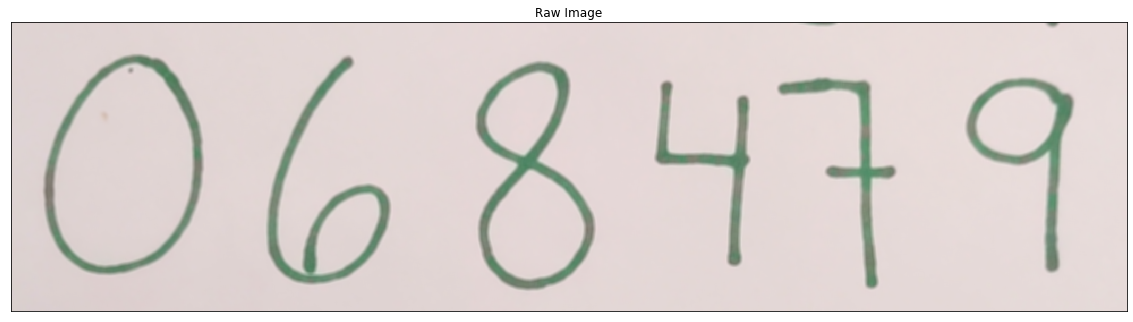

In [15]:
predictions = []
for img in imgs:
    predict_tf(tf_model,img)

In [6]:
folder = 'Ken_uncat/'
imgs = os.popen("ls "+folder).read().split('\n')[:-1]
for i,img in enumerate(imgs):
    imgs[i]=folder+img
imgs[:10]

['Ken_uncat/0____0.png',
 'Ken_uncat/0____1.png',
 'Ken_uncat/0____2.png',
 'Ken_uncat/0____3.png',
 'Ken_uncat/0____4.png',
 'Ken_uncat/0____5.png',
 'Ken_uncat/0____6.png',
 'Ken_uncat/0____7.png',
 'Ken_uncat/0____8.png',
 'Ken_uncat/0____9.png']

In [31]:
os.close(folder+'*')

TypeError: an integer is required (got type str)

In [7]:
labels = []
for filename in imgs:
    for digit in filename.split('/')[1][-5:-4]:
        labels.append(int(digit))
labels[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [10]:
df = pd.DataFrame(imgs)
df.columns = ['filename']
df['label'] = labels
df_subset = df.copy()    #.iloc[:1000]
df_subset.head()

,filename,label
0,Ken_uncat/0____0.png,0
1,Ken_uncat/0____1.png,1
2,Ken_uncat/0____2.png,2
3,Ken_uncat/0____3.png,3
4,Ken_uncat/0____4.png,4


In [43]:
# binary_arr,label_arr, segments,orig = proc.label_segments(df_subset['filename'].iloc[0],'',photo=True,marker=False)

In [18]:
predictions = []
newimg = []
with open(MODEL_NAME+'__unseenset.txt','w') as writeFile:
    for index,image in enumerate(df_subset['filename']):
        matname = 'finaltests/uncat/unseen_set'+MODEL_NAME+image.split('/')[1][:-4]
        print(index+1,'of',len(df_subset))
        print('processing',image)
        try:
            binary_arr,label_arr, segments,orig = proc.label_segments(image,matname,photo=False,marker=True)
            found = label_arr==1
            i=2
            a=[]
            maxx = np.sum(found.flatten())
            if len(segments)>1:
                while i<=len(segments):
                    if np.sum((label_arr==i).flatten())/i>maxx:
                        maxx = np.sum((label_arr==i).flatten())/i
                        found = label_arr==i
                    i+=1
            x,y = np.where(found)
            xmin,xmax,ymin,ymax = np.min(x),np.max(x),np.min(y),np.max(y)
            xlen,ylen = found[xmin:xmax,ymin:ymax].shape

            diff = np.abs(ylen-xlen)
            change = ceil(diff/2)
            if diff!=0:
                if ylen>xlen:
                    xmin-=change
                    xmax+=change

                else:
                    ymin-=change
                    ymax+=change

                xlen,ylen = xmax-xmin,ymax-ymin
                diff=np.abs(ylen-xlen)
                if xlen>ylen: ymax+=diff
                elif ylen>xlen: xmax+=diff
            digit = 1-binary_arr[xmin:xmax,ymin:ymax]
            digit = np.pad(digit,int(len(digit)*.2),mode= 'constant', constant_values=(0,0))   
            im = Image.fromarray(np.array(digit)*255.0).convert("RGB")
            im.save('000.jpg')
            img = cv2.resize(cv2.imread('000.jpg',cv2.IMREAD_GRAYSCALE),(28,28),interpolation=cv2.INTER_CUBIC)
            !rm 000.jpg
            p = np.argmax(tf_model.predict(img.astype(float).flatten().reshape((1, 28, 28, 1))))
            temp = matname+'___predicted____'+str(p)+'.jpg'
            im.save(temp)
            newimg.append(temp)
            predictions.append(p)
            plt.close('all')
        except:
            p=np.nan
            predictions.append(p)
        row = str(df_subset.iloc[index]['label'])+'; '+str(p)+'\n'
#         print(row)
        writeFile.write(row)
writeFile.close()


1 of 34000
processing Ken_uncat/0____0.png
2 of 34000
processing Ken_uncat/0____1.png
3 of 34000
processing Ken_uncat/0____2.png
4 of 34000
processing Ken_uncat/0____3.png
5 of 34000
processing Ken_uncat/0____4.png
6 of 34000
processing Ken_uncat/0____5.png
7 of 34000
processing Ken_uncat/0____6.png
8 of 34000
processing Ken_uncat/0____7.png
9 of 34000
processing Ken_uncat/0____8.png
10 of 34000
processing Ken_uncat/0____9.png
11 of 34000
processing Ken_uncat/1000____0.png
12 of 34000
processing Ken_uncat/1000____1.png
13 of 34000
processing Ken_uncat/1000____2.png
14 of 34000
processing Ken_uncat/1000____3.png
15 of 34000
processing Ken_uncat/1000____4.png
16 of 34000
processing Ken_uncat/1000____5.png
17 of 34000
processing Ken_uncat/1000____6.png
18 of 34000
processing Ken_uncat/1000____7.png
19 of 34000
processing Ken_uncat/1000____8.png
20 of 34000
processing Ken_uncat/1000____9.png
21 of 34000
processing Ken_uncat/100____0.png
22 of 34000
processing Ken_uncat/1001____0.png
23 of 

175 of 34000
processing Ken_uncat/1014____9.png
176 of 34000
processing Ken_uncat/101____4.png
177 of 34000
processing Ken_uncat/1015____0.png
178 of 34000
processing Ken_uncat/1015____1.png
179 of 34000
processing Ken_uncat/1015____2.png
180 of 34000
processing Ken_uncat/1015____3.png
181 of 34000
processing Ken_uncat/1015____4.png
182 of 34000
processing Ken_uncat/1015____5.png
183 of 34000
processing Ken_uncat/1015____6.png
184 of 34000
processing Ken_uncat/1015____7.png
185 of 34000
processing Ken_uncat/1015____8.png
186 of 34000
processing Ken_uncat/1015____9.png
187 of 34000
processing Ken_uncat/101____5.png
188 of 34000
processing Ken_uncat/1016____0.png
189 of 34000
processing Ken_uncat/1016____1.png
190 of 34000
processing Ken_uncat/1016____2.png
191 of 34000
processing Ken_uncat/1016____3.png
192 of 34000
processing Ken_uncat/1016____4.png
193 of 34000
processing Ken_uncat/1016____5.png
194 of 34000
processing Ken_uncat/1016____6.png
195 of 34000
processing Ken_uncat/1016____

347 of 34000
processing Ken_uncat/1030____3.png
348 of 34000
processing Ken_uncat/1030____4.png
349 of 34000
processing Ken_uncat/1030____5.png
350 of 34000
processing Ken_uncat/1030____6.png
351 of 34000
processing Ken_uncat/1030____7.png
352 of 34000
processing Ken_uncat/1030____8.png
353 of 34000
processing Ken_uncat/1030____9.png
354 of 34000
processing Ken_uncat/103____0.png
355 of 34000
processing Ken_uncat/1031____0.png
356 of 34000
processing Ken_uncat/1031____1.png
357 of 34000
processing Ken_uncat/1031____2.png
358 of 34000
processing Ken_uncat/1031____3.png
359 of 34000
processing Ken_uncat/1031____4.png
360 of 34000
processing Ken_uncat/1031____5.png
361 of 34000
processing Ken_uncat/1031____6.png
362 of 34000
processing Ken_uncat/1031____7.png
363 of 34000
processing Ken_uncat/1031____8.png
364 of 34000
processing Ken_uncat/1031____9.png
365 of 34000
processing Ken_uncat/103____1.png
366 of 34000
processing Ken_uncat/1032____0.png
367 of 34000
processing Ken_uncat/1032____

519 of 34000
processing Ken_uncat/1045____9.png
520 of 34000
processing Ken_uncat/104____5.png
521 of 34000
processing Ken_uncat/1046____0.png
522 of 34000
processing Ken_uncat/1046____1.png
523 of 34000
processing Ken_uncat/1046____2.png
524 of 34000
processing Ken_uncat/1046____3.png
525 of 34000
processing Ken_uncat/1046____4.png
526 of 34000
processing Ken_uncat/1046____5.png
527 of 34000
processing Ken_uncat/1046____6.png
528 of 34000
processing Ken_uncat/1046____7.png
529 of 34000
processing Ken_uncat/1046____8.png
530 of 34000
processing Ken_uncat/1046____9.png
531 of 34000
processing Ken_uncat/104____6.png
532 of 34000
processing Ken_uncat/1047____0.png
533 of 34000
processing Ken_uncat/1047____1.png
534 of 34000
processing Ken_uncat/1047____2.png
535 of 34000
processing Ken_uncat/1047____3.png
536 of 34000
processing Ken_uncat/1047____4.png
537 of 34000
processing Ken_uncat/1047____5.png
538 of 34000
processing Ken_uncat/1047____6.png
539 of 34000
processing Ken_uncat/1047____

691 of 34000
processing Ken_uncat/1061____3.png
692 of 34000
processing Ken_uncat/1061____4.png
693 of 34000
processing Ken_uncat/1061____5.png
694 of 34000
processing Ken_uncat/1061____6.png
695 of 34000
processing Ken_uncat/1061____7.png
696 of 34000
processing Ken_uncat/1061____8.png
697 of 34000
processing Ken_uncat/1061____9.png
698 of 34000
processing Ken_uncat/106____1.png
699 of 34000
processing Ken_uncat/1062____0.png
700 of 34000
processing Ken_uncat/1062____1.png
701 of 34000
processing Ken_uncat/1062____2.png
702 of 34000
processing Ken_uncat/1062____3.png
703 of 34000
processing Ken_uncat/1062____4.png
704 of 34000
processing Ken_uncat/1062____5.png
705 of 34000
processing Ken_uncat/1062____6.png
706 of 34000
processing Ken_uncat/1062____7.png
707 of 34000
processing Ken_uncat/1062____8.png
708 of 34000
processing Ken_uncat/1062____9.png
709 of 34000
processing Ken_uncat/106____2.png
710 of 34000
processing Ken_uncat/1063____0.png
711 of 34000
processing Ken_uncat/1063____

863 of 34000
processing Ken_uncat/1076____9.png
864 of 34000
processing Ken_uncat/107____6.png
865 of 34000
processing Ken_uncat/1077____0.png
866 of 34000
processing Ken_uncat/1077____1.png
867 of 34000
processing Ken_uncat/1077____2.png
868 of 34000
processing Ken_uncat/1077____3.png
869 of 34000
processing Ken_uncat/1077____4.png
870 of 34000
processing Ken_uncat/1077____5.png
871 of 34000
processing Ken_uncat/1077____6.png
872 of 34000
processing Ken_uncat/1077____7.png
873 of 34000
processing Ken_uncat/1077____8.png
874 of 34000
processing Ken_uncat/1077____9.png
875 of 34000
processing Ken_uncat/107____7.png
876 of 34000
processing Ken_uncat/1078____0.png
877 of 34000
processing Ken_uncat/1078____1.png
878 of 34000
processing Ken_uncat/1078____2.png
879 of 34000
processing Ken_uncat/1078____3.png
880 of 34000
processing Ken_uncat/1078____4.png
881 of 34000
processing Ken_uncat/1078____5.png
882 of 34000
processing Ken_uncat/1078____6.png
883 of 34000
processing Ken_uncat/1078____

1034 of 34000
processing Ken_uncat/1092____2.png
1035 of 34000
processing Ken_uncat/1092____3.png
1036 of 34000
processing Ken_uncat/1092____4.png
1037 of 34000
processing Ken_uncat/1092____5.png
1038 of 34000
processing Ken_uncat/1092____6.png
1039 of 34000
processing Ken_uncat/1092____7.png
1040 of 34000
processing Ken_uncat/1092____8.png
1041 of 34000
processing Ken_uncat/1092____9.png
1042 of 34000
processing Ken_uncat/109____2.png
1043 of 34000
processing Ken_uncat/1093____0.png
1044 of 34000
processing Ken_uncat/1093____1.png
1045 of 34000
processing Ken_uncat/1093____2.png
1046 of 34000
processing Ken_uncat/1093____3.png
1047 of 34000
processing Ken_uncat/1093____4.png
1048 of 34000
processing Ken_uncat/1093____5.png
1049 of 34000
processing Ken_uncat/1093____6.png
1050 of 34000
processing Ken_uncat/1093____7.png
1051 of 34000
processing Ken_uncat/1093____8.png
1052 of 34000
processing Ken_uncat/1093____9.png
1053 of 34000
processing Ken_uncat/109____3.png
1054 of 34000
processi

1202 of 34000
processing Ken_uncat/1107____3.png
1203 of 34000
processing Ken_uncat/1107____4.png
1204 of 34000
processing Ken_uncat/1107____5.png
1205 of 34000
processing Ken_uncat/1107____6.png
1206 of 34000
processing Ken_uncat/1107____7.png
1207 of 34000
processing Ken_uncat/1107____8.png
1208 of 34000
processing Ken_uncat/1107____9.png
1209 of 34000
processing Ken_uncat/110____7.png
1210 of 34000
processing Ken_uncat/1108____0.png
1211 of 34000
processing Ken_uncat/1108____1.png
1212 of 34000
processing Ken_uncat/1108____2.png
1213 of 34000
processing Ken_uncat/1108____3.png
1214 of 34000
processing Ken_uncat/1108____4.png
1215 of 34000
processing Ken_uncat/1108____5.png
1216 of 34000
processing Ken_uncat/1108____6.png
1217 of 34000
processing Ken_uncat/1108____7.png
1218 of 34000
processing Ken_uncat/1108____8.png
1219 of 34000
processing Ken_uncat/1108____9.png
1220 of 34000
processing Ken_uncat/110____8.png
1221 of 34000
processing Ken_uncat/1109____0.png
1222 of 34000
processi

1370 of 34000
processing Ken_uncat/1122____4.png
1371 of 34000
processing Ken_uncat/1122____5.png
1372 of 34000
processing Ken_uncat/1122____6.png
1373 of 34000
processing Ken_uncat/1122____7.png
1374 of 34000
processing Ken_uncat/1122____8.png
1375 of 34000
processing Ken_uncat/1122____9.png
1376 of 34000
processing Ken_uncat/112____2.png
1377 of 34000
processing Ken_uncat/1123____0.png
1378 of 34000
processing Ken_uncat/1123____1.png
1379 of 34000
processing Ken_uncat/1123____2.png
1380 of 34000
processing Ken_uncat/1123____3.png
1381 of 34000
processing Ken_uncat/1123____4.png
1382 of 34000
processing Ken_uncat/1123____5.png
1383 of 34000
processing Ken_uncat/1123____6.png
1384 of 34000
processing Ken_uncat/1123____7.png
1385 of 34000
processing Ken_uncat/1123____8.png
1386 of 34000
processing Ken_uncat/1123____9.png
1387 of 34000
processing Ken_uncat/112____3.png
1388 of 34000
processing Ken_uncat/1124____0.png
1389 of 34000
processing Ken_uncat/1124____1.png
1390 of 34000
processi

1538 of 34000
processing Ken_uncat/1137____6.png
1539 of 34000
processing Ken_uncat/1137____7.png
1540 of 34000
processing Ken_uncat/1137____8.png
1541 of 34000
processing Ken_uncat/1137____9.png
1542 of 34000
processing Ken_uncat/113____7.png
1543 of 34000
processing Ken_uncat/1138____0.png
1544 of 34000
processing Ken_uncat/1138____1.png
1545 of 34000
processing Ken_uncat/1138____2.png
1546 of 34000
processing Ken_uncat/1138____3.png
1547 of 34000
processing Ken_uncat/1138____4.png
1548 of 34000
processing Ken_uncat/1138____5.png
1549 of 34000
processing Ken_uncat/1138____6.png
1550 of 34000
processing Ken_uncat/1138____7.png
1551 of 34000
processing Ken_uncat/1138____8.png
1552 of 34000
processing Ken_uncat/1138____9.png
1553 of 34000
processing Ken_uncat/113____8.png
1554 of 34000
processing Ken_uncat/1139____0.png
1555 of 34000
processing Ken_uncat/1139____1.png
1556 of 34000
processing Ken_uncat/1139____2.png
1557 of 34000
processing Ken_uncat/1139____3.png
1558 of 34000
processi

1706 of 34000
processing Ken_uncat/1152____7.png
1707 of 34000
processing Ken_uncat/1152____8.png
1708 of 34000
processing Ken_uncat/1152____9.png
1709 of 34000
processing Ken_uncat/115____2.png
1710 of 34000
processing Ken_uncat/1153____0.png
1711 of 34000
processing Ken_uncat/1153____1.png
1712 of 34000
processing Ken_uncat/1153____2.png
1713 of 34000
processing Ken_uncat/1153____3.png
1714 of 34000
processing Ken_uncat/1153____4.png
1715 of 34000
processing Ken_uncat/1153____5.png
1716 of 34000
processing Ken_uncat/1153____6.png
1717 of 34000
processing Ken_uncat/1153____7.png
1718 of 34000
processing Ken_uncat/1153____8.png
1719 of 34000
processing Ken_uncat/1153____9.png
1720 of 34000
processing Ken_uncat/115____3.png
1721 of 34000
processing Ken_uncat/1154____0.png
1722 of 34000
processing Ken_uncat/1154____1.png
1723 of 34000
processing Ken_uncat/1154____2.png
1724 of 34000
processing Ken_uncat/1154____3.png
1725 of 34000
processing Ken_uncat/1154____4.png
1726 of 34000
processi

1874 of 34000
processing Ken_uncat/1167____9.png
1875 of 34000
processing Ken_uncat/116____7.png
1876 of 34000
processing Ken_uncat/1168____0.png
1877 of 34000
processing Ken_uncat/1168____1.png
1878 of 34000
processing Ken_uncat/1168____2.png
1879 of 34000
processing Ken_uncat/1168____3.png
1880 of 34000
processing Ken_uncat/1168____4.png
1881 of 34000
processing Ken_uncat/1168____5.png
1882 of 34000
processing Ken_uncat/1168____6.png
1883 of 34000
processing Ken_uncat/1168____7.png
1884 of 34000
processing Ken_uncat/1168____8.png
1885 of 34000
processing Ken_uncat/1168____9.png
1886 of 34000
processing Ken_uncat/116____8.png
1887 of 34000
processing Ken_uncat/1169____0.png
1888 of 34000
processing Ken_uncat/1169____1.png
1889 of 34000
processing Ken_uncat/1169____2.png
1890 of 34000
processing Ken_uncat/1169____3.png
1891 of 34000
processing Ken_uncat/1169____4.png
1892 of 34000
processing Ken_uncat/1169____5.png
1893 of 34000
processing Ken_uncat/1169____6.png
1894 of 34000
processi

2042 of 34000
processing Ken_uncat/118____2.png
2043 of 34000
processing Ken_uncat/1183____0.png
2044 of 34000
processing Ken_uncat/1183____1.png
2045 of 34000
processing Ken_uncat/1183____2.png
2046 of 34000
processing Ken_uncat/1183____3.png
2047 of 34000
processing Ken_uncat/1183____4.png
2048 of 34000
processing Ken_uncat/1183____5.png
2049 of 34000
processing Ken_uncat/1183____6.png
2050 of 34000
processing Ken_uncat/1183____7.png
2051 of 34000
processing Ken_uncat/1183____8.png
2052 of 34000
processing Ken_uncat/1183____9.png
2053 of 34000
processing Ken_uncat/118____3.png
2054 of 34000
processing Ken_uncat/1184____0.png
2055 of 34000
processing Ken_uncat/1184____1.png
2056 of 34000
processing Ken_uncat/1184____2.png
2057 of 34000
processing Ken_uncat/1184____3.png
2058 of 34000
processing Ken_uncat/1184____4.png
2059 of 34000
processing Ken_uncat/1184____5.png
2060 of 34000
processing Ken_uncat/1184____6.png
2061 of 34000
processing Ken_uncat/1184____7.png
2062 of 34000
processi

2210 of 34000
processing Ken_uncat/1198____1.png
2211 of 34000
processing Ken_uncat/1198____2.png
2212 of 34000
processing Ken_uncat/1198____3.png
2213 of 34000
processing Ken_uncat/1198____4.png
2214 of 34000
processing Ken_uncat/1198____5.png
2215 of 34000
processing Ken_uncat/1198____6.png
2216 of 34000
processing Ken_uncat/1198____7.png
2217 of 34000
processing Ken_uncat/1198____8.png
2218 of 34000
processing Ken_uncat/1198____9.png
2219 of 34000
processing Ken_uncat/119____8.png
2220 of 34000
processing Ken_uncat/1199____0.png
2221 of 34000
processing Ken_uncat/1199____1.png
2222 of 34000
processing Ken_uncat/1199____2.png
2223 of 34000
processing Ken_uncat/1199____3.png
2224 of 34000
processing Ken_uncat/1199____4.png
2225 of 34000
processing Ken_uncat/1199____5.png
2226 of 34000
processing Ken_uncat/1199____6.png
2227 of 34000
processing Ken_uncat/1199____7.png
2228 of 34000
processing Ken_uncat/1199____8.png
2229 of 34000
processing Ken_uncat/1199____9.png
2230 of 34000
process

2378 of 34000
processing Ken_uncat/1213____1.png
2379 of 34000
processing Ken_uncat/1213____2.png
2380 of 34000
processing Ken_uncat/1213____3.png
2381 of 34000
processing Ken_uncat/1213____4.png
2382 of 34000
processing Ken_uncat/1213____5.png
2383 of 34000
processing Ken_uncat/1213____6.png
2384 of 34000
processing Ken_uncat/1213____7.png
2385 of 34000
processing Ken_uncat/1213____8.png
2386 of 34000
processing Ken_uncat/1213____9.png
2387 of 34000
processing Ken_uncat/121____3.png
2388 of 34000
processing Ken_uncat/1214____0.png
2389 of 34000
processing Ken_uncat/1214____1.png
2390 of 34000
processing Ken_uncat/1214____2.png
2391 of 34000
processing Ken_uncat/1214____3.png
2392 of 34000
processing Ken_uncat/1214____4.png
2393 of 34000
processing Ken_uncat/1214____5.png
2394 of 34000
processing Ken_uncat/1214____6.png
2395 of 34000
processing Ken_uncat/1214____7.png
2396 of 34000
processing Ken_uncat/1214____8.png
2397 of 34000
processing Ken_uncat/1214____9.png
2398 of 34000
process

2546 of 34000
processing Ken_uncat/1228____3.png
2547 of 34000
processing Ken_uncat/1228____4.png
2548 of 34000
processing Ken_uncat/1228____5.png
2549 of 34000
processing Ken_uncat/1228____6.png
2550 of 34000
processing Ken_uncat/1228____7.png
2551 of 34000
processing Ken_uncat/1228____8.png
2552 of 34000
processing Ken_uncat/1228____9.png
2553 of 34000
processing Ken_uncat/122____8.png
2554 of 34000
processing Ken_uncat/1229____0.png
2555 of 34000
processing Ken_uncat/1229____1.png
2556 of 34000
processing Ken_uncat/1229____2.png
2557 of 34000
processing Ken_uncat/1229____3.png
2558 of 34000
processing Ken_uncat/1229____4.png
2559 of 34000
processing Ken_uncat/1229____5.png
2560 of 34000
processing Ken_uncat/1229____6.png
2561 of 34000
processing Ken_uncat/1229____7.png
2562 of 34000
processing Ken_uncat/1229____8.png
2563 of 34000
processing Ken_uncat/1229____9.png
2564 of 34000
processing Ken_uncat/122____9.png
2565 of 34000
processing Ken_uncat/12____2.png
2566 of 34000
processing

2714 of 34000
processing Ken_uncat/1243____4.png
2715 of 34000
processing Ken_uncat/1243____5.png
2716 of 34000
processing Ken_uncat/1243____6.png
2717 of 34000
processing Ken_uncat/1243____7.png
2718 of 34000
processing Ken_uncat/1243____8.png
2719 of 34000
processing Ken_uncat/1243____9.png
2720 of 34000
processing Ken_uncat/124____3.png
2721 of 34000
processing Ken_uncat/1244____0.png
2722 of 34000
processing Ken_uncat/1244____1.png
2723 of 34000
processing Ken_uncat/1244____2.png
2724 of 34000
processing Ken_uncat/1244____3.png
2725 of 34000
processing Ken_uncat/1244____4.png
2726 of 34000
processing Ken_uncat/1244____5.png
2727 of 34000
processing Ken_uncat/1244____6.png
2728 of 34000
processing Ken_uncat/1244____7.png
2729 of 34000
processing Ken_uncat/1244____8.png
2730 of 34000
processing Ken_uncat/1244____9.png
2731 of 34000
processing Ken_uncat/124____4.png
2732 of 34000
processing Ken_uncat/1245____0.png
2733 of 34000
processing Ken_uncat/1245____1.png
2734 of 34000
processi

2882 of 34000
processing Ken_uncat/1258____6.png
2883 of 34000
processing Ken_uncat/1258____7.png
2884 of 34000
processing Ken_uncat/1258____8.png
2885 of 34000
processing Ken_uncat/1258____9.png
2886 of 34000
processing Ken_uncat/125____8.png
2887 of 34000
processing Ken_uncat/1259____0.png
2888 of 34000
processing Ken_uncat/1259____1.png
2889 of 34000
processing Ken_uncat/1259____2.png
2890 of 34000
processing Ken_uncat/1259____3.png
2891 of 34000
processing Ken_uncat/1259____4.png
2892 of 34000
processing Ken_uncat/1259____5.png
2893 of 34000
processing Ken_uncat/1259____6.png
2894 of 34000
processing Ken_uncat/1259____7.png
2895 of 34000
processing Ken_uncat/1259____8.png
2896 of 34000
processing Ken_uncat/1259____9.png
2897 of 34000
processing Ken_uncat/125____9.png
2898 of 34000
processing Ken_uncat/12____5.png
2899 of 34000
processing Ken_uncat/1260____0.png
2900 of 34000
processing Ken_uncat/1260____1.png
2901 of 34000
processing Ken_uncat/1260____2.png
2902 of 34000
processing

3050 of 34000
processing Ken_uncat/1273____7.png
3051 of 34000
processing Ken_uncat/1273____8.png
3052 of 34000
processing Ken_uncat/1273____9.png
3053 of 34000
processing Ken_uncat/127____3.png
3054 of 34000
processing Ken_uncat/1274____0.png
3055 of 34000
processing Ken_uncat/1274____1.png
3056 of 34000
processing Ken_uncat/1274____2.png
3057 of 34000
processing Ken_uncat/1274____3.png
3058 of 34000
processing Ken_uncat/1274____4.png
3059 of 34000
processing Ken_uncat/1274____5.png
3060 of 34000
processing Ken_uncat/1274____6.png
3061 of 34000
processing Ken_uncat/1274____7.png
3062 of 34000
processing Ken_uncat/1274____8.png
3063 of 34000
processing Ken_uncat/1274____9.png
3064 of 34000
processing Ken_uncat/127____4.png
3065 of 34000
processing Ken_uncat/1275____0.png
3066 of 34000
processing Ken_uncat/1275____1.png
3067 of 34000
processing Ken_uncat/1275____2.png
3068 of 34000
processing Ken_uncat/1275____3.png
3069 of 34000
processing Ken_uncat/1275____4.png
3070 of 34000
processi

3218 of 34000
processing Ken_uncat/1288____9.png
3219 of 34000
processing Ken_uncat/128____8.png
3220 of 34000
processing Ken_uncat/1289____0.png
3221 of 34000
processing Ken_uncat/1289____1.png
3222 of 34000
processing Ken_uncat/1289____2.png
3223 of 34000
processing Ken_uncat/1289____3.png
3224 of 34000
processing Ken_uncat/1289____4.png
3225 of 34000
processing Ken_uncat/1289____5.png
3226 of 34000
processing Ken_uncat/1289____6.png
3227 of 34000
processing Ken_uncat/1289____7.png
3228 of 34000
processing Ken_uncat/1289____8.png
3229 of 34000
processing Ken_uncat/1289____9.png
3230 of 34000
processing Ken_uncat/128____9.png
3231 of 34000
processing Ken_uncat/12____8.png
3232 of 34000
processing Ken_uncat/1290____0.png
3233 of 34000
processing Ken_uncat/1290____1.png
3234 of 34000
processing Ken_uncat/1290____2.png
3235 of 34000
processing Ken_uncat/1290____3.png
3236 of 34000
processing Ken_uncat/1290____4.png
3237 of 34000
processing Ken_uncat/1290____5.png
3238 of 34000
processing

3386 of 34000
processing Ken_uncat/1303____9.png
3387 of 34000
processing Ken_uncat/130____3.png
3388 of 34000
processing Ken_uncat/1304____0.png
3389 of 34000
processing Ken_uncat/1304____1.png
3390 of 34000
processing Ken_uncat/1304____2.png
3391 of 34000
processing Ken_uncat/1304____3.png
3392 of 34000
processing Ken_uncat/1304____4.png
3393 of 34000
processing Ken_uncat/1304____5.png
3394 of 34000
processing Ken_uncat/1304____6.png
3395 of 34000
processing Ken_uncat/1304____7.png
3396 of 34000
processing Ken_uncat/1304____8.png
3397 of 34000
processing Ken_uncat/1304____9.png
3398 of 34000
processing Ken_uncat/130____4.png
3399 of 34000
processing Ken_uncat/1305____0.png
3400 of 34000
processing Ken_uncat/1305____1.png
3401 of 34000
processing Ken_uncat/1305____2.png
3402 of 34000
processing Ken_uncat/1305____3.png
3403 of 34000
processing Ken_uncat/1305____4.png
3404 of 34000
processing Ken_uncat/1305____5.png
3405 of 34000
processing Ken_uncat/1305____6.png
3406 of 34000
processi

3554 of 34000
processing Ken_uncat/1319____0.png
3555 of 34000
processing Ken_uncat/1319____1.png
3556 of 34000
processing Ken_uncat/1319____2.png
3557 of 34000
processing Ken_uncat/1319____3.png
3558 of 34000
processing Ken_uncat/1319____4.png
3559 of 34000
processing Ken_uncat/1319____5.png
3560 of 34000
processing Ken_uncat/1319____6.png
3561 of 34000
processing Ken_uncat/1319____7.png
3562 of 34000
processing Ken_uncat/1319____8.png
3563 of 34000
processing Ken_uncat/1319____9.png
3564 of 34000
processing Ken_uncat/131____9.png
3565 of 34000
processing Ken_uncat/13____1.png
3566 of 34000
processing Ken_uncat/1320____0.png
3567 of 34000
processing Ken_uncat/1320____1.png
3568 of 34000
processing Ken_uncat/1320____2.png
3569 of 34000
processing Ken_uncat/1320____3.png
3570 of 34000
processing Ken_uncat/1320____4.png
3571 of 34000
processing Ken_uncat/1320____5.png
3572 of 34000
processing Ken_uncat/1320____6.png
3573 of 34000
processing Ken_uncat/1320____7.png
3574 of 34000
processin

3722 of 34000
processing Ken_uncat/1334____1.png
3723 of 34000
processing Ken_uncat/1334____2.png
3724 of 34000
processing Ken_uncat/1334____3.png
3725 of 34000
processing Ken_uncat/1334____4.png
3726 of 34000
processing Ken_uncat/1334____5.png
3727 of 34000
processing Ken_uncat/1334____6.png
3728 of 34000
processing Ken_uncat/1334____7.png
3729 of 34000
processing Ken_uncat/1334____8.png
3730 of 34000
processing Ken_uncat/1334____9.png
3731 of 34000
processing Ken_uncat/133____4.png
3732 of 34000
processing Ken_uncat/1335____0.png
3733 of 34000
processing Ken_uncat/1335____1.png
3734 of 34000
processing Ken_uncat/1335____2.png
3735 of 34000
processing Ken_uncat/1335____3.png
3736 of 34000
processing Ken_uncat/1335____4.png
3737 of 34000
processing Ken_uncat/1335____5.png
3738 of 34000
processing Ken_uncat/1335____6.png
3739 of 34000
processing Ken_uncat/1335____7.png
3740 of 34000
processing Ken_uncat/1335____8.png
3741 of 34000
processing Ken_uncat/1335____9.png
3742 of 34000
process

3890 of 34000
processing Ken_uncat/1349____3.png
3891 of 34000
processing Ken_uncat/1349____4.png
3892 of 34000
processing Ken_uncat/1349____5.png
3893 of 34000
processing Ken_uncat/1349____6.png
3894 of 34000
processing Ken_uncat/1349____7.png
3895 of 34000
processing Ken_uncat/1349____8.png
3896 of 34000
processing Ken_uncat/1349____9.png
3897 of 34000
processing Ken_uncat/134____9.png
3898 of 34000
processing Ken_uncat/13____4.png
3899 of 34000
processing Ken_uncat/1350____0.png
3900 of 34000
processing Ken_uncat/1350____1.png
3901 of 34000
processing Ken_uncat/1350____2.png
3902 of 34000
processing Ken_uncat/1350____3.png
3903 of 34000
processing Ken_uncat/1350____4.png
3904 of 34000
processing Ken_uncat/1350____5.png
3905 of 34000
processing Ken_uncat/1350____6.png
3906 of 34000
processing Ken_uncat/1350____7.png
3907 of 34000
processing Ken_uncat/1350____8.png
3908 of 34000
processing Ken_uncat/1350____9.png
3909 of 34000
processing Ken_uncat/135____0.png
3910 of 34000
processing

4058 of 34000
processing Ken_uncat/1364____4.png
4059 of 34000
processing Ken_uncat/1364____5.png
4060 of 34000
processing Ken_uncat/1364____6.png
4061 of 34000
processing Ken_uncat/1364____7.png
4062 of 34000
processing Ken_uncat/1364____8.png
4063 of 34000
processing Ken_uncat/1364____9.png
4064 of 34000
processing Ken_uncat/136____4.png
4065 of 34000
processing Ken_uncat/1365____0.png
4066 of 34000
processing Ken_uncat/1365____1.png
4067 of 34000
processing Ken_uncat/1365____2.png
4068 of 34000
processing Ken_uncat/1365____3.png
4069 of 34000
processing Ken_uncat/1365____4.png
4070 of 34000
processing Ken_uncat/1365____5.png
4071 of 34000
processing Ken_uncat/1365____6.png
4072 of 34000
processing Ken_uncat/1365____7.png
4073 of 34000
processing Ken_uncat/1365____8.png
4074 of 34000
processing Ken_uncat/1365____9.png
4075 of 34000
processing Ken_uncat/136____5.png
4076 of 34000
processing Ken_uncat/1366____0.png
4077 of 34000
processing Ken_uncat/1366____1.png
4078 of 34000
processi

4226 of 34000
processing Ken_uncat/1379____6.png
4227 of 34000
processing Ken_uncat/1379____7.png
4228 of 34000
processing Ken_uncat/1379____8.png
4229 of 34000
processing Ken_uncat/1379____9.png
4230 of 34000
processing Ken_uncat/137____9.png
4231 of 34000
processing Ken_uncat/13____7.png
4232 of 34000
processing Ken_uncat/1380____0.png
4233 of 34000
processing Ken_uncat/1380____1.png
4234 of 34000
processing Ken_uncat/1380____2.png
4235 of 34000
processing Ken_uncat/1380____3.png
4236 of 34000
processing Ken_uncat/1380____4.png
4237 of 34000
processing Ken_uncat/1380____5.png
4238 of 34000
processing Ken_uncat/1380____6.png
4239 of 34000
processing Ken_uncat/1380____7.png
4240 of 34000
processing Ken_uncat/1380____8.png
4241 of 34000
processing Ken_uncat/1380____9.png
4242 of 34000
processing Ken_uncat/138____0.png
4243 of 34000
processing Ken_uncat/1381____0.png
4244 of 34000
processing Ken_uncat/1381____1.png
4245 of 34000
processing Ken_uncat/1381____2.png
4246 of 34000
processing

4394 of 34000
processing Ken_uncat/1394____7.png
4395 of 34000
processing Ken_uncat/1394____8.png
4396 of 34000
processing Ken_uncat/1394____9.png
4397 of 34000
processing Ken_uncat/139____4.png
4398 of 34000
processing Ken_uncat/1395____0.png
4399 of 34000
processing Ken_uncat/1395____1.png
4400 of 34000
processing Ken_uncat/1395____2.png
4401 of 34000
processing Ken_uncat/1395____3.png
4402 of 34000
processing Ken_uncat/1395____4.png
4403 of 34000
processing Ken_uncat/1395____5.png
4404 of 34000
processing Ken_uncat/1395____6.png
4405 of 34000
processing Ken_uncat/1395____7.png
4406 of 34000
processing Ken_uncat/1395____8.png
4407 of 34000
processing Ken_uncat/1395____9.png
4408 of 34000
processing Ken_uncat/139____5.png
4409 of 34000
processing Ken_uncat/1396____0.png
4410 of 34000
processing Ken_uncat/1396____1.png
4411 of 34000
processing Ken_uncat/1396____2.png
4412 of 34000
processing Ken_uncat/1396____3.png
4413 of 34000
processing Ken_uncat/1396____4.png
4414 of 34000
processi

4562 of 34000
processing Ken_uncat/1409____8.png
4563 of 34000
processing Ken_uncat/1409____9.png
4564 of 34000
processing Ken_uncat/140____9.png
4565 of 34000
processing Ken_uncat/14____0.png
4566 of 34000
processing Ken_uncat/1410____0.png
4567 of 34000
processing Ken_uncat/1410____1.png
4568 of 34000
processing Ken_uncat/1410____2.png
4569 of 34000
processing Ken_uncat/1410____3.png
4570 of 34000
processing Ken_uncat/1410____4.png
4571 of 34000
processing Ken_uncat/1410____5.png
4572 of 34000
processing Ken_uncat/1410____6.png
4573 of 34000
processing Ken_uncat/1410____7.png
4574 of 34000
processing Ken_uncat/1410____8.png
4575 of 34000
processing Ken_uncat/1410____9.png
4576 of 34000
processing Ken_uncat/141____0.png
4577 of 34000
processing Ken_uncat/1411____0.png
4578 of 34000
processing Ken_uncat/1411____1.png
4579 of 34000
processing Ken_uncat/1411____2.png
4580 of 34000
processing Ken_uncat/1411____3.png
4581 of 34000
processing Ken_uncat/1411____4.png
4582 of 34000
processing

4730 of 34000
processing Ken_uncat/1424____9.png
4731 of 34000
processing Ken_uncat/142____4.png
4732 of 34000
processing Ken_uncat/1425____0.png
4733 of 34000
processing Ken_uncat/1425____1.png
4734 of 34000
processing Ken_uncat/1425____2.png
4735 of 34000
processing Ken_uncat/1425____3.png
4736 of 34000
processing Ken_uncat/1425____4.png
4737 of 34000
processing Ken_uncat/1425____5.png
4738 of 34000
processing Ken_uncat/1425____6.png
4739 of 34000
processing Ken_uncat/1425____7.png
4740 of 34000
processing Ken_uncat/1425____8.png
4741 of 34000
processing Ken_uncat/1425____9.png
4742 of 34000
processing Ken_uncat/142____5.png
4743 of 34000
processing Ken_uncat/1426____0.png
4744 of 34000
processing Ken_uncat/1426____1.png
4745 of 34000
processing Ken_uncat/1426____2.png
4746 of 34000
processing Ken_uncat/1426____3.png
4747 of 34000
processing Ken_uncat/1426____4.png
4748 of 34000
processing Ken_uncat/1426____5.png
4749 of 34000
processing Ken_uncat/1426____6.png
4750 of 34000
processi

4898 of 34000
processing Ken_uncat/14____3.png
4899 of 34000
processing Ken_uncat/1440____0.png
4900 of 34000
processing Ken_uncat/1440____1.png
4901 of 34000
processing Ken_uncat/1440____2.png
4902 of 34000
processing Ken_uncat/1440____3.png
4903 of 34000
processing Ken_uncat/1440____4.png
4904 of 34000
processing Ken_uncat/1440____5.png
4905 of 34000
processing Ken_uncat/1440____6.png
4906 of 34000
processing Ken_uncat/1440____7.png
4907 of 34000
processing Ken_uncat/1440____8.png
4908 of 34000
processing Ken_uncat/1440____9.png
4909 of 34000
processing Ken_uncat/144____0.png
4910 of 34000
processing Ken_uncat/1441____0.png
4911 of 34000
processing Ken_uncat/1441____1.png
4912 of 34000
processing Ken_uncat/1441____2.png
4913 of 34000
processing Ken_uncat/1441____3.png
4914 of 34000
processing Ken_uncat/1441____4.png
4915 of 34000
processing Ken_uncat/1441____5.png
4916 of 34000
processing Ken_uncat/1441____6.png
4917 of 34000
processing Ken_uncat/1441____7.png
4918 of 34000
processin

5066 of 34000
processing Ken_uncat/1455____1.png
5067 of 34000
processing Ken_uncat/1455____2.png
5068 of 34000
processing Ken_uncat/1455____3.png
5069 of 34000
processing Ken_uncat/1455____4.png
5070 of 34000
processing Ken_uncat/1455____5.png
5071 of 34000
processing Ken_uncat/1455____6.png
5072 of 34000
processing Ken_uncat/1455____7.png
5073 of 34000
processing Ken_uncat/1455____8.png
5074 of 34000
processing Ken_uncat/1455____9.png
5075 of 34000
processing Ken_uncat/145____5.png
5076 of 34000
processing Ken_uncat/1456____0.png
5077 of 34000
processing Ken_uncat/1456____1.png
5078 of 34000
processing Ken_uncat/1456____2.png
5079 of 34000
processing Ken_uncat/1456____3.png
5080 of 34000
processing Ken_uncat/1456____4.png
5081 of 34000
processing Ken_uncat/1456____5.png
5082 of 34000
processing Ken_uncat/1456____6.png
5083 of 34000
processing Ken_uncat/1456____7.png
5084 of 34000
processing Ken_uncat/1456____8.png
5085 of 34000
processing Ken_uncat/1456____9.png
5086 of 34000
process

5234 of 34000
processing Ken_uncat/1470____2.png
5235 of 34000
processing Ken_uncat/1470____3.png
5236 of 34000
processing Ken_uncat/1470____4.png
5237 of 34000
processing Ken_uncat/1470____5.png
5238 of 34000
processing Ken_uncat/1470____6.png
5239 of 34000
processing Ken_uncat/1470____7.png
5240 of 34000
processing Ken_uncat/1470____8.png
5241 of 34000
processing Ken_uncat/1470____9.png
5242 of 34000
processing Ken_uncat/147____0.png
5243 of 34000
processing Ken_uncat/1471____0.png
5244 of 34000
processing Ken_uncat/1471____1.png
5245 of 34000
processing Ken_uncat/1471____2.png
5246 of 34000
processing Ken_uncat/1471____3.png
5247 of 34000
processing Ken_uncat/1471____4.png
5248 of 34000
processing Ken_uncat/1471____5.png
5249 of 34000
processing Ken_uncat/1471____6.png
5250 of 34000
processing Ken_uncat/1471____7.png
5251 of 34000
processing Ken_uncat/1471____8.png
5252 of 34000
processing Ken_uncat/1471____9.png
5253 of 34000
processing Ken_uncat/147____1.png
5254 of 34000
processi

5402 of 34000
processing Ken_uncat/1485____4.png
5403 of 34000
processing Ken_uncat/1485____5.png
5404 of 34000
processing Ken_uncat/1485____6.png
5405 of 34000
processing Ken_uncat/1485____7.png
5406 of 34000
processing Ken_uncat/1485____8.png
5407 of 34000
processing Ken_uncat/1485____9.png
5408 of 34000
processing Ken_uncat/148____5.png
5409 of 34000
processing Ken_uncat/1486____0.png
5410 of 34000
processing Ken_uncat/1486____1.png
5411 of 34000
processing Ken_uncat/1486____2.png
5412 of 34000
processing Ken_uncat/1486____3.png
5413 of 34000
processing Ken_uncat/1486____4.png
5414 of 34000
processing Ken_uncat/1486____5.png
5415 of 34000
processing Ken_uncat/1486____6.png
5416 of 34000
processing Ken_uncat/1486____7.png
5417 of 34000
processing Ken_uncat/1486____8.png
5418 of 34000
processing Ken_uncat/1486____9.png
5419 of 34000
processing Ken_uncat/148____6.png
5420 of 34000
processing Ken_uncat/1487____0.png
5421 of 34000
processing Ken_uncat/1487____1.png
5422 of 34000
processi

5570 of 34000
processing Ken_uncat/1500____4.png
5571 of 34000
processing Ken_uncat/1500____5.png
5572 of 34000
processing Ken_uncat/1500____6.png
5573 of 34000
processing Ken_uncat/1500____7.png
5574 of 34000
processing Ken_uncat/1500____8.png
5575 of 34000
processing Ken_uncat/1500____9.png
5576 of 34000
processing Ken_uncat/150____0.png
5577 of 34000
processing Ken_uncat/1501____0.png
5578 of 34000
processing Ken_uncat/1501____1.png
5579 of 34000
processing Ken_uncat/1501____2.png
5580 of 34000
processing Ken_uncat/1501____3.png
5581 of 34000
processing Ken_uncat/1501____4.png
5582 of 34000
processing Ken_uncat/1501____5.png
5583 of 34000
processing Ken_uncat/1501____6.png
5584 of 34000
processing Ken_uncat/1501____7.png
5585 of 34000
processing Ken_uncat/1501____8.png
5586 of 34000
processing Ken_uncat/1501____9.png
5587 of 34000
processing Ken_uncat/150____1.png
5588 of 34000
processing Ken_uncat/1502____0.png
5589 of 34000
processing Ken_uncat/1502____1.png
5590 of 34000
processi

5738 of 34000
processing Ken_uncat/1515____6.png
5739 of 34000
processing Ken_uncat/1515____7.png
5740 of 34000
processing Ken_uncat/1515____8.png
5741 of 34000
processing Ken_uncat/1515____9.png
5742 of 34000
processing Ken_uncat/151____5.png
5743 of 34000
processing Ken_uncat/1516____0.png
5744 of 34000
processing Ken_uncat/1516____1.png
5745 of 34000
processing Ken_uncat/1516____2.png
5746 of 34000
processing Ken_uncat/1516____3.png
5747 of 34000
processing Ken_uncat/1516____4.png
5748 of 34000
processing Ken_uncat/1516____5.png
5749 of 34000
processing Ken_uncat/1516____6.png
5750 of 34000
processing Ken_uncat/1516____7.png
5751 of 34000
processing Ken_uncat/1516____8.png
5752 of 34000
processing Ken_uncat/1516____9.png
5753 of 34000
processing Ken_uncat/151____6.png
5754 of 34000
processing Ken_uncat/1517____0.png
5755 of 34000
processing Ken_uncat/1517____1.png
5756 of 34000
processing Ken_uncat/1517____2.png
5757 of 34000
processing Ken_uncat/1517____3.png
5758 of 34000
processi

5906 of 34000
processing Ken_uncat/1530____7.png
5907 of 34000
processing Ken_uncat/1530____8.png
5908 of 34000
processing Ken_uncat/1530____9.png
5909 of 34000
processing Ken_uncat/153____0.png
5910 of 34000
processing Ken_uncat/1531____0.png
5911 of 34000
processing Ken_uncat/1531____1.png
5912 of 34000
processing Ken_uncat/1531____2.png
5913 of 34000
processing Ken_uncat/1531____3.png
5914 of 34000
processing Ken_uncat/1531____4.png
5915 of 34000
processing Ken_uncat/1531____5.png
5916 of 34000
processing Ken_uncat/1531____6.png
5917 of 34000
processing Ken_uncat/1531____7.png
5918 of 34000
processing Ken_uncat/1531____8.png
5919 of 34000
processing Ken_uncat/1531____9.png
5920 of 34000
processing Ken_uncat/153____1.png
5921 of 34000
processing Ken_uncat/1532____0.png
5922 of 34000
processing Ken_uncat/1532____1.png
5923 of 34000
processing Ken_uncat/1532____2.png
5924 of 34000
processing Ken_uncat/1532____3.png
5925 of 34000
processing Ken_uncat/1532____4.png
5926 of 34000
processi

6080 of 34000
processing Ken_uncat/1546____4.png
6081 of 34000
processing Ken_uncat/1546____5.png
6082 of 34000
processing Ken_uncat/1546____6.png
6083 of 34000
processing Ken_uncat/1546____7.png
6084 of 34000
processing Ken_uncat/1546____8.png
6085 of 34000
processing Ken_uncat/1546____9.png
6086 of 34000
processing Ken_uncat/154____6.png
6087 of 34000
processing Ken_uncat/1547____0.png
6088 of 34000
processing Ken_uncat/1547____1.png
6089 of 34000
processing Ken_uncat/1547____2.png
6090 of 34000
processing Ken_uncat/1547____3.png
6091 of 34000
processing Ken_uncat/1547____4.png
6092 of 34000
processing Ken_uncat/1547____5.png
6093 of 34000
processing Ken_uncat/1547____6.png
6094 of 34000
processing Ken_uncat/1547____7.png
6095 of 34000
processing Ken_uncat/1547____8.png
6096 of 34000
processing Ken_uncat/1547____9.png
6097 of 34000
processing Ken_uncat/154____7.png
6098 of 34000
processing Ken_uncat/1548____0.png
6099 of 34000
processing Ken_uncat/1548____1.png
6100 of 34000
processi

6265 of 34000
processing Ken_uncat/1563____0.png
6266 of 34000
processing Ken_uncat/1563____1.png
6267 of 34000
processing Ken_uncat/1563____2.png
6268 of 34000
processing Ken_uncat/1563____3.png
6269 of 34000
processing Ken_uncat/1563____4.png
6270 of 34000
processing Ken_uncat/1563____5.png
6271 of 34000
processing Ken_uncat/1563____6.png
6272 of 34000
processing Ken_uncat/1563____7.png
6273 of 34000
processing Ken_uncat/1563____8.png
6274 of 34000
processing Ken_uncat/1563____9.png
6275 of 34000
processing Ken_uncat/156____3.png
6276 of 34000
processing Ken_uncat/1564____0.png
6277 of 34000
processing Ken_uncat/1564____1.png
6278 of 34000
processing Ken_uncat/1564____2.png
6279 of 34000
processing Ken_uncat/1564____3.png
6280 of 34000
processing Ken_uncat/1564____4.png
6281 of 34000
processing Ken_uncat/1564____5.png
6282 of 34000
processing Ken_uncat/1564____6.png
6283 of 34000
processing Ken_uncat/1564____7.png
6284 of 34000
processing Ken_uncat/1564____8.png
6285 of 34000
process

6449 of 34000
processing Ken_uncat/1579____7.png
6450 of 34000
processing Ken_uncat/1579____8.png
6451 of 34000
processing Ken_uncat/1579____9.png
6452 of 34000
processing Ken_uncat/157____9.png
6453 of 34000
processing Ken_uncat/15____7.png
6454 of 34000
processing Ken_uncat/1580____0.png
6455 of 34000
processing Ken_uncat/1580____1.png
6456 of 34000
processing Ken_uncat/1580____2.png
6457 of 34000
processing Ken_uncat/1580____3.png
6458 of 34000
processing Ken_uncat/1580____4.png
6459 of 34000
processing Ken_uncat/1580____5.png
6460 of 34000
processing Ken_uncat/1580____6.png
6461 of 34000
processing Ken_uncat/1580____7.png
6462 of 34000
processing Ken_uncat/1580____8.png
6463 of 34000
processing Ken_uncat/1580____9.png
6464 of 34000
processing Ken_uncat/158____0.png
6465 of 34000
processing Ken_uncat/1581____0.png
6466 of 34000
processing Ken_uncat/1581____1.png
6467 of 34000
processing Ken_uncat/1581____2.png
6468 of 34000
processing Ken_uncat/1581____3.png
6469 of 34000
processing

6620 of 34000
processing Ken_uncat/1595____0.png
6621 of 34000
processing Ken_uncat/1595____1.png
6622 of 34000
processing Ken_uncat/1595____2.png
6623 of 34000
processing Ken_uncat/1595____3.png
6624 of 34000
processing Ken_uncat/1595____4.png
6625 of 34000
processing Ken_uncat/1595____5.png
6626 of 34000
processing Ken_uncat/1595____6.png
6627 of 34000
processing Ken_uncat/1595____7.png
6628 of 34000
processing Ken_uncat/1595____8.png
6629 of 34000
processing Ken_uncat/1595____9.png
6630 of 34000
processing Ken_uncat/159____5.png
6631 of 34000
processing Ken_uncat/1596____0.png
6632 of 34000
processing Ken_uncat/1596____1.png
6633 of 34000
processing Ken_uncat/1596____2.png
6634 of 34000
processing Ken_uncat/1596____3.png
6635 of 34000
processing Ken_uncat/1596____4.png
6636 of 34000
processing Ken_uncat/1596____5.png
6637 of 34000
processing Ken_uncat/1596____6.png
6638 of 34000
processing Ken_uncat/1596____7.png
6639 of 34000
processing Ken_uncat/1596____8.png
6640 of 34000
process

6832 of 34000
processing Ken_uncat/1614____0.png
6833 of 34000
processing Ken_uncat/1614____1.png
6834 of 34000
processing Ken_uncat/1614____2.png
6835 of 34000
processing Ken_uncat/1614____3.png
6836 of 34000
processing Ken_uncat/1614____4.png
6837 of 34000
processing Ken_uncat/1614____5.png
6838 of 34000
processing Ken_uncat/1614____6.png
6839 of 34000
processing Ken_uncat/1614____7.png
6840 of 34000
processing Ken_uncat/1614____8.png
6841 of 34000
processing Ken_uncat/1614____9.png
6842 of 34000
processing Ken_uncat/161____4.png
6843 of 34000
processing Ken_uncat/1615____0.png
6844 of 34000
processing Ken_uncat/1615____1.png
6845 of 34000
processing Ken_uncat/1615____2.png
6846 of 34000
processing Ken_uncat/1615____3.png
6847 of 34000
processing Ken_uncat/1615____4.png
6848 of 34000
processing Ken_uncat/1615____5.png
6849 of 34000
processing Ken_uncat/1615____6.png
6850 of 34000
processing Ken_uncat/1615____7.png
6851 of 34000
processing Ken_uncat/1615____8.png
6852 of 34000
process

7038 of 34000
processing Ken_uncat/1632____6.png
7039 of 34000
processing Ken_uncat/1632____7.png
7040 of 34000
processing Ken_uncat/1632____8.png
7041 of 34000
processing Ken_uncat/1632____9.png
7042 of 34000
processing Ken_uncat/163____2.png
7043 of 34000
processing Ken_uncat/1633____0.png
7044 of 34000
processing Ken_uncat/1633____1.png
7045 of 34000
processing Ken_uncat/1633____2.png
7046 of 34000
processing Ken_uncat/1633____3.png
7047 of 34000
processing Ken_uncat/1633____4.png
7048 of 34000
processing Ken_uncat/1633____5.png
7049 of 34000
processing Ken_uncat/1633____6.png
7050 of 34000
processing Ken_uncat/1633____7.png
7051 of 34000
processing Ken_uncat/1633____8.png
7052 of 34000
processing Ken_uncat/1633____9.png
7053 of 34000
processing Ken_uncat/163____3.png
7054 of 34000
processing Ken_uncat/1634____0.png
7055 of 34000
processing Ken_uncat/1634____1.png
7056 of 34000
processing Ken_uncat/1634____2.png
7057 of 34000
processing Ken_uncat/1634____3.png
7058 of 34000
processi

7243 of 34000
processing Ken_uncat/1651____0.png
7244 of 34000
processing Ken_uncat/1651____1.png
7245 of 34000
processing Ken_uncat/1651____2.png
7246 of 34000
processing Ken_uncat/1651____3.png
7247 of 34000
processing Ken_uncat/1651____4.png
7248 of 34000
processing Ken_uncat/1651____5.png
7249 of 34000
processing Ken_uncat/1651____6.png
7250 of 34000
processing Ken_uncat/1651____7.png
7251 of 34000
processing Ken_uncat/1651____8.png
7252 of 34000
processing Ken_uncat/1651____9.png
7253 of 34000
processing Ken_uncat/165____1.png
7254 of 34000
processing Ken_uncat/1652____0.png
7255 of 34000
processing Ken_uncat/1652____1.png
7256 of 34000
processing Ken_uncat/1652____2.png
7257 of 34000
processing Ken_uncat/1652____3.png
7258 of 34000
processing Ken_uncat/1652____4.png
7259 of 34000
processing Ken_uncat/1652____5.png
7260 of 34000
processing Ken_uncat/1652____6.png
7261 of 34000
processing Ken_uncat/1652____7.png
7262 of 34000
processing Ken_uncat/1652____8.png
7263 of 34000
process

7448 of 34000
processing Ken_uncat/1669____6.png
7449 of 34000
processing Ken_uncat/1669____7.png
7450 of 34000
processing Ken_uncat/1669____8.png
7451 of 34000
processing Ken_uncat/1669____9.png
7452 of 34000
processing Ken_uncat/166____9.png
7453 of 34000
processing Ken_uncat/16____6.png
7454 of 34000
processing Ken_uncat/1670____0.png
7455 of 34000
processing Ken_uncat/1670____1.png
7456 of 34000
processing Ken_uncat/1670____2.png
7457 of 34000
processing Ken_uncat/1670____3.png
7458 of 34000
processing Ken_uncat/1670____4.png
7459 of 34000
processing Ken_uncat/1670____5.png
7460 of 34000
processing Ken_uncat/1670____6.png
7461 of 34000
processing Ken_uncat/1670____7.png
7462 of 34000
processing Ken_uncat/1670____8.png
7463 of 34000
processing Ken_uncat/1670____9.png
7464 of 34000
processing Ken_uncat/167____0.png
7465 of 34000
processing Ken_uncat/1671____0.png
7466 of 34000
processing Ken_uncat/1671____1.png
7467 of 34000
processing Ken_uncat/1671____2.png
7468 of 34000
processing

7617 of 34000
processing Ken_uncat/1684____8.png
7618 of 34000
processing Ken_uncat/1684____9.png
7619 of 34000
processing Ken_uncat/168____4.png
7620 of 34000
processing Ken_uncat/1685____0.png
7621 of 34000
processing Ken_uncat/1685____1.png
7622 of 34000
processing Ken_uncat/1685____2.png
7623 of 34000
processing Ken_uncat/1685____3.png
7624 of 34000
processing Ken_uncat/1685____4.png
7625 of 34000
processing Ken_uncat/1685____5.png
7626 of 34000
processing Ken_uncat/1685____6.png
7627 of 34000
processing Ken_uncat/1685____7.png
7628 of 34000
processing Ken_uncat/1685____8.png
7629 of 34000
processing Ken_uncat/1685____9.png
7630 of 34000
processing Ken_uncat/168____5.png
7631 of 34000
processing Ken_uncat/1686____0.png
7632 of 34000
processing Ken_uncat/1686____1.png
7633 of 34000
processing Ken_uncat/1686____2.png
7634 of 34000
processing Ken_uncat/1686____3.png
7635 of 34000
processing Ken_uncat/1686____4.png
7636 of 34000
processing Ken_uncat/1686____5.png
7637 of 34000
processi

7796 of 34000
processing Ken_uncat/1700____8.png
7797 of 34000
processing Ken_uncat/1700____9.png
7798 of 34000
processing Ken_uncat/170____0.png
7799 of 34000
processing Ken_uncat/1701____0.png
7800 of 34000
processing Ken_uncat/1701____1.png
7801 of 34000
processing Ken_uncat/1701____2.png
7802 of 34000
processing Ken_uncat/1701____3.png
7803 of 34000
processing Ken_uncat/1701____4.png
7804 of 34000
processing Ken_uncat/1701____5.png
7805 of 34000
processing Ken_uncat/1701____6.png
7806 of 34000
processing Ken_uncat/1701____7.png
7807 of 34000
processing Ken_uncat/1701____8.png
7808 of 34000
processing Ken_uncat/1701____9.png
7809 of 34000
processing Ken_uncat/170____1.png
7810 of 34000
processing Ken_uncat/1702____0.png
7811 of 34000
processing Ken_uncat/1702____1.png
7812 of 34000
processing Ken_uncat/1702____2.png
7813 of 34000
processing Ken_uncat/1702____3.png
7814 of 34000
processing Ken_uncat/1702____4.png
7815 of 34000
processing Ken_uncat/1702____5.png
7816 of 34000
processi

7969 of 34000
processing Ken_uncat/1716____4.png
7970 of 34000
processing Ken_uncat/1716____5.png
7971 of 34000
processing Ken_uncat/1716____6.png
7972 of 34000
processing Ken_uncat/1716____7.png
7973 of 34000
processing Ken_uncat/1716____8.png
7974 of 34000
processing Ken_uncat/1716____9.png
7975 of 34000
processing Ken_uncat/171____6.png
7976 of 34000
processing Ken_uncat/1717____0.png
7977 of 34000
processing Ken_uncat/1717____1.png
7978 of 34000
processing Ken_uncat/1717____2.png
7979 of 34000
processing Ken_uncat/1717____3.png
7980 of 34000
processing Ken_uncat/1717____4.png
7981 of 34000
processing Ken_uncat/1717____5.png
7982 of 34000
processing Ken_uncat/1717____6.png
7983 of 34000
processing Ken_uncat/1717____7.png
7984 of 34000
processing Ken_uncat/1717____8.png
7985 of 34000
processing Ken_uncat/1717____9.png
7986 of 34000
processing Ken_uncat/171____7.png
7987 of 34000
processing Ken_uncat/1718____0.png
7988 of 34000
processing Ken_uncat/1718____1.png
7989 of 34000
processi

8150 of 34000
processing Ken_uncat/1732____7.png
8151 of 34000
processing Ken_uncat/1732____8.png
8152 of 34000
processing Ken_uncat/1732____9.png
8153 of 34000
processing Ken_uncat/173____2.png
8154 of 34000
processing Ken_uncat/1733____0.png
8155 of 34000
processing Ken_uncat/1733____1.png
8156 of 34000
processing Ken_uncat/1733____2.png
8157 of 34000
processing Ken_uncat/1733____3.png
8158 of 34000
processing Ken_uncat/1733____4.png
8159 of 34000
processing Ken_uncat/1733____5.png
8160 of 34000
processing Ken_uncat/1733____6.png
8161 of 34000
processing Ken_uncat/1733____7.png
8162 of 34000
processing Ken_uncat/1733____8.png
8163 of 34000
processing Ken_uncat/1733____9.png
8164 of 34000
processing Ken_uncat/173____3.png
8165 of 34000
processing Ken_uncat/1734____0.png
8166 of 34000
processing Ken_uncat/1734____1.png
8167 of 34000
processing Ken_uncat/1734____2.png
8168 of 34000
processing Ken_uncat/1734____3.png
8169 of 34000
processing Ken_uncat/1734____4.png
8170 of 34000
processi

8348 of 34000
processing Ken_uncat/1750____5.png
8349 of 34000
processing Ken_uncat/1750____6.png
8350 of 34000
processing Ken_uncat/1750____7.png
8351 of 34000
processing Ken_uncat/1750____8.png
8352 of 34000
processing Ken_uncat/1750____9.png
8353 of 34000
processing Ken_uncat/175____0.png
8354 of 34000
processing Ken_uncat/1751____0.png
8355 of 34000
processing Ken_uncat/1751____1.png
8356 of 34000
processing Ken_uncat/1751____2.png
8357 of 34000
processing Ken_uncat/1751____3.png
8358 of 34000
processing Ken_uncat/1751____4.png
8359 of 34000
processing Ken_uncat/1751____5.png
8360 of 34000
processing Ken_uncat/1751____6.png
8361 of 34000
processing Ken_uncat/1751____7.png
8362 of 34000
processing Ken_uncat/1751____8.png
8363 of 34000
processing Ken_uncat/1751____9.png
8364 of 34000
processing Ken_uncat/175____1.png
8365 of 34000
processing Ken_uncat/1752____0.png
8366 of 34000
processing Ken_uncat/1752____1.png
8367 of 34000
processing Ken_uncat/1752____2.png
8368 of 34000
processi

8535 of 34000
processing Ken_uncat/1767____4.png
8536 of 34000
processing Ken_uncat/1767____5.png
8537 of 34000
processing Ken_uncat/1767____6.png
8538 of 34000
processing Ken_uncat/1767____7.png
8539 of 34000
processing Ken_uncat/1767____8.png
8540 of 34000
processing Ken_uncat/1767____9.png
8541 of 34000
processing Ken_uncat/176____7.png
8542 of 34000
processing Ken_uncat/1768____0.png
8543 of 34000
processing Ken_uncat/1768____1.png
8544 of 34000
processing Ken_uncat/1768____2.png
8545 of 34000
processing Ken_uncat/1768____3.png
8546 of 34000
processing Ken_uncat/1768____4.png
8547 of 34000
processing Ken_uncat/1768____5.png
8548 of 34000
processing Ken_uncat/1768____6.png
8549 of 34000
processing Ken_uncat/1768____7.png
8550 of 34000
processing Ken_uncat/1768____8.png
8551 of 34000
processing Ken_uncat/1768____9.png
8552 of 34000
processing Ken_uncat/176____8.png
8553 of 34000
processing Ken_uncat/1769____0.png
8554 of 34000
processing Ken_uncat/1769____1.png
8555 of 34000
processi

8764 of 34000
processing Ken_uncat/1788____0.png
8765 of 34000
processing Ken_uncat/1788____1.png
8766 of 34000
processing Ken_uncat/1788____2.png
8767 of 34000
processing Ken_uncat/1788____3.png
8768 of 34000
processing Ken_uncat/1788____4.png
8769 of 34000
processing Ken_uncat/1788____5.png
8770 of 34000
processing Ken_uncat/1788____6.png
8771 of 34000
processing Ken_uncat/1788____7.png
8772 of 34000
processing Ken_uncat/1788____8.png
8773 of 34000
processing Ken_uncat/1788____9.png
8774 of 34000
processing Ken_uncat/178____8.png
8775 of 34000
processing Ken_uncat/1789____0.png
8776 of 34000
processing Ken_uncat/1789____1.png
8777 of 34000
processing Ken_uncat/1789____2.png
8778 of 34000
processing Ken_uncat/1789____3.png
8779 of 34000
processing Ken_uncat/1789____4.png
8780 of 34000
processing Ken_uncat/1789____5.png
8781 of 34000
processing Ken_uncat/1789____6.png
8782 of 34000
processing Ken_uncat/1789____7.png
8783 of 34000
processing Ken_uncat/1789____8.png
8784 of 34000
process

8974 of 34000
processing Ken_uncat/1806____9.png
8975 of 34000
processing Ken_uncat/180____6.png
8976 of 34000
processing Ken_uncat/1807____0.png
8977 of 34000
processing Ken_uncat/1807____1.png
8978 of 34000
processing Ken_uncat/1807____2.png
8979 of 34000
processing Ken_uncat/1807____3.png
8980 of 34000
processing Ken_uncat/1807____4.png
8981 of 34000
processing Ken_uncat/1807____5.png
8982 of 34000
processing Ken_uncat/1807____6.png
8983 of 34000
processing Ken_uncat/1807____7.png
8984 of 34000
processing Ken_uncat/1807____8.png
8985 of 34000
processing Ken_uncat/1807____9.png
8986 of 34000
processing Ken_uncat/180____7.png
8987 of 34000
processing Ken_uncat/1808____0.png
8988 of 34000
processing Ken_uncat/1808____1.png
8989 of 34000
processing Ken_uncat/1808____2.png
8990 of 34000
processing Ken_uncat/1808____3.png
8991 of 34000
processing Ken_uncat/1808____4.png
8992 of 34000
processing Ken_uncat/1808____5.png
8993 of 34000
processing Ken_uncat/1808____6.png
8994 of 34000
processi

9175 of 34000
processing Ken_uncat/182____4.png
9176 of 34000
processing Ken_uncat/1825____0.png
9177 of 34000
processing Ken_uncat/1825____1.png
9178 of 34000
processing Ken_uncat/1825____2.png
9179 of 34000
processing Ken_uncat/1825____3.png
9180 of 34000
processing Ken_uncat/1825____4.png
9181 of 34000
processing Ken_uncat/1825____5.png
9182 of 34000
processing Ken_uncat/1825____6.png
9183 of 34000
processing Ken_uncat/1825____7.png
9184 of 34000
processing Ken_uncat/1825____8.png
9185 of 34000
processing Ken_uncat/1825____9.png
9186 of 34000
processing Ken_uncat/182____5.png
9187 of 34000
processing Ken_uncat/1826____0.png
9188 of 34000
processing Ken_uncat/1826____1.png
9189 of 34000
processing Ken_uncat/1826____2.png
9190 of 34000
processing Ken_uncat/1826____3.png
9191 of 34000
processing Ken_uncat/1826____4.png
9192 of 34000
processing Ken_uncat/1826____5.png
9193 of 34000
processing Ken_uncat/1826____6.png
9194 of 34000
processing Ken_uncat/1826____7.png
9195 of 34000
processi

9366 of 34000
processing Ken_uncat/1842____1.png
9367 of 34000
processing Ken_uncat/1842____2.png
9368 of 34000
processing Ken_uncat/1842____3.png
9369 of 34000
processing Ken_uncat/1842____4.png
9370 of 34000
processing Ken_uncat/1842____5.png
9371 of 34000
processing Ken_uncat/1842____6.png
9372 of 34000
processing Ken_uncat/1842____7.png
9373 of 34000
processing Ken_uncat/1842____8.png
9374 of 34000
processing Ken_uncat/1842____9.png
9375 of 34000
processing Ken_uncat/184____2.png
9376 of 34000
processing Ken_uncat/1843____0.png
9377 of 34000
processing Ken_uncat/1843____1.png
9378 of 34000
processing Ken_uncat/1843____2.png
9379 of 34000
processing Ken_uncat/1843____3.png
9380 of 34000
processing Ken_uncat/1843____4.png
9381 of 34000
processing Ken_uncat/1843____5.png
9382 of 34000
processing Ken_uncat/1843____6.png
9383 of 34000
processing Ken_uncat/1843____7.png
9384 of 34000
processing Ken_uncat/1843____8.png
9385 of 34000
processing Ken_uncat/1843____9.png
9386 of 34000
process

9556 of 34000
processing Ken_uncat/1859____3.png
9557 of 34000
processing Ken_uncat/1859____4.png
9558 of 34000
processing Ken_uncat/1859____5.png
9559 of 34000
processing Ken_uncat/1859____6.png
9560 of 34000
processing Ken_uncat/1859____7.png
9561 of 34000
processing Ken_uncat/1859____8.png
9562 of 34000
processing Ken_uncat/1859____9.png
9563 of 34000
processing Ken_uncat/185____9.png
9564 of 34000
processing Ken_uncat/18____5.png
9565 of 34000
processing Ken_uncat/1860____0.png
9566 of 34000
processing Ken_uncat/1860____1.png
9567 of 34000
processing Ken_uncat/1860____2.png
9568 of 34000
processing Ken_uncat/1860____3.png
9569 of 34000
processing Ken_uncat/1860____4.png
9570 of 34000
processing Ken_uncat/1860____5.png
9571 of 34000
processing Ken_uncat/1860____6.png
9572 of 34000
processing Ken_uncat/1860____7.png
9573 of 34000
processing Ken_uncat/1860____8.png
9574 of 34000
processing Ken_uncat/1860____9.png
9575 of 34000
processing Ken_uncat/186____0.png
9576 of 34000
processing

9769 of 34000
processing Ken_uncat/1878____5.png
9770 of 34000
processing Ken_uncat/1878____6.png
9771 of 34000
processing Ken_uncat/1878____7.png
9772 of 34000
processing Ken_uncat/1878____8.png
9773 of 34000
processing Ken_uncat/1878____9.png
9774 of 34000
processing Ken_uncat/187____8.png
9775 of 34000
processing Ken_uncat/1879____0.png
9776 of 34000
processing Ken_uncat/1879____1.png
9777 of 34000
processing Ken_uncat/1879____2.png
9778 of 34000
processing Ken_uncat/1879____3.png
9779 of 34000
processing Ken_uncat/1879____4.png
9780 of 34000
processing Ken_uncat/1879____5.png
9781 of 34000
processing Ken_uncat/1879____6.png
9782 of 34000
processing Ken_uncat/1879____7.png
9783 of 34000
processing Ken_uncat/1879____8.png
9784 of 34000
processing Ken_uncat/1879____9.png
9785 of 34000
processing Ken_uncat/187____9.png
9786 of 34000
processing Ken_uncat/18____7.png
9787 of 34000
processing Ken_uncat/1880____0.png
9788 of 34000
processing Ken_uncat/1880____1.png
9789 of 34000
processing

9956 of 34000
processing Ken_uncat/1895____3.png
9957 of 34000
processing Ken_uncat/1895____4.png
9958 of 34000
processing Ken_uncat/1895____5.png
9959 of 34000
processing Ken_uncat/1895____6.png
9960 of 34000
processing Ken_uncat/1895____7.png
9961 of 34000
processing Ken_uncat/1895____8.png
9962 of 34000
processing Ken_uncat/1895____9.png
9963 of 34000
processing Ken_uncat/189____5.png
9964 of 34000
processing Ken_uncat/1896____0.png
9965 of 34000
processing Ken_uncat/1896____1.png
9966 of 34000
processing Ken_uncat/1896____2.png
9967 of 34000
processing Ken_uncat/1896____3.png
9968 of 34000
processing Ken_uncat/1896____4.png
9969 of 34000
processing Ken_uncat/1896____5.png
9970 of 34000
processing Ken_uncat/1896____6.png
9971 of 34000
processing Ken_uncat/1896____7.png
9972 of 34000
processing Ken_uncat/1896____8.png
9973 of 34000
processing Ken_uncat/1896____9.png
9974 of 34000
processing Ken_uncat/189____6.png
9975 of 34000
processing Ken_uncat/1897____0.png
9976 of 34000
processi

10131 of 34000
processing Ken_uncat/191____0.png
10132 of 34000
processing Ken_uncat/1911____0.png
10133 of 34000
processing Ken_uncat/1911____1.png
10134 of 34000
processing Ken_uncat/1911____2.png
10135 of 34000
processing Ken_uncat/1911____3.png
10136 of 34000
processing Ken_uncat/1911____4.png
10137 of 34000
processing Ken_uncat/1911____5.png
10138 of 34000
processing Ken_uncat/1911____6.png
10139 of 34000
processing Ken_uncat/1911____7.png
10140 of 34000
processing Ken_uncat/1911____8.png
10141 of 34000
processing Ken_uncat/1911____9.png
10142 of 34000
processing Ken_uncat/191____1.png
10143 of 34000
processing Ken_uncat/1912____0.png
10144 of 34000
processing Ken_uncat/1912____1.png
10145 of 34000
processing Ken_uncat/1912____2.png
10146 of 34000
processing Ken_uncat/1912____3.png
10147 of 34000
processing Ken_uncat/1912____4.png
10148 of 34000
processing Ken_uncat/1912____5.png
10149 of 34000
processing Ken_uncat/1912____6.png
10150 of 34000
processing Ken_uncat/1912____7.png
10

10304 of 34000
processing Ken_uncat/1926____6.png
10305 of 34000
processing Ken_uncat/1926____7.png
10306 of 34000
processing Ken_uncat/1926____8.png
10307 of 34000
processing Ken_uncat/1926____9.png
10308 of 34000
processing Ken_uncat/192____6.png
10309 of 34000
processing Ken_uncat/1927____0.png
10310 of 34000
processing Ken_uncat/1927____1.png
10311 of 34000
processing Ken_uncat/1927____2.png
10312 of 34000
processing Ken_uncat/1927____3.png
10313 of 34000
processing Ken_uncat/1927____4.png
10314 of 34000
processing Ken_uncat/1927____5.png
10315 of 34000
processing Ken_uncat/1927____6.png
10316 of 34000
processing Ken_uncat/1927____7.png
10317 of 34000
processing Ken_uncat/1927____8.png
10318 of 34000
processing Ken_uncat/1927____9.png
10319 of 34000
processing Ken_uncat/192____7.png
10320 of 34000
processing Ken_uncat/1928____0.png
10321 of 34000
processing Ken_uncat/1928____1.png
10322 of 34000
processing Ken_uncat/1928____2.png
10323 of 34000
processing Ken_uncat/1928____3.png
10

10473 of 34000
processing Ken_uncat/1941____8.png
10474 of 34000
processing Ken_uncat/1941____9.png
10475 of 34000
processing Ken_uncat/194____1.png
10476 of 34000
processing Ken_uncat/1942____0.png
10477 of 34000
processing Ken_uncat/1942____1.png
10478 of 34000
processing Ken_uncat/1942____2.png
10479 of 34000
processing Ken_uncat/1942____3.png
10480 of 34000
processing Ken_uncat/1942____4.png
10481 of 34000
processing Ken_uncat/1942____5.png
10482 of 34000
processing Ken_uncat/1942____6.png
10483 of 34000
processing Ken_uncat/1942____7.png
10484 of 34000
processing Ken_uncat/1942____8.png
10485 of 34000
processing Ken_uncat/1942____9.png
10486 of 34000
processing Ken_uncat/194____2.png
10487 of 34000
processing Ken_uncat/1943____0.png
10488 of 34000
processing Ken_uncat/1943____1.png
10489 of 34000
processing Ken_uncat/1943____2.png
10490 of 34000
processing Ken_uncat/1943____3.png
10491 of 34000
processing Ken_uncat/1943____4.png
10492 of 34000
processing Ken_uncat/1943____5.png
10

10642 of 34000
processing Ken_uncat/1957____0.png
10643 of 34000
processing Ken_uncat/1957____1.png
10644 of 34000
processing Ken_uncat/1957____2.png
10645 of 34000
processing Ken_uncat/1957____3.png
10646 of 34000
processing Ken_uncat/1957____4.png
10647 of 34000
processing Ken_uncat/1957____5.png
10648 of 34000
processing Ken_uncat/1957____6.png
10649 of 34000
processing Ken_uncat/1957____7.png
10650 of 34000
processing Ken_uncat/1957____8.png
10651 of 34000
processing Ken_uncat/1957____9.png
10652 of 34000
processing Ken_uncat/195____7.png
10653 of 34000
processing Ken_uncat/1958____0.png
10654 of 34000
processing Ken_uncat/1958____1.png
10655 of 34000
processing Ken_uncat/1958____2.png
10656 of 34000
processing Ken_uncat/1958____3.png
10657 of 34000
processing Ken_uncat/1958____4.png
10658 of 34000
processing Ken_uncat/1958____5.png
10659 of 34000
processing Ken_uncat/1958____6.png
10660 of 34000
processing Ken_uncat/1958____7.png
10661 of 34000
processing Ken_uncat/1958____8.png
1

10813 of 34000
processing Ken_uncat/1972____4.png
10814 of 34000
processing Ken_uncat/1972____5.png
10815 of 34000
processing Ken_uncat/1972____6.png
10816 of 34000
processing Ken_uncat/1972____7.png
10817 of 34000
processing Ken_uncat/1972____8.png
10818 of 34000
processing Ken_uncat/1972____9.png
10819 of 34000
processing Ken_uncat/197____2.png
10820 of 34000
processing Ken_uncat/1973____0.png
10821 of 34000
processing Ken_uncat/1973____1.png
10822 of 34000
processing Ken_uncat/1973____2.png
10823 of 34000
processing Ken_uncat/1973____3.png
10824 of 34000
processing Ken_uncat/1973____4.png
10825 of 34000
processing Ken_uncat/1973____5.png
10826 of 34000
processing Ken_uncat/1973____6.png
10827 of 34000
processing Ken_uncat/1973____7.png
10828 of 34000
processing Ken_uncat/1973____8.png
10829 of 34000
processing Ken_uncat/1973____9.png
10830 of 34000
processing Ken_uncat/197____3.png
10831 of 34000
processing Ken_uncat/1974____0.png
10832 of 34000
processing Ken_uncat/1974____1.png
10

10983 of 34000
processing Ken_uncat/1987____8.png
10984 of 34000
processing Ken_uncat/1987____9.png
10985 of 34000
processing Ken_uncat/198____7.png
10986 of 34000
processing Ken_uncat/1988____0.png
10987 of 34000
processing Ken_uncat/1988____1.png
10988 of 34000
processing Ken_uncat/1988____2.png
10989 of 34000
processing Ken_uncat/1988____3.png
10990 of 34000
processing Ken_uncat/1988____4.png
10991 of 34000
processing Ken_uncat/1988____5.png
10992 of 34000
processing Ken_uncat/1988____6.png
10993 of 34000
processing Ken_uncat/1988____7.png
10994 of 34000
processing Ken_uncat/1988____8.png
10995 of 34000
processing Ken_uncat/1988____9.png
10996 of 34000
processing Ken_uncat/198____8.png
10997 of 34000
processing Ken_uncat/1989____0.png
10998 of 34000
processing Ken_uncat/1989____1.png
10999 of 34000
processing Ken_uncat/1989____2.png
11000 of 34000
processing Ken_uncat/1989____3.png
11001 of 34000
processing Ken_uncat/1989____4.png
11002 of 34000
processing Ken_uncat/1989____5.png
11

11158 of 34000
processing Ken_uncat/2003____4.png
11159 of 34000
processing Ken_uncat/2003____5.png
11160 of 34000
processing Ken_uncat/2003____6.png
11161 of 34000
processing Ken_uncat/2003____7.png
11162 of 34000
processing Ken_uncat/2003____8.png
11163 of 34000
processing Ken_uncat/2003____9.png
11164 of 34000
processing Ken_uncat/200____3.png
11165 of 34000
processing Ken_uncat/2004____0.png
11166 of 34000
processing Ken_uncat/2004____1.png
11167 of 34000
processing Ken_uncat/2004____2.png
11168 of 34000
processing Ken_uncat/2004____3.png
11169 of 34000
processing Ken_uncat/2004____4.png
11170 of 34000
processing Ken_uncat/2004____5.png
11171 of 34000
processing Ken_uncat/2004____6.png
11172 of 34000
processing Ken_uncat/2004____7.png
11173 of 34000
processing Ken_uncat/2004____8.png
11174 of 34000
processing Ken_uncat/2004____9.png
11175 of 34000
processing Ken_uncat/200____4.png
11176 of 34000
processing Ken_uncat/2005____0.png
11177 of 34000
processing Ken_uncat/2005____1.png
11

11323 of 34000
processing Ken_uncat/2018____3.png
11324 of 34000
processing Ken_uncat/2018____4.png
11325 of 34000
processing Ken_uncat/2018____5.png
11326 of 34000
processing Ken_uncat/2018____6.png
11327 of 34000
processing Ken_uncat/2018____7.png
11328 of 34000
processing Ken_uncat/2018____8.png
11329 of 34000
processing Ken_uncat/2018____9.png
11330 of 34000
processing Ken_uncat/201____8.png
11331 of 34000
processing Ken_uncat/2019____0.png
11332 of 34000
processing Ken_uncat/2019____1.png
11333 of 34000
processing Ken_uncat/2019____2.png
11334 of 34000
processing Ken_uncat/2019____3.png
11335 of 34000
processing Ken_uncat/2019____4.png
11336 of 34000
processing Ken_uncat/2019____5.png
11337 of 34000
processing Ken_uncat/2019____6.png
11338 of 34000
processing Ken_uncat/2019____7.png
11339 of 34000
processing Ken_uncat/2019____8.png
11340 of 34000
processing Ken_uncat/2019____9.png
11341 of 34000
processing Ken_uncat/201____9.png
11342 of 34000
processing Ken_uncat/20____1.png
1134

11496 of 34000
processing Ken_uncat/2033____9.png
11497 of 34000
processing Ken_uncat/203____3.png
11498 of 34000
processing Ken_uncat/2034____0.png
11499 of 34000
processing Ken_uncat/2034____1.png
11500 of 34000
processing Ken_uncat/2034____2.png
11501 of 34000
processing Ken_uncat/2034____3.png
11502 of 34000
processing Ken_uncat/2034____4.png
11503 of 34000
processing Ken_uncat/2034____5.png
11504 of 34000
processing Ken_uncat/2034____6.png
11505 of 34000
processing Ken_uncat/2034____7.png
11506 of 34000
processing Ken_uncat/2034____8.png
11507 of 34000
processing Ken_uncat/2034____9.png
11508 of 34000
processing Ken_uncat/203____4.png
11509 of 34000
processing Ken_uncat/2035____0.png
11510 of 34000
processing Ken_uncat/2035____1.png
11511 of 34000
processing Ken_uncat/2035____2.png
11512 of 34000
processing Ken_uncat/2035____3.png
11513 of 34000
processing Ken_uncat/2035____4.png
11514 of 34000
processing Ken_uncat/2035____5.png
11515 of 34000
processing Ken_uncat/2035____6.png
11

11666 of 34000
processing Ken_uncat/2049____2.png
11667 of 34000
processing Ken_uncat/2049____3.png
11668 of 34000
processing Ken_uncat/2049____4.png
11669 of 34000
processing Ken_uncat/2049____5.png
11670 of 34000
processing Ken_uncat/2049____6.png
11671 of 34000
processing Ken_uncat/2049____7.png
11672 of 34000
processing Ken_uncat/2049____8.png
11673 of 34000
processing Ken_uncat/2049____9.png
11674 of 34000
processing Ken_uncat/204____9.png
11675 of 34000
processing Ken_uncat/20____4.png
11676 of 34000
processing Ken_uncat/2050____0.png
11677 of 34000
processing Ken_uncat/2050____1.png
11678 of 34000
processing Ken_uncat/2050____2.png
11679 of 34000
processing Ken_uncat/2050____3.png
11680 of 34000
processing Ken_uncat/2050____4.png
11681 of 34000
processing Ken_uncat/2050____5.png
11682 of 34000
processing Ken_uncat/2050____6.png
11683 of 34000
processing Ken_uncat/2050____7.png
11684 of 34000
processing Ken_uncat/2050____8.png
11685 of 34000
processing Ken_uncat/2050____9.png
116

11837 of 34000
processing Ken_uncat/2064____6.png
11838 of 34000
processing Ken_uncat/2064____7.png
11839 of 34000
processing Ken_uncat/2064____8.png
11840 of 34000
processing Ken_uncat/2064____9.png
11841 of 34000
processing Ken_uncat/206____4.png
11842 of 34000
processing Ken_uncat/2065____0.png
11843 of 34000
processing Ken_uncat/2065____1.png
11844 of 34000
processing Ken_uncat/2065____2.png
11845 of 34000
processing Ken_uncat/2065____3.png
11846 of 34000
processing Ken_uncat/2065____4.png
11847 of 34000
processing Ken_uncat/2065____5.png
11848 of 34000
processing Ken_uncat/2065____6.png
11849 of 34000
processing Ken_uncat/2065____7.png
11850 of 34000
processing Ken_uncat/2065____8.png
11851 of 34000
processing Ken_uncat/2065____9.png
11852 of 34000
processing Ken_uncat/206____5.png
11853 of 34000
processing Ken_uncat/2066____0.png
11854 of 34000
processing Ken_uncat/2066____1.png
11855 of 34000
processing Ken_uncat/2066____2.png
11856 of 34000
processing Ken_uncat/2066____3.png
11

12015 of 34000
processing Ken_uncat/2080____6.png
12016 of 34000
processing Ken_uncat/2080____7.png
12017 of 34000
processing Ken_uncat/2080____8.png
12018 of 34000
processing Ken_uncat/2080____9.png
12019 of 34000
processing Ken_uncat/208____0.png
12020 of 34000
processing Ken_uncat/2081____0.png
12021 of 34000
processing Ken_uncat/2081____1.png
12022 of 34000
processing Ken_uncat/2081____2.png
12023 of 34000
processing Ken_uncat/2081____3.png
12024 of 34000
processing Ken_uncat/2081____4.png
12025 of 34000
processing Ken_uncat/2081____5.png
12026 of 34000
processing Ken_uncat/2081____6.png
12027 of 34000
processing Ken_uncat/2081____7.png
12028 of 34000
processing Ken_uncat/2081____8.png
12029 of 34000
processing Ken_uncat/2081____9.png
12030 of 34000
processing Ken_uncat/208____1.png
12031 of 34000
processing Ken_uncat/2082____0.png
12032 of 34000
processing Ken_uncat/2082____1.png
12033 of 34000
processing Ken_uncat/2082____2.png
12034 of 34000
processing Ken_uncat/2082____3.png
12

12180 of 34000
processing Ken_uncat/2095____5.png
12181 of 34000
processing Ken_uncat/2095____6.png
12182 of 34000
processing Ken_uncat/2095____7.png
12183 of 34000
processing Ken_uncat/2095____8.png
12184 of 34000
processing Ken_uncat/2095____9.png
12185 of 34000
processing Ken_uncat/209____5.png
12186 of 34000
processing Ken_uncat/2096____0.png
12187 of 34000
processing Ken_uncat/2096____1.png
12188 of 34000
processing Ken_uncat/2096____2.png
12189 of 34000
processing Ken_uncat/2096____3.png
12190 of 34000
processing Ken_uncat/2096____4.png
12191 of 34000
processing Ken_uncat/2096____5.png
12192 of 34000
processing Ken_uncat/2096____6.png
12193 of 34000
processing Ken_uncat/2096____7.png
12194 of 34000
processing Ken_uncat/2096____8.png
12195 of 34000
processing Ken_uncat/2096____9.png
12196 of 34000
processing Ken_uncat/209____6.png
12197 of 34000
processing Ken_uncat/2097____0.png
12198 of 34000
processing Ken_uncat/2097____1.png
12199 of 34000
processing Ken_uncat/2097____2.png
12

12360 of 34000
processing Ken_uncat/2111____6.png
12361 of 34000
processing Ken_uncat/2111____7.png
12362 of 34000
processing Ken_uncat/2111____8.png
12363 of 34000
processing Ken_uncat/2111____9.png
12364 of 34000
processing Ken_uncat/211____1.png
12365 of 34000
processing Ken_uncat/2112____0.png
12366 of 34000
processing Ken_uncat/2112____1.png
12367 of 34000
processing Ken_uncat/2112____2.png
12368 of 34000
processing Ken_uncat/2112____3.png
12369 of 34000
processing Ken_uncat/2112____4.png
12370 of 34000
processing Ken_uncat/2112____5.png
12371 of 34000
processing Ken_uncat/2112____6.png
12372 of 34000
processing Ken_uncat/2112____7.png
12373 of 34000
processing Ken_uncat/2112____8.png
12374 of 34000
processing Ken_uncat/2112____9.png
12375 of 34000
processing Ken_uncat/211____2.png
12376 of 34000
processing Ken_uncat/2113____0.png
12377 of 34000
processing Ken_uncat/2113____1.png
12378 of 34000
processing Ken_uncat/2113____2.png
12379 of 34000
processing Ken_uncat/2113____3.png
12

12532 of 34000
processing Ken_uncat/2127____1.png
12533 of 34000
processing Ken_uncat/2127____2.png
12534 of 34000
processing Ken_uncat/2127____3.png
12535 of 34000
processing Ken_uncat/2127____4.png
12536 of 34000
processing Ken_uncat/2127____5.png
12537 of 34000
processing Ken_uncat/2127____6.png
12538 of 34000
processing Ken_uncat/2127____7.png
12539 of 34000
processing Ken_uncat/2127____8.png
12540 of 34000
processing Ken_uncat/2127____9.png
12541 of 34000
processing Ken_uncat/212____7.png
12542 of 34000
processing Ken_uncat/2128____0.png
12543 of 34000
processing Ken_uncat/2128____1.png
12544 of 34000
processing Ken_uncat/2128____2.png
12545 of 34000
processing Ken_uncat/2128____3.png
12546 of 34000
processing Ken_uncat/2128____4.png
12547 of 34000
processing Ken_uncat/2128____5.png
12548 of 34000
processing Ken_uncat/2128____6.png
12549 of 34000
processing Ken_uncat/2128____7.png
12550 of 34000
processing Ken_uncat/2128____8.png
12551 of 34000
processing Ken_uncat/2128____9.png
1

12697 of 34000
processing Ken_uncat/214____1.png
12698 of 34000
processing Ken_uncat/2142____0.png
12699 of 34000
processing Ken_uncat/2142____1.png
12700 of 34000
processing Ken_uncat/2142____2.png
12701 of 34000
processing Ken_uncat/2142____3.png
12702 of 34000
processing Ken_uncat/2142____4.png
12703 of 34000
processing Ken_uncat/2142____5.png
12704 of 34000
processing Ken_uncat/2142____6.png
12705 of 34000
processing Ken_uncat/2142____7.png
12706 of 34000
processing Ken_uncat/2142____8.png
12707 of 34000
processing Ken_uncat/2142____9.png
12708 of 34000
processing Ken_uncat/214____2.png
12709 of 34000
processing Ken_uncat/2143____0.png
12710 of 34000
processing Ken_uncat/2143____1.png
12711 of 34000
processing Ken_uncat/2143____2.png
12712 of 34000
processing Ken_uncat/2143____3.png
12713 of 34000
processing Ken_uncat/2143____4.png
12714 of 34000
processing Ken_uncat/2143____5.png
12715 of 34000
processing Ken_uncat/2143____6.png
12716 of 34000
processing Ken_uncat/2143____7.png
12

12876 of 34000
processing Ken_uncat/2158____1.png
12877 of 34000
processing Ken_uncat/2158____2.png
12878 of 34000
processing Ken_uncat/2158____3.png
12879 of 34000
processing Ken_uncat/2158____4.png
12880 of 34000
processing Ken_uncat/2158____5.png
12881 of 34000
processing Ken_uncat/2158____6.png
12882 of 34000
processing Ken_uncat/2158____7.png
12883 of 34000
processing Ken_uncat/2158____8.png
12884 of 34000
processing Ken_uncat/2158____9.png
12885 of 34000
processing Ken_uncat/215____8.png
12886 of 34000
processing Ken_uncat/2159____0.png
12887 of 34000
processing Ken_uncat/2159____1.png
12888 of 34000
processing Ken_uncat/2159____2.png
12889 of 34000
processing Ken_uncat/2159____3.png
12890 of 34000
processing Ken_uncat/2159____4.png
12891 of 34000
processing Ken_uncat/2159____5.png
12892 of 34000
processing Ken_uncat/2159____6.png
12893 of 34000
processing Ken_uncat/2159____7.png
12894 of 34000
processing Ken_uncat/2159____8.png
12895 of 34000
processing Ken_uncat/2159____9.png
1

13068 of 34000
processing Ken_uncat/2175____4.png
13069 of 34000
processing Ken_uncat/2175____5.png
13070 of 34000
processing Ken_uncat/2175____6.png
13071 of 34000
processing Ken_uncat/2175____7.png
13072 of 34000
processing Ken_uncat/2175____8.png
13073 of 34000
processing Ken_uncat/2175____9.png
13074 of 34000
processing Ken_uncat/217____5.png
13075 of 34000
processing Ken_uncat/2176____0.png
13076 of 34000
processing Ken_uncat/2176____1.png
13077 of 34000
processing Ken_uncat/2176____2.png
13078 of 34000
processing Ken_uncat/2176____3.png
13079 of 34000
processing Ken_uncat/2176____4.png
13080 of 34000
processing Ken_uncat/2176____5.png
13081 of 34000
processing Ken_uncat/2176____6.png
13082 of 34000
processing Ken_uncat/2176____7.png
13083 of 34000
processing Ken_uncat/2176____8.png
13084 of 34000
processing Ken_uncat/2176____9.png
13085 of 34000
processing Ken_uncat/217____6.png
13086 of 34000
processing Ken_uncat/2177____0.png
13087 of 34000
processing Ken_uncat/2177____1.png
13

13259 of 34000
processing Ken_uncat/2192____6.png
13260 of 34000
processing Ken_uncat/2192____7.png
13261 of 34000
processing Ken_uncat/2192____8.png
13262 of 34000
processing Ken_uncat/2192____9.png
13263 of 34000
processing Ken_uncat/219____2.png
13264 of 34000
processing Ken_uncat/2193____0.png
13265 of 34000
processing Ken_uncat/2193____1.png
13266 of 34000
processing Ken_uncat/2193____2.png
13267 of 34000
processing Ken_uncat/2193____3.png
13268 of 34000
processing Ken_uncat/2193____4.png
13269 of 34000
processing Ken_uncat/2193____5.png
13270 of 34000
processing Ken_uncat/2193____6.png
13271 of 34000
processing Ken_uncat/2193____7.png
13272 of 34000
processing Ken_uncat/2193____8.png
13273 of 34000
processing Ken_uncat/2193____9.png
13274 of 34000
processing Ken_uncat/219____3.png
13275 of 34000
processing Ken_uncat/2194____0.png
13276 of 34000
processing Ken_uncat/2194____1.png
13277 of 34000
processing Ken_uncat/2194____2.png
13278 of 34000
processing Ken_uncat/2194____3.png
13

13453 of 34000
processing Ken_uncat/22____0.png
13454 of 34000
processing Ken_uncat/2210____0.png
13455 of 34000
processing Ken_uncat/2210____1.png
13456 of 34000
processing Ken_uncat/2210____2.png
13457 of 34000
processing Ken_uncat/2210____3.png
13458 of 34000
processing Ken_uncat/2210____4.png
13459 of 34000
processing Ken_uncat/2210____5.png
13460 of 34000
processing Ken_uncat/2210____6.png
13461 of 34000
processing Ken_uncat/2210____7.png
13462 of 34000
processing Ken_uncat/2210____8.png
13463 of 34000
processing Ken_uncat/2210____9.png
13464 of 34000
processing Ken_uncat/221____0.png
13465 of 34000
processing Ken_uncat/2211____0.png
13466 of 34000
processing Ken_uncat/2211____1.png
13467 of 34000
processing Ken_uncat/2211____2.png
13468 of 34000
processing Ken_uncat/2211____3.png
13469 of 34000
processing Ken_uncat/2211____4.png
13470 of 34000
processing Ken_uncat/2211____5.png
13471 of 34000
processing Ken_uncat/2211____6.png
13472 of 34000
processing Ken_uncat/2211____7.png
134

13623 of 34000
processing Ken_uncat/2225____3.png
13624 of 34000
processing Ken_uncat/2225____4.png
13625 of 34000
processing Ken_uncat/2225____5.png
13626 of 34000
processing Ken_uncat/2225____6.png
13627 of 34000
processing Ken_uncat/2225____7.png
13628 of 34000
processing Ken_uncat/2225____8.png
13629 of 34000
processing Ken_uncat/2225____9.png
13630 of 34000
processing Ken_uncat/222____5.png
13631 of 34000
processing Ken_uncat/2226____0.png
13632 of 34000
processing Ken_uncat/2226____1.png
13633 of 34000
processing Ken_uncat/2226____2.png
13634 of 34000
processing Ken_uncat/2226____3.png
13635 of 34000
processing Ken_uncat/2226____4.png
13636 of 34000
processing Ken_uncat/2226____5.png
13637 of 34000
processing Ken_uncat/2226____6.png
13638 of 34000
processing Ken_uncat/2226____7.png
13639 of 34000
processing Ken_uncat/2226____8.png
13640 of 34000
processing Ken_uncat/2226____9.png
13641 of 34000
processing Ken_uncat/222____6.png
13642 of 34000
processing Ken_uncat/2227____0.png
13

13797 of 34000
processing Ken_uncat/224____0.png
13798 of 34000
processing Ken_uncat/2241____0.png
13799 of 34000
processing Ken_uncat/2241____1.png
13800 of 34000
processing Ken_uncat/2241____2.png
13801 of 34000
processing Ken_uncat/2241____3.png
13802 of 34000
processing Ken_uncat/2241____4.png
13803 of 34000
processing Ken_uncat/2241____5.png
13804 of 34000
processing Ken_uncat/2241____6.png
13805 of 34000
processing Ken_uncat/2241____7.png
13806 of 34000
processing Ken_uncat/2241____8.png
13807 of 34000
processing Ken_uncat/2241____9.png
13808 of 34000
processing Ken_uncat/224____1.png
13809 of 34000
processing Ken_uncat/2242____0.png
13810 of 34000
processing Ken_uncat/2242____1.png
13811 of 34000
processing Ken_uncat/2242____2.png
13812 of 34000
processing Ken_uncat/2242____3.png
13813 of 34000
processing Ken_uncat/2242____4.png
13814 of 34000
processing Ken_uncat/2242____5.png
13815 of 34000
processing Ken_uncat/2242____6.png
13816 of 34000
processing Ken_uncat/2242____7.png
13

13972 of 34000
processing Ken_uncat/2256____8.png
13973 of 34000
processing Ken_uncat/2256____9.png
13974 of 34000
processing Ken_uncat/225____6.png
13975 of 34000
processing Ken_uncat/2257____0.png
13976 of 34000
processing Ken_uncat/2257____1.png
13977 of 34000
processing Ken_uncat/2257____2.png
13978 of 34000
processing Ken_uncat/2257____3.png
13979 of 34000
processing Ken_uncat/2257____4.png
13980 of 34000
processing Ken_uncat/2257____5.png
13981 of 34000
processing Ken_uncat/2257____6.png
13982 of 34000
processing Ken_uncat/2257____7.png
13983 of 34000
processing Ken_uncat/2257____8.png
13984 of 34000
processing Ken_uncat/2257____9.png
13985 of 34000
processing Ken_uncat/225____7.png
13986 of 34000
processing Ken_uncat/2258____0.png
13987 of 34000
processing Ken_uncat/2258____1.png
13988 of 34000
processing Ken_uncat/2258____2.png
13989 of 34000
processing Ken_uncat/2258____3.png
13990 of 34000
processing Ken_uncat/2258____4.png
13991 of 34000
processing Ken_uncat/2258____5.png
13

14167 of 34000
processing Ken_uncat/2274____3.png
14168 of 34000
processing Ken_uncat/2274____4.png
14169 of 34000
processing Ken_uncat/2274____5.png
14170 of 34000
processing Ken_uncat/2274____6.png
14171 of 34000
processing Ken_uncat/2274____7.png
14172 of 34000
processing Ken_uncat/2274____8.png
14173 of 34000
processing Ken_uncat/2274____9.png
14174 of 34000
processing Ken_uncat/227____4.png
14175 of 34000
processing Ken_uncat/2275____0.png
14176 of 34000
processing Ken_uncat/2275____1.png
14177 of 34000
processing Ken_uncat/2275____2.png
14178 of 34000
processing Ken_uncat/2275____3.png
14179 of 34000
processing Ken_uncat/2275____4.png
14180 of 34000
processing Ken_uncat/2275____5.png
14181 of 34000
processing Ken_uncat/2275____6.png
14182 of 34000
processing Ken_uncat/2275____7.png
14183 of 34000
processing Ken_uncat/2275____8.png
14184 of 34000
processing Ken_uncat/2275____9.png
14185 of 34000
processing Ken_uncat/227____5.png
14186 of 34000
processing Ken_uncat/2276____0.png
14

14345 of 34000
processing Ken_uncat/2290____3.png
14346 of 34000
processing Ken_uncat/2290____4.png
14347 of 34000
processing Ken_uncat/2290____5.png
14348 of 34000
processing Ken_uncat/2290____6.png
14349 of 34000
processing Ken_uncat/2290____7.png
14350 of 34000
processing Ken_uncat/2290____8.png
14351 of 34000
processing Ken_uncat/2290____9.png
14352 of 34000
processing Ken_uncat/229____0.png
14353 of 34000
processing Ken_uncat/2291____0.png
14354 of 34000
processing Ken_uncat/2291____1.png
14355 of 34000
processing Ken_uncat/2291____2.png
14356 of 34000
processing Ken_uncat/2291____3.png
14357 of 34000
processing Ken_uncat/2291____4.png
14358 of 34000
processing Ken_uncat/2291____5.png
14359 of 34000
processing Ken_uncat/2291____6.png
14360 of 34000
processing Ken_uncat/2291____7.png
14361 of 34000
processing Ken_uncat/2291____8.png
14362 of 34000
processing Ken_uncat/2291____9.png
14363 of 34000
processing Ken_uncat/229____1.png
14364 of 34000
processing Ken_uncat/2292____0.png
14

14519 of 34000
processing Ken_uncat/230____5.png
14520 of 34000
processing Ken_uncat/2306____0.png
14521 of 34000
processing Ken_uncat/2306____1.png
14522 of 34000
processing Ken_uncat/2306____2.png
14523 of 34000
processing Ken_uncat/2306____3.png
14524 of 34000
processing Ken_uncat/2306____4.png
14525 of 34000
processing Ken_uncat/2306____5.png
14526 of 34000
processing Ken_uncat/2306____6.png
14527 of 34000
processing Ken_uncat/2306____7.png
14528 of 34000
processing Ken_uncat/2306____8.png
14529 of 34000
processing Ken_uncat/2306____9.png
14530 of 34000
processing Ken_uncat/230____6.png
14531 of 34000
processing Ken_uncat/2307____0.png
14532 of 34000
processing Ken_uncat/2307____1.png
14533 of 34000
processing Ken_uncat/2307____2.png
14534 of 34000
processing Ken_uncat/2307____3.png
14535 of 34000
processing Ken_uncat/2307____4.png
14536 of 34000
processing Ken_uncat/2307____5.png
14537 of 34000
processing Ken_uncat/2307____6.png
14538 of 34000
processing Ken_uncat/2307____7.png
14

14698 of 34000
processing Ken_uncat/2322____0.png
14699 of 34000
processing Ken_uncat/2322____1.png
14700 of 34000
processing Ken_uncat/2322____2.png
14701 of 34000
processing Ken_uncat/2322____3.png
14702 of 34000
processing Ken_uncat/2322____4.png
14703 of 34000
processing Ken_uncat/2322____5.png
14704 of 34000
processing Ken_uncat/2322____6.png
14705 of 34000
processing Ken_uncat/2322____7.png
14706 of 34000
processing Ken_uncat/2322____8.png
14707 of 34000
processing Ken_uncat/2322____9.png
14708 of 34000
processing Ken_uncat/232____2.png
14709 of 34000
processing Ken_uncat/2323____0.png
14710 of 34000
processing Ken_uncat/2323____1.png
14711 of 34000
processing Ken_uncat/2323____2.png
14712 of 34000
processing Ken_uncat/2323____3.png
14713 of 34000
processing Ken_uncat/2323____4.png
14714 of 34000
processing Ken_uncat/2323____5.png
14715 of 34000
processing Ken_uncat/2323____6.png
14716 of 34000
processing Ken_uncat/2323____7.png
14717 of 34000
processing Ken_uncat/2323____8.png
1

14886 of 34000
processing Ken_uncat/2339____0.png
14887 of 34000
processing Ken_uncat/2339____1.png
14888 of 34000
processing Ken_uncat/2339____2.png
14889 of 34000
processing Ken_uncat/2339____3.png
14890 of 34000
processing Ken_uncat/2339____4.png
14891 of 34000
processing Ken_uncat/2339____5.png
14892 of 34000
processing Ken_uncat/2339____6.png
14893 of 34000
processing Ken_uncat/2339____7.png
14894 of 34000
processing Ken_uncat/2339____8.png
14895 of 34000
processing Ken_uncat/2339____9.png
14896 of 34000
processing Ken_uncat/233____9.png
14897 of 34000
processing Ken_uncat/23____3.png
14898 of 34000
processing Ken_uncat/2340____0.png
14899 of 34000
processing Ken_uncat/2340____1.png
14900 of 34000
processing Ken_uncat/2340____2.png
14901 of 34000
processing Ken_uncat/2340____3.png
14902 of 34000
processing Ken_uncat/2340____4.png
14903 of 34000
processing Ken_uncat/2340____5.png
14904 of 34000
processing Ken_uncat/2340____6.png
14905 of 34000
processing Ken_uncat/2340____7.png
149

15054 of 34000
processing Ken_uncat/2354____1.png
15055 of 34000
processing Ken_uncat/2354____2.png
15056 of 34000
processing Ken_uncat/2354____3.png
15057 of 34000
processing Ken_uncat/2354____4.png
15058 of 34000
processing Ken_uncat/2354____5.png
15059 of 34000
processing Ken_uncat/2354____6.png
15060 of 34000
processing Ken_uncat/2354____7.png
15061 of 34000
processing Ken_uncat/2354____8.png
15062 of 34000
processing Ken_uncat/2354____9.png
15063 of 34000
processing Ken_uncat/235____4.png
15064 of 34000
processing Ken_uncat/2355____0.png
15065 of 34000
processing Ken_uncat/2355____1.png
15066 of 34000
processing Ken_uncat/2355____2.png
15067 of 34000
processing Ken_uncat/2355____3.png
15068 of 34000
processing Ken_uncat/2355____4.png
15069 of 34000
processing Ken_uncat/2355____5.png
15070 of 34000
processing Ken_uncat/2355____6.png
15071 of 34000
processing Ken_uncat/2355____7.png
15072 of 34000
processing Ken_uncat/2355____8.png
15073 of 34000
processing Ken_uncat/2355____9.png
1

15234 of 34000
processing Ken_uncat/2370____3.png
15235 of 34000
processing Ken_uncat/2370____4.png
15236 of 34000
processing Ken_uncat/2370____5.png
15237 of 34000
processing Ken_uncat/2370____6.png
15238 of 34000
processing Ken_uncat/2370____7.png
15239 of 34000
processing Ken_uncat/2370____8.png
15240 of 34000
processing Ken_uncat/2370____9.png
15241 of 34000
processing Ken_uncat/237____0.png
15242 of 34000
processing Ken_uncat/2371____0.png
15243 of 34000
processing Ken_uncat/2371____1.png
15244 of 34000
processing Ken_uncat/2371____2.png
15245 of 34000
processing Ken_uncat/2371____3.png
15246 of 34000
processing Ken_uncat/2371____4.png
15247 of 34000
processing Ken_uncat/2371____5.png
15248 of 34000
processing Ken_uncat/2371____6.png
15249 of 34000
processing Ken_uncat/2371____7.png
15250 of 34000
processing Ken_uncat/2371____8.png
15251 of 34000
processing Ken_uncat/2371____9.png
15252 of 34000
processing Ken_uncat/237____1.png
15253 of 34000
processing Ken_uncat/2372____0.png
15

15417 of 34000
processing Ken_uncat/2386____9.png
15418 of 34000
processing Ken_uncat/238____6.png
15419 of 34000
processing Ken_uncat/2387____0.png
15420 of 34000
processing Ken_uncat/2387____1.png
15421 of 34000
processing Ken_uncat/2387____2.png
15422 of 34000
processing Ken_uncat/2387____3.png
15423 of 34000
processing Ken_uncat/2387____4.png
15424 of 34000
processing Ken_uncat/2387____5.png
15425 of 34000
processing Ken_uncat/2387____6.png
15426 of 34000
processing Ken_uncat/2387____7.png
15427 of 34000
processing Ken_uncat/2387____8.png
15428 of 34000
processing Ken_uncat/2387____9.png
15429 of 34000
processing Ken_uncat/238____7.png
15430 of 34000
processing Ken_uncat/2388____0.png
15431 of 34000
processing Ken_uncat/2388____1.png
15432 of 34000
processing Ken_uncat/2388____2.png
15433 of 34000
processing Ken_uncat/2388____3.png
15434 of 34000
processing Ken_uncat/2388____4.png
15435 of 34000
processing Ken_uncat/2388____5.png
15436 of 34000
processing Ken_uncat/2388____6.png
15

15630 of 34000
processing Ken_uncat/240____5.png
15631 of 34000
processing Ken_uncat/2406____0.png
15632 of 34000
processing Ken_uncat/2406____1.png
15633 of 34000
processing Ken_uncat/2406____2.png
15634 of 34000
processing Ken_uncat/2406____3.png
15635 of 34000
processing Ken_uncat/2406____4.png
15636 of 34000
processing Ken_uncat/2406____5.png
15637 of 34000
processing Ken_uncat/2406____6.png
15638 of 34000
processing Ken_uncat/2406____7.png
15639 of 34000
processing Ken_uncat/2406____8.png
15640 of 34000
processing Ken_uncat/2406____9.png
15641 of 34000
processing Ken_uncat/240____6.png
15642 of 34000
processing Ken_uncat/2407____0.png
15643 of 34000
processing Ken_uncat/2407____1.png
15644 of 34000
processing Ken_uncat/2407____2.png
15645 of 34000
processing Ken_uncat/2407____3.png
15646 of 34000
processing Ken_uncat/2407____4.png
15647 of 34000
processing Ken_uncat/2407____5.png
15648 of 34000
processing Ken_uncat/2407____6.png
15649 of 34000
processing Ken_uncat/2407____7.png
15

15798 of 34000
processing Ken_uncat/2421____0.png
15799 of 34000
processing Ken_uncat/2421____1.png
15800 of 34000
processing Ken_uncat/2421____2.png
15801 of 34000
processing Ken_uncat/2421____3.png
15802 of 34000
processing Ken_uncat/2421____4.png
15803 of 34000
processing Ken_uncat/2421____5.png
15804 of 34000
processing Ken_uncat/2421____6.png
15805 of 34000
processing Ken_uncat/2421____7.png
15806 of 34000
processing Ken_uncat/2421____8.png
15807 of 34000
processing Ken_uncat/2421____9.png
15808 of 34000
processing Ken_uncat/242____1.png
15809 of 34000
processing Ken_uncat/2422____0.png
15810 of 34000
processing Ken_uncat/2422____1.png
15811 of 34000
processing Ken_uncat/2422____2.png
15812 of 34000
processing Ken_uncat/2422____3.png
15813 of 34000
processing Ken_uncat/2422____4.png
15814 of 34000
processing Ken_uncat/2422____5.png
15815 of 34000
processing Ken_uncat/2422____6.png
15816 of 34000
processing Ken_uncat/2422____7.png
15817 of 34000
processing Ken_uncat/2422____8.png
1

15967 of 34000
processing Ken_uncat/2436____3.png
15968 of 34000
processing Ken_uncat/2436____4.png
15969 of 34000
processing Ken_uncat/2436____5.png
15970 of 34000
processing Ken_uncat/2436____6.png
15971 of 34000
processing Ken_uncat/2436____7.png
15972 of 34000
processing Ken_uncat/2436____8.png
15973 of 34000
processing Ken_uncat/2436____9.png
15974 of 34000
processing Ken_uncat/243____6.png
15975 of 34000
processing Ken_uncat/2437____0.png
15976 of 34000
processing Ken_uncat/2437____1.png
15977 of 34000
processing Ken_uncat/2437____2.png
15978 of 34000
processing Ken_uncat/2437____3.png
15979 of 34000
processing Ken_uncat/2437____4.png
15980 of 34000
processing Ken_uncat/2437____5.png
15981 of 34000
processing Ken_uncat/2437____6.png
15982 of 34000
processing Ken_uncat/2437____7.png
15983 of 34000
processing Ken_uncat/2437____8.png
15984 of 34000
processing Ken_uncat/2437____9.png
15985 of 34000
processing Ken_uncat/243____7.png
15986 of 34000
processing Ken_uncat/2438____0.png
15

16145 of 34000
processing Ken_uncat/2452____3.png
16146 of 34000
processing Ken_uncat/2452____4.png
16147 of 34000
processing Ken_uncat/2452____5.png
16148 of 34000
processing Ken_uncat/2452____6.png
16149 of 34000
processing Ken_uncat/2452____7.png
16150 of 34000
processing Ken_uncat/2452____8.png
16151 of 34000
processing Ken_uncat/2452____9.png
16152 of 34000
processing Ken_uncat/245____2.png
16153 of 34000
processing Ken_uncat/2453____0.png
16154 of 34000
processing Ken_uncat/2453____1.png
16155 of 34000
processing Ken_uncat/2453____2.png
16156 of 34000
processing Ken_uncat/2453____3.png
16157 of 34000
processing Ken_uncat/2453____4.png
16158 of 34000
processing Ken_uncat/2453____5.png
16159 of 34000
processing Ken_uncat/2453____6.png
16160 of 34000
processing Ken_uncat/2453____7.png
16161 of 34000
processing Ken_uncat/2453____8.png
16162 of 34000
processing Ken_uncat/2453____9.png
16163 of 34000
processing Ken_uncat/245____3.png
16164 of 34000
processing Ken_uncat/2454____0.png
16

16318 of 34000
processing Ken_uncat/246____7.png
16319 of 34000
processing Ken_uncat/2468____0.png
16320 of 34000
processing Ken_uncat/2468____1.png
16321 of 34000
processing Ken_uncat/2468____2.png
16322 of 34000
processing Ken_uncat/2468____3.png
16323 of 34000
processing Ken_uncat/2468____4.png
16324 of 34000
processing Ken_uncat/2468____5.png
16325 of 34000
processing Ken_uncat/2468____6.png
16326 of 34000
processing Ken_uncat/2468____7.png
16327 of 34000
processing Ken_uncat/2468____8.png
16328 of 34000
processing Ken_uncat/2468____9.png
16329 of 34000
processing Ken_uncat/246____8.png
16330 of 34000
processing Ken_uncat/2469____0.png
16331 of 34000
processing Ken_uncat/2469____1.png
16332 of 34000
processing Ken_uncat/2469____2.png
16333 of 34000
processing Ken_uncat/2469____3.png
16334 of 34000
processing Ken_uncat/2469____4.png
16335 of 34000
processing Ken_uncat/2469____5.png
16336 of 34000
processing Ken_uncat/2469____6.png
16337 of 34000
processing Ken_uncat/2469____7.png
16

16504 of 34000
processing Ken_uncat/2484____7.png
16505 of 34000
processing Ken_uncat/2484____8.png
16506 of 34000
processing Ken_uncat/2484____9.png
16507 of 34000
processing Ken_uncat/248____4.png
16508 of 34000
processing Ken_uncat/2485____0.png
16509 of 34000
processing Ken_uncat/2485____1.png
16510 of 34000
processing Ken_uncat/2485____2.png
16511 of 34000
processing Ken_uncat/2485____3.png
16512 of 34000
processing Ken_uncat/2485____4.png
16513 of 34000
processing Ken_uncat/2485____5.png
16514 of 34000
processing Ken_uncat/2485____6.png
16515 of 34000
processing Ken_uncat/2485____7.png
16516 of 34000
processing Ken_uncat/2485____8.png
16517 of 34000
processing Ken_uncat/2485____9.png
16518 of 34000
processing Ken_uncat/248____5.png
16519 of 34000
processing Ken_uncat/2486____0.png
16520 of 34000
processing Ken_uncat/2486____1.png
16521 of 34000
processing Ken_uncat/2486____2.png
16522 of 34000
processing Ken_uncat/2486____3.png
16523 of 34000
processing Ken_uncat/2486____4.png
16

16692 of 34000
processing Ken_uncat/2501____5.png
16693 of 34000
processing Ken_uncat/2501____6.png
16694 of 34000
processing Ken_uncat/2501____7.png
16695 of 34000
processing Ken_uncat/2501____8.png
16696 of 34000
processing Ken_uncat/2501____9.png
16697 of 34000
processing Ken_uncat/250____1.png
16698 of 34000
processing Ken_uncat/2502____0.png
16699 of 34000
processing Ken_uncat/2502____1.png
16700 of 34000
processing Ken_uncat/2502____2.png
16701 of 34000
processing Ken_uncat/2502____3.png
16702 of 34000
processing Ken_uncat/2502____4.png
16703 of 34000
processing Ken_uncat/2502____5.png
16704 of 34000
processing Ken_uncat/2502____6.png
16705 of 34000
processing Ken_uncat/2502____7.png
16706 of 34000
processing Ken_uncat/2502____8.png
16707 of 34000
processing Ken_uncat/2502____9.png
16708 of 34000
processing Ken_uncat/250____2.png
16709 of 34000
processing Ken_uncat/2503____0.png
16710 of 34000
processing Ken_uncat/2503____1.png
16711 of 34000
processing Ken_uncat/2503____2.png
16

16857 of 34000
processing Ken_uncat/2516____4.png
16858 of 34000
processing Ken_uncat/2516____5.png
16859 of 34000
processing Ken_uncat/2516____6.png
16860 of 34000
processing Ken_uncat/2516____7.png
16861 of 34000
processing Ken_uncat/2516____8.png
16862 of 34000
processing Ken_uncat/2516____9.png
16863 of 34000
processing Ken_uncat/251____6.png
16864 of 34000
processing Ken_uncat/2517____0.png
16865 of 34000
processing Ken_uncat/2517____1.png
16866 of 34000
processing Ken_uncat/2517____2.png
16867 of 34000
processing Ken_uncat/2517____3.png
16868 of 34000
processing Ken_uncat/2517____4.png
16869 of 34000
processing Ken_uncat/2517____5.png
16870 of 34000
processing Ken_uncat/2517____6.png
16871 of 34000
processing Ken_uncat/2517____7.png
16872 of 34000
processing Ken_uncat/2517____8.png
16873 of 34000
processing Ken_uncat/2517____9.png
16874 of 34000
processing Ken_uncat/251____7.png
16875 of 34000
processing Ken_uncat/2518____0.png
16876 of 34000
processing Ken_uncat/2518____1.png
16

17056 of 34000
processing Ken_uncat/2534____3.png
17057 of 34000
processing Ken_uncat/2534____4.png
17058 of 34000
processing Ken_uncat/2534____5.png
17059 of 34000
processing Ken_uncat/2534____6.png
17060 of 34000
processing Ken_uncat/2534____7.png
17061 of 34000
processing Ken_uncat/2534____8.png
17062 of 34000
processing Ken_uncat/2534____9.png
17063 of 34000
processing Ken_uncat/253____4.png
17064 of 34000
processing Ken_uncat/2535____0.png
17065 of 34000
processing Ken_uncat/2535____1.png
17066 of 34000
processing Ken_uncat/2535____2.png
17067 of 34000
processing Ken_uncat/2535____3.png
17068 of 34000
processing Ken_uncat/2535____4.png
17069 of 34000
processing Ken_uncat/2535____5.png
17070 of 34000
processing Ken_uncat/2535____6.png
17071 of 34000
processing Ken_uncat/2535____7.png
17072 of 34000
processing Ken_uncat/2535____8.png
17073 of 34000
processing Ken_uncat/2535____9.png
17074 of 34000
processing Ken_uncat/253____5.png
17075 of 34000
processing Ken_uncat/2536____0.png
17

17232 of 34000
processing Ken_uncat/2550____1.png
17233 of 34000
processing Ken_uncat/2550____2.png
17234 of 34000
processing Ken_uncat/2550____3.png
17235 of 34000
processing Ken_uncat/2550____4.png
17236 of 34000
processing Ken_uncat/2550____5.png
17237 of 34000
processing Ken_uncat/2550____6.png
17238 of 34000
processing Ken_uncat/2550____7.png
17239 of 34000
processing Ken_uncat/2550____8.png
17240 of 34000
processing Ken_uncat/2550____9.png
17241 of 34000
processing Ken_uncat/255____0.png
17242 of 34000
processing Ken_uncat/2551____0.png
17243 of 34000
processing Ken_uncat/2551____1.png
17244 of 34000
processing Ken_uncat/2551____2.png
17245 of 34000
processing Ken_uncat/2551____3.png
17246 of 34000
processing Ken_uncat/2551____4.png
17247 of 34000
processing Ken_uncat/2551____5.png
17248 of 34000
processing Ken_uncat/2551____6.png
17249 of 34000
processing Ken_uncat/2551____7.png
17250 of 34000
processing Ken_uncat/2551____8.png
17251 of 34000
processing Ken_uncat/2551____9.png
1

17409 of 34000
processing Ken_uncat/2566____1.png
17410 of 34000
processing Ken_uncat/2566____2.png
17411 of 34000
processing Ken_uncat/2566____3.png
17412 of 34000
processing Ken_uncat/2566____4.png
17413 of 34000
processing Ken_uncat/2566____5.png
17414 of 34000
processing Ken_uncat/2566____6.png
17415 of 34000
processing Ken_uncat/2566____7.png
17416 of 34000
processing Ken_uncat/2566____8.png
17417 of 34000
processing Ken_uncat/2566____9.png
17418 of 34000
processing Ken_uncat/256____6.png
17419 of 34000
processing Ken_uncat/2567____0.png
17420 of 34000
processing Ken_uncat/2567____1.png
17421 of 34000
processing Ken_uncat/2567____2.png
17422 of 34000
processing Ken_uncat/2567____3.png
17423 of 34000
processing Ken_uncat/2567____4.png
17424 of 34000
processing Ken_uncat/2567____5.png
17425 of 34000
processing Ken_uncat/2567____6.png
17426 of 34000
processing Ken_uncat/2567____7.png
17427 of 34000
processing Ken_uncat/2567____8.png
17428 of 34000
processing Ken_uncat/2567____9.png
1

17586 of 34000
processing Ken_uncat/2582____0.png
17587 of 34000
processing Ken_uncat/2582____1.png
17588 of 34000
processing Ken_uncat/2582____2.png
17589 of 34000
processing Ken_uncat/2582____3.png
17590 of 34000
processing Ken_uncat/2582____4.png
17591 of 34000
processing Ken_uncat/2582____5.png
17592 of 34000
processing Ken_uncat/2582____6.png
17593 of 34000
processing Ken_uncat/2582____7.png
17594 of 34000
processing Ken_uncat/2582____8.png
17595 of 34000
processing Ken_uncat/2582____9.png
17596 of 34000
processing Ken_uncat/258____2.png
17597 of 34000
processing Ken_uncat/2583____0.png
17598 of 34000
processing Ken_uncat/2583____1.png
17599 of 34000
processing Ken_uncat/2583____2.png
17600 of 34000
processing Ken_uncat/2583____3.png
17601 of 34000
processing Ken_uncat/2583____4.png
17602 of 34000
processing Ken_uncat/2583____5.png
17603 of 34000
processing Ken_uncat/2583____6.png
17604 of 34000
processing Ken_uncat/2583____7.png
17605 of 34000
processing Ken_uncat/2583____8.png
1

17753 of 34000
processing Ken_uncat/2597____1.png
17754 of 34000
processing Ken_uncat/2597____2.png
17755 of 34000
processing Ken_uncat/2597____3.png
17756 of 34000
processing Ken_uncat/2597____4.png
17757 of 34000
processing Ken_uncat/2597____5.png
17758 of 34000
processing Ken_uncat/2597____6.png
17759 of 34000
processing Ken_uncat/2597____7.png
17760 of 34000
processing Ken_uncat/2597____8.png
17761 of 34000
processing Ken_uncat/2597____9.png
17762 of 34000
processing Ken_uncat/259____7.png
17763 of 34000
processing Ken_uncat/2598____0.png
17764 of 34000
processing Ken_uncat/2598____1.png
17765 of 34000
processing Ken_uncat/2598____2.png
17766 of 34000
processing Ken_uncat/2598____3.png
17767 of 34000
processing Ken_uncat/2598____4.png
17768 of 34000
processing Ken_uncat/2598____5.png
17769 of 34000
processing Ken_uncat/2598____6.png
17770 of 34000
processing Ken_uncat/2598____7.png
17771 of 34000
processing Ken_uncat/2598____8.png
17772 of 34000
processing Ken_uncat/2598____9.png
1

17918 of 34000
processing Ken_uncat/2611____9.png
17919 of 34000
processing Ken_uncat/261____1.png
17920 of 34000
processing Ken_uncat/2612____0.png
17921 of 34000
processing Ken_uncat/2612____1.png
17922 of 34000
processing Ken_uncat/2612____2.png
17923 of 34000
processing Ken_uncat/2612____3.png
17924 of 34000
processing Ken_uncat/2612____4.png
17925 of 34000
processing Ken_uncat/2612____5.png
17926 of 34000
processing Ken_uncat/2612____6.png
17927 of 34000
processing Ken_uncat/2612____7.png
17928 of 34000
processing Ken_uncat/2612____8.png
17929 of 34000
processing Ken_uncat/2612____9.png
17930 of 34000
processing Ken_uncat/261____2.png
17931 of 34000
processing Ken_uncat/2613____0.png
17932 of 34000
processing Ken_uncat/2613____1.png
17933 of 34000
processing Ken_uncat/2613____2.png
17934 of 34000
processing Ken_uncat/2613____3.png
17935 of 34000
processing Ken_uncat/2613____4.png
17936 of 34000
processing Ken_uncat/2613____5.png
17937 of 34000
processing Ken_uncat/2613____6.png
17

18091 of 34000
processing Ken_uncat/2627____5.png
18092 of 34000
processing Ken_uncat/2627____6.png
18093 of 34000
processing Ken_uncat/2627____7.png
18094 of 34000
processing Ken_uncat/2627____8.png
18095 of 34000
processing Ken_uncat/2627____9.png
18096 of 34000
processing Ken_uncat/262____7.png
18097 of 34000
processing Ken_uncat/2628____0.png
18098 of 34000
processing Ken_uncat/2628____1.png
18099 of 34000
processing Ken_uncat/2628____2.png
18100 of 34000
processing Ken_uncat/2628____3.png
18101 of 34000
processing Ken_uncat/2628____4.png
18102 of 34000
processing Ken_uncat/2628____5.png
18103 of 34000
processing Ken_uncat/2628____6.png
18104 of 34000
processing Ken_uncat/2628____7.png
18105 of 34000
processing Ken_uncat/2628____8.png
18106 of 34000
processing Ken_uncat/2628____9.png
18107 of 34000
processing Ken_uncat/262____8.png
18108 of 34000
processing Ken_uncat/2629____0.png
18109 of 34000
processing Ken_uncat/2629____1.png
18110 of 34000
processing Ken_uncat/2629____2.png
18

18260 of 34000
processing Ken_uncat/2642____7.png
18261 of 34000
processing Ken_uncat/2642____8.png
18262 of 34000
processing Ken_uncat/2642____9.png
18263 of 34000
processing Ken_uncat/264____2.png
18264 of 34000
processing Ken_uncat/2643____0.png
18265 of 34000
processing Ken_uncat/2643____1.png
18266 of 34000
processing Ken_uncat/2643____2.png
18267 of 34000
processing Ken_uncat/2643____3.png
18268 of 34000
processing Ken_uncat/2643____4.png
18269 of 34000
processing Ken_uncat/2643____5.png
18270 of 34000
processing Ken_uncat/2643____6.png
18271 of 34000
processing Ken_uncat/2643____7.png
18272 of 34000
processing Ken_uncat/2643____8.png
18273 of 34000
processing Ken_uncat/2643____9.png
18274 of 34000
processing Ken_uncat/264____3.png
18275 of 34000
processing Ken_uncat/2644____0.png
18276 of 34000
processing Ken_uncat/2644____1.png
18277 of 34000
processing Ken_uncat/2644____2.png
18278 of 34000
processing Ken_uncat/2644____3.png
18279 of 34000
processing Ken_uncat/2644____4.png
18

18439 of 34000
processing Ken_uncat/2658____9.png
18440 of 34000
processing Ken_uncat/265____8.png
18441 of 34000
processing Ken_uncat/2659____0.png
18442 of 34000
processing Ken_uncat/2659____1.png
18443 of 34000
processing Ken_uncat/2659____2.png
18444 of 34000
processing Ken_uncat/2659____3.png
18445 of 34000
processing Ken_uncat/2659____4.png
18446 of 34000
processing Ken_uncat/2659____5.png
18447 of 34000
processing Ken_uncat/2659____6.png
18448 of 34000
processing Ken_uncat/2659____7.png
18449 of 34000
processing Ken_uncat/2659____8.png
18450 of 34000
processing Ken_uncat/2659____9.png
18451 of 34000
processing Ken_uncat/265____9.png
18452 of 34000
processing Ken_uncat/26____5.png
18453 of 34000
processing Ken_uncat/2660____0.png
18454 of 34000
processing Ken_uncat/2660____1.png
18455 of 34000
processing Ken_uncat/2660____2.png
18456 of 34000
processing Ken_uncat/2660____3.png
18457 of 34000
processing Ken_uncat/2660____4.png
18458 of 34000
processing Ken_uncat/2660____5.png
1845

processing Ken_uncat/2673____6.png
18604 of 34000
processing Ken_uncat/2673____7.png
18605 of 34000
processing Ken_uncat/2673____8.png
18606 of 34000
processing Ken_uncat/2673____9.png
18607 of 34000
processing Ken_uncat/267____3.png
18608 of 34000
processing Ken_uncat/2674____0.png
18609 of 34000
processing Ken_uncat/2674____1.png
18610 of 34000
processing Ken_uncat/2674____2.png
18611 of 34000
processing Ken_uncat/2674____3.png
18612 of 34000
processing Ken_uncat/2674____4.png
18613 of 34000
processing Ken_uncat/2674____5.png
18614 of 34000
processing Ken_uncat/2674____6.png
18615 of 34000
processing Ken_uncat/2674____7.png
18616 of 34000
processing Ken_uncat/2674____8.png
18617 of 34000
processing Ken_uncat/2674____9.png
18618 of 34000
processing Ken_uncat/267____4.png
18619 of 34000
processing Ken_uncat/2675____0.png
18620 of 34000
processing Ken_uncat/2675____1.png
18621 of 34000
processing Ken_uncat/2675____2.png
18622 of 34000
processing Ken_uncat/2675____3.png
18623 of 34000
pr

18781 of 34000
processing Ken_uncat/2689____7.png
18782 of 34000
processing Ken_uncat/2689____8.png
18783 of 34000
processing Ken_uncat/2689____9.png
18784 of 34000
processing Ken_uncat/268____9.png
18785 of 34000
processing Ken_uncat/26____8.png
18786 of 34000
processing Ken_uncat/2690____0.png
18787 of 34000
processing Ken_uncat/2690____1.png
18788 of 34000
processing Ken_uncat/2690____2.png
18789 of 34000
processing Ken_uncat/2690____3.png
18790 of 34000
processing Ken_uncat/2690____4.png
18791 of 34000
processing Ken_uncat/2690____5.png
18792 of 34000
processing Ken_uncat/2690____6.png
18793 of 34000
processing Ken_uncat/2690____7.png
18794 of 34000
processing Ken_uncat/2690____8.png
18795 of 34000
processing Ken_uncat/2690____9.png
18796 of 34000
processing Ken_uncat/269____0.png
18797 of 34000
processing Ken_uncat/2691____0.png
18798 of 34000
processing Ken_uncat/2691____1.png
18799 of 34000
processing Ken_uncat/2691____2.png
18800 of 34000
processing Ken_uncat/2691____3.png
1880

18954 of 34000
processing Ken_uncat/2705____1.png
18955 of 34000
processing Ken_uncat/2705____2.png
18956 of 34000
processing Ken_uncat/2705____3.png
18957 of 34000
processing Ken_uncat/2705____4.png
18958 of 34000
processing Ken_uncat/2705____5.png
18959 of 34000
processing Ken_uncat/2705____6.png
18960 of 34000
processing Ken_uncat/2705____7.png
18961 of 34000
processing Ken_uncat/2705____8.png
18962 of 34000
processing Ken_uncat/2705____9.png
18963 of 34000
processing Ken_uncat/270____5.png
18964 of 34000
processing Ken_uncat/2706____0.png
18965 of 34000
processing Ken_uncat/2706____1.png
18966 of 34000
processing Ken_uncat/2706____2.png
18967 of 34000
processing Ken_uncat/2706____3.png
18968 of 34000
processing Ken_uncat/2706____4.png
18969 of 34000
processing Ken_uncat/2706____5.png
18970 of 34000
processing Ken_uncat/2706____6.png
18971 of 34000
processing Ken_uncat/2706____7.png
18972 of 34000
processing Ken_uncat/2706____8.png
18973 of 34000
processing Ken_uncat/2706____9.png
1

19119 of 34000
processing Ken_uncat/27____1.png
19120 of 34000
processing Ken_uncat/2720____0.png
19121 of 34000
processing Ken_uncat/2720____1.png
19122 of 34000
processing Ken_uncat/2720____2.png
19123 of 34000
processing Ken_uncat/2720____3.png
19124 of 34000
processing Ken_uncat/2720____4.png
19125 of 34000
processing Ken_uncat/2720____5.png
19126 of 34000
processing Ken_uncat/2720____6.png
19127 of 34000
processing Ken_uncat/2720____7.png
19128 of 34000
processing Ken_uncat/2720____8.png
19129 of 34000
processing Ken_uncat/2720____9.png
19130 of 34000
processing Ken_uncat/272____0.png
19131 of 34000
processing Ken_uncat/2721____0.png
19132 of 34000
processing Ken_uncat/2721____1.png
19133 of 34000
processing Ken_uncat/2721____2.png
19134 of 34000
processing Ken_uncat/2721____3.png
19135 of 34000
processing Ken_uncat/2721____4.png
19136 of 34000
processing Ken_uncat/2721____5.png
19137 of 34000
processing Ken_uncat/2721____6.png
19138 of 34000
processing Ken_uncat/2721____7.png
191

19293 of 34000
processing Ken_uncat/2735____7.png
19294 of 34000
processing Ken_uncat/2735____8.png
19295 of 34000
processing Ken_uncat/2735____9.png
19296 of 34000
processing Ken_uncat/273____5.png
19297 of 34000
processing Ken_uncat/2736____0.png
19298 of 34000
processing Ken_uncat/2736____1.png
19299 of 34000
processing Ken_uncat/2736____2.png
19300 of 34000
processing Ken_uncat/2736____3.png
19301 of 34000
processing Ken_uncat/2736____4.png
19302 of 34000
processing Ken_uncat/2736____5.png
19303 of 34000
processing Ken_uncat/2736____6.png
19304 of 34000
processing Ken_uncat/2736____7.png
19305 of 34000
processing Ken_uncat/2736____8.png
19306 of 34000
processing Ken_uncat/2736____9.png
19307 of 34000
processing Ken_uncat/273____6.png
19308 of 34000
processing Ken_uncat/2737____0.png
19309 of 34000
processing Ken_uncat/2737____1.png
19310 of 34000
processing Ken_uncat/2737____2.png
19311 of 34000
processing Ken_uncat/2737____3.png
19312 of 34000
processing Ken_uncat/2737____4.png
19

19469 of 34000
processing Ken_uncat/2751____5.png
19470 of 34000
processing Ken_uncat/2751____6.png
19471 of 34000
processing Ken_uncat/2751____7.png
19472 of 34000
processing Ken_uncat/2751____8.png
19473 of 34000
processing Ken_uncat/2751____9.png
19474 of 34000
processing Ken_uncat/275____1.png
19475 of 34000
processing Ken_uncat/2752____0.png
19476 of 34000
processing Ken_uncat/2752____1.png
19477 of 34000
processing Ken_uncat/2752____2.png
19478 of 34000
processing Ken_uncat/2752____3.png
19479 of 34000
processing Ken_uncat/2752____4.png
19480 of 34000
processing Ken_uncat/2752____5.png
19481 of 34000
processing Ken_uncat/2752____6.png
19482 of 34000
processing Ken_uncat/2752____7.png
19483 of 34000
processing Ken_uncat/2752____8.png
19484 of 34000
processing Ken_uncat/2752____9.png
19485 of 34000
processing Ken_uncat/275____2.png
19486 of 34000
processing Ken_uncat/2753____0.png
19487 of 34000
processing Ken_uncat/2753____1.png
19488 of 34000
processing Ken_uncat/2753____2.png
19

19646 of 34000
processing Ken_uncat/2767____5.png
19647 of 34000
processing Ken_uncat/2767____6.png
19648 of 34000
processing Ken_uncat/2767____7.png
19649 of 34000
processing Ken_uncat/2767____8.png
19650 of 34000
processing Ken_uncat/2767____9.png
19651 of 34000
processing Ken_uncat/276____7.png
19652 of 34000
processing Ken_uncat/2768____0.png
19653 of 34000
processing Ken_uncat/2768____1.png
19654 of 34000
processing Ken_uncat/2768____2.png
19655 of 34000
processing Ken_uncat/2768____3.png
19656 of 34000
processing Ken_uncat/2768____4.png
19657 of 34000
processing Ken_uncat/2768____5.png
19658 of 34000
processing Ken_uncat/2768____6.png
19659 of 34000
processing Ken_uncat/2768____7.png
19660 of 34000
processing Ken_uncat/2768____8.png
19661 of 34000
processing Ken_uncat/2768____9.png
19662 of 34000
processing Ken_uncat/276____8.png
19663 of 34000
processing Ken_uncat/2769____0.png
19664 of 34000
processing Ken_uncat/2769____1.png
19665 of 34000
processing Ken_uncat/2769____2.png
19

19818 of 34000
processing Ken_uncat/278____2.png
19819 of 34000
processing Ken_uncat/2783____0.png
19820 of 34000
processing Ken_uncat/2783____1.png
19821 of 34000
processing Ken_uncat/2783____2.png
19822 of 34000
processing Ken_uncat/2783____3.png
19823 of 34000
processing Ken_uncat/2783____4.png
19824 of 34000
processing Ken_uncat/2783____5.png
19825 of 34000
processing Ken_uncat/2783____6.png
19826 of 34000
processing Ken_uncat/2783____7.png
19827 of 34000
processing Ken_uncat/2783____8.png
19828 of 34000
processing Ken_uncat/2783____9.png
19829 of 34000
processing Ken_uncat/278____3.png
19830 of 34000
processing Ken_uncat/2784____0.png
19831 of 34000
processing Ken_uncat/2784____1.png
19832 of 34000
processing Ken_uncat/2784____2.png
19833 of 34000
processing Ken_uncat/2784____3.png
19834 of 34000
processing Ken_uncat/2784____4.png
19835 of 34000
processing Ken_uncat/2784____5.png
19836 of 34000
processing Ken_uncat/2784____6.png
19837 of 34000
processing Ken_uncat/2784____7.png
19

19988 of 34000
processing Ken_uncat/2798____3.png
19989 of 34000
processing Ken_uncat/2798____4.png
19990 of 34000
processing Ken_uncat/2798____5.png
19991 of 34000
processing Ken_uncat/2798____6.png
19992 of 34000
processing Ken_uncat/2798____7.png
19993 of 34000
processing Ken_uncat/2798____8.png
19994 of 34000
processing Ken_uncat/2798____9.png
19995 of 34000
processing Ken_uncat/279____8.png
19996 of 34000
processing Ken_uncat/2799____0.png
19997 of 34000
processing Ken_uncat/2799____1.png
19998 of 34000
processing Ken_uncat/2799____2.png
19999 of 34000
processing Ken_uncat/2799____3.png
20000 of 34000
processing Ken_uncat/2799____4.png
20001 of 34000
processing Ken_uncat/2799____5.png
20002 of 34000
processing Ken_uncat/2799____6.png
20003 of 34000
processing Ken_uncat/2799____7.png
20004 of 34000
processing Ken_uncat/2799____8.png
20005 of 34000
processing Ken_uncat/2799____9.png
20006 of 34000
processing Ken_uncat/279____9.png
20007 of 34000
processing Ken_uncat/27____9.png
2000

20157 of 34000
processing Ken_uncat/2813____4.png
20158 of 34000
processing Ken_uncat/2813____5.png
20159 of 34000
processing Ken_uncat/2813____6.png
20160 of 34000
processing Ken_uncat/2813____7.png
20161 of 34000
processing Ken_uncat/2813____8.png
20162 of 34000
processing Ken_uncat/2813____9.png
20163 of 34000
processing Ken_uncat/281____3.png
20164 of 34000
processing Ken_uncat/2814____0.png
20165 of 34000
processing Ken_uncat/2814____1.png
20166 of 34000
processing Ken_uncat/2814____2.png
20167 of 34000
processing Ken_uncat/2814____3.png
20168 of 34000
processing Ken_uncat/2814____4.png
20169 of 34000
processing Ken_uncat/2814____5.png
20170 of 34000
processing Ken_uncat/2814____6.png
20171 of 34000
processing Ken_uncat/2814____7.png
20172 of 34000
processing Ken_uncat/2814____8.png
20173 of 34000
processing Ken_uncat/2814____9.png
20174 of 34000
processing Ken_uncat/281____4.png
20175 of 34000
processing Ken_uncat/2815____0.png
20176 of 34000
processing Ken_uncat/2815____1.png
20

20335 of 34000
processing Ken_uncat/2829____5.png
20336 of 34000
processing Ken_uncat/2829____6.png
20337 of 34000
processing Ken_uncat/2829____7.png
20338 of 34000
processing Ken_uncat/2829____8.png
20339 of 34000
processing Ken_uncat/2829____9.png
20340 of 34000
processing Ken_uncat/282____9.png
20341 of 34000
processing Ken_uncat/28____2.png
20342 of 34000
processing Ken_uncat/2830____0.png
20343 of 34000
processing Ken_uncat/2830____1.png
20344 of 34000
processing Ken_uncat/2830____2.png
20345 of 34000
processing Ken_uncat/2830____3.png
20346 of 34000
processing Ken_uncat/2830____4.png
20347 of 34000
processing Ken_uncat/2830____5.png
20348 of 34000
processing Ken_uncat/2830____6.png
20349 of 34000
processing Ken_uncat/2830____7.png
20350 of 34000
processing Ken_uncat/2830____8.png
20351 of 34000
processing Ken_uncat/2830____9.png
20352 of 34000
processing Ken_uncat/283____0.png
20353 of 34000
processing Ken_uncat/2831____0.png
20354 of 34000
processing Ken_uncat/2831____1.png
2035

20502 of 34000
processing Ken_uncat/2844____5.png
20503 of 34000
processing Ken_uncat/2844____6.png
20504 of 34000
processing Ken_uncat/2844____7.png
20505 of 34000
processing Ken_uncat/2844____8.png
20506 of 34000
processing Ken_uncat/2844____9.png
20507 of 34000
processing Ken_uncat/284____4.png
20508 of 34000
processing Ken_uncat/2845____0.png
20509 of 34000
processing Ken_uncat/2845____1.png
20510 of 34000
processing Ken_uncat/2845____2.png
20511 of 34000
processing Ken_uncat/2845____3.png
20512 of 34000
processing Ken_uncat/2845____4.png
20513 of 34000
processing Ken_uncat/2845____5.png
20514 of 34000
processing Ken_uncat/2845____6.png
20515 of 34000
processing Ken_uncat/2845____7.png
20516 of 34000
processing Ken_uncat/2845____8.png
20517 of 34000
processing Ken_uncat/2845____9.png
20518 of 34000
processing Ken_uncat/284____5.png
20519 of 34000
processing Ken_uncat/2846____0.png
20520 of 34000
processing Ken_uncat/2846____1.png
20521 of 34000
processing Ken_uncat/2846____2.png
20

20669 of 34000
processing Ken_uncat/2859____6.png
20670 of 34000
processing Ken_uncat/2859____7.png
20671 of 34000
processing Ken_uncat/2859____8.png
20672 of 34000
processing Ken_uncat/2859____9.png
20673 of 34000
processing Ken_uncat/285____9.png
20674 of 34000
processing Ken_uncat/28____5.png
20675 of 34000
processing Ken_uncat/2860____0.png
20676 of 34000
processing Ken_uncat/2860____1.png
20677 of 34000
processing Ken_uncat/2860____2.png
20678 of 34000
processing Ken_uncat/2860____3.png
20679 of 34000
processing Ken_uncat/2860____4.png
20680 of 34000
processing Ken_uncat/2860____5.png
20681 of 34000
processing Ken_uncat/2860____6.png
20682 of 34000
processing Ken_uncat/2860____7.png
20683 of 34000
processing Ken_uncat/2860____8.png
20684 of 34000
processing Ken_uncat/2860____9.png
20685 of 34000
processing Ken_uncat/286____0.png
20686 of 34000
processing Ken_uncat/2861____0.png
20687 of 34000
processing Ken_uncat/2861____1.png
20688 of 34000
processing Ken_uncat/2861____2.png
2068

20835 of 34000
processing Ken_uncat/2874____5.png
20836 of 34000
processing Ken_uncat/2874____6.png
20837 of 34000
processing Ken_uncat/2874____7.png
20838 of 34000
processing Ken_uncat/2874____8.png
20839 of 34000
processing Ken_uncat/2874____9.png
20840 of 34000
processing Ken_uncat/287____4.png
20841 of 34000
processing Ken_uncat/2875____0.png
20842 of 34000
processing Ken_uncat/2875____1.png
20843 of 34000
processing Ken_uncat/2875____2.png
20844 of 34000
processing Ken_uncat/2875____3.png
20845 of 34000
processing Ken_uncat/2875____4.png
20846 of 34000
processing Ken_uncat/2875____5.png
20847 of 34000
processing Ken_uncat/2875____6.png
20848 of 34000
processing Ken_uncat/2875____7.png
20849 of 34000
processing Ken_uncat/2875____8.png
20850 of 34000
processing Ken_uncat/2875____9.png
20851 of 34000
processing Ken_uncat/287____5.png
20852 of 34000
processing Ken_uncat/2876____0.png
20853 of 34000
processing Ken_uncat/2876____1.png
20854 of 34000
processing Ken_uncat/2876____2.png
20

21004 of 34000
processing Ken_uncat/2889____8.png
21005 of 34000
processing Ken_uncat/2889____9.png
21006 of 34000
processing Ken_uncat/288____9.png
21007 of 34000
processing Ken_uncat/28____8.png
21008 of 34000
processing Ken_uncat/2890____0.png
21009 of 34000
processing Ken_uncat/2890____1.png
21010 of 34000
processing Ken_uncat/2890____2.png
21011 of 34000
processing Ken_uncat/2890____3.png
21012 of 34000
processing Ken_uncat/2890____4.png
21013 of 34000
processing Ken_uncat/2890____5.png
21014 of 34000
processing Ken_uncat/2890____6.png
21015 of 34000
processing Ken_uncat/2890____7.png
21016 of 34000
processing Ken_uncat/2890____8.png
21017 of 34000
processing Ken_uncat/2890____9.png
21018 of 34000
processing Ken_uncat/289____0.png
21019 of 34000
processing Ken_uncat/2891____0.png
21020 of 34000
processing Ken_uncat/2891____1.png
21021 of 34000
processing Ken_uncat/2891____2.png
21022 of 34000
processing Ken_uncat/2891____3.png
21023 of 34000
processing Ken_uncat/2891____4.png
2102

21171 of 34000
processing Ken_uncat/2904____7.png
21172 of 34000
processing Ken_uncat/2904____8.png
21173 of 34000
processing Ken_uncat/2904____9.png
21174 of 34000
processing Ken_uncat/290____4.png
21175 of 34000
processing Ken_uncat/2905____0.png
21176 of 34000
processing Ken_uncat/2905____1.png
21177 of 34000
processing Ken_uncat/2905____2.png
21178 of 34000
processing Ken_uncat/2905____3.png
21179 of 34000
processing Ken_uncat/2905____4.png
21180 of 34000
processing Ken_uncat/2905____5.png
21181 of 34000
processing Ken_uncat/2905____6.png
21182 of 34000
processing Ken_uncat/2905____7.png
21183 of 34000
processing Ken_uncat/2905____8.png
21184 of 34000
processing Ken_uncat/2905____9.png
21185 of 34000
processing Ken_uncat/290____5.png
21186 of 34000
processing Ken_uncat/2906____0.png
21187 of 34000
processing Ken_uncat/2906____1.png
21188 of 34000
processing Ken_uncat/2906____2.png
21189 of 34000
processing Ken_uncat/2906____3.png
21190 of 34000
processing Ken_uncat/2906____4.png
21

21342 of 34000
processing Ken_uncat/2920____0.png
21343 of 34000
processing Ken_uncat/2920____1.png
21344 of 34000
processing Ken_uncat/2920____2.png
21345 of 34000
processing Ken_uncat/2920____3.png
21346 of 34000
processing Ken_uncat/2920____4.png
21347 of 34000
processing Ken_uncat/2920____5.png
21348 of 34000
processing Ken_uncat/2920____6.png
21349 of 34000
processing Ken_uncat/2920____7.png
21350 of 34000
processing Ken_uncat/2920____8.png
21351 of 34000
processing Ken_uncat/2920____9.png
21352 of 34000
processing Ken_uncat/292____0.png
21353 of 34000
processing Ken_uncat/2921____0.png
21354 of 34000
processing Ken_uncat/2921____1.png
21355 of 34000
processing Ken_uncat/2921____2.png
21356 of 34000
processing Ken_uncat/2921____3.png
21357 of 34000
processing Ken_uncat/2921____4.png
21358 of 34000
processing Ken_uncat/2921____5.png
21359 of 34000
processing Ken_uncat/2921____6.png
21360 of 34000
processing Ken_uncat/2921____7.png
21361 of 34000
processing Ken_uncat/2921____8.png
2

21507 of 34000
processing Ken_uncat/293____4.png
21508 of 34000
processing Ken_uncat/2935____0.png
21509 of 34000
processing Ken_uncat/2935____1.png
21510 of 34000
processing Ken_uncat/2935____2.png
21511 of 34000
processing Ken_uncat/2935____3.png
21512 of 34000
processing Ken_uncat/2935____4.png
21513 of 34000
processing Ken_uncat/2935____5.png
21514 of 34000
processing Ken_uncat/2935____6.png
21515 of 34000
processing Ken_uncat/2935____7.png
21516 of 34000
processing Ken_uncat/2935____8.png
21517 of 34000
processing Ken_uncat/2935____9.png
21518 of 34000
processing Ken_uncat/293____5.png
21519 of 34000
processing Ken_uncat/2936____0.png
21520 of 34000
processing Ken_uncat/2936____1.png
21521 of 34000
processing Ken_uncat/2936____2.png
21522 of 34000
processing Ken_uncat/2936____3.png
21523 of 34000
processing Ken_uncat/2936____4.png
21524 of 34000
processing Ken_uncat/2936____5.png
21525 of 34000
processing Ken_uncat/2936____6.png
21526 of 34000
processing Ken_uncat/2936____7.png
21

21680 of 34000
processing Ken_uncat/2950____5.png
21681 of 34000
processing Ken_uncat/2950____6.png
21682 of 34000
processing Ken_uncat/2950____7.png
21683 of 34000
processing Ken_uncat/2950____8.png
21684 of 34000
processing Ken_uncat/2950____9.png
21685 of 34000
processing Ken_uncat/295____0.png
21686 of 34000
processing Ken_uncat/2951____0.png
21687 of 34000
processing Ken_uncat/2951____1.png
21688 of 34000
processing Ken_uncat/2951____2.png
21689 of 34000
processing Ken_uncat/2951____3.png
21690 of 34000
processing Ken_uncat/2951____4.png
21691 of 34000
processing Ken_uncat/2951____5.png
21692 of 34000
processing Ken_uncat/2951____6.png
21693 of 34000
processing Ken_uncat/2951____7.png
21694 of 34000
processing Ken_uncat/2951____8.png
21695 of 34000
processing Ken_uncat/2951____9.png
21696 of 34000
processing Ken_uncat/295____1.png
21697 of 34000
processing Ken_uncat/2952____0.png
21698 of 34000
processing Ken_uncat/2952____1.png
21699 of 34000
processing Ken_uncat/2952____2.png
21

21861 of 34000
processing Ken_uncat/2966____9.png
21862 of 34000
processing Ken_uncat/296____6.png
21863 of 34000
processing Ken_uncat/2967____0.png
21864 of 34000
processing Ken_uncat/2967____1.png
21865 of 34000
processing Ken_uncat/2967____2.png
21866 of 34000
processing Ken_uncat/2967____3.png
21867 of 34000
processing Ken_uncat/2967____4.png
21868 of 34000
processing Ken_uncat/2967____5.png
21869 of 34000
processing Ken_uncat/2967____6.png
21870 of 34000
processing Ken_uncat/2967____7.png
21871 of 34000
processing Ken_uncat/2967____8.png
21872 of 34000
processing Ken_uncat/2967____9.png
21873 of 34000
processing Ken_uncat/296____7.png
21874 of 34000
processing Ken_uncat/2968____0.png
21875 of 34000
processing Ken_uncat/2968____1.png
21876 of 34000
processing Ken_uncat/2968____2.png
21877 of 34000
processing Ken_uncat/2968____3.png
21878 of 34000
processing Ken_uncat/2968____4.png
21879 of 34000
processing Ken_uncat/2968____5.png
21880 of 34000
processing Ken_uncat/2968____6.png
21

22032 of 34000
processing Ken_uncat/2982____2.png
22033 of 34000
processing Ken_uncat/2982____3.png
22034 of 34000
processing Ken_uncat/2982____4.png
22035 of 34000
processing Ken_uncat/2982____5.png
22036 of 34000
processing Ken_uncat/2982____6.png
22037 of 34000
processing Ken_uncat/2982____7.png
22038 of 34000
processing Ken_uncat/2982____8.png
22039 of 34000
processing Ken_uncat/2982____9.png
22040 of 34000
processing Ken_uncat/298____2.png
22041 of 34000
processing Ken_uncat/2983____0.png
22042 of 34000
processing Ken_uncat/2983____1.png
22043 of 34000
processing Ken_uncat/2983____2.png
22044 of 34000
processing Ken_uncat/2983____3.png
22045 of 34000
processing Ken_uncat/2983____4.png
22046 of 34000
processing Ken_uncat/2983____5.png
22047 of 34000
processing Ken_uncat/2983____6.png
22048 of 34000
processing Ken_uncat/2983____7.png
22049 of 34000
processing Ken_uncat/2983____8.png
22050 of 34000
processing Ken_uncat/2983____9.png
22051 of 34000
processing Ken_uncat/298____3.png
22

22205 of 34000
processing Ken_uncat/2997____9.png
22206 of 34000
processing Ken_uncat/299____7.png
22207 of 34000
processing Ken_uncat/2998____0.png
22208 of 34000
processing Ken_uncat/2998____1.png
22209 of 34000
processing Ken_uncat/2998____2.png
22210 of 34000
processing Ken_uncat/2998____3.png
22211 of 34000
processing Ken_uncat/2998____4.png
22212 of 34000
processing Ken_uncat/2998____5.png
22213 of 34000
processing Ken_uncat/2998____6.png
22214 of 34000
processing Ken_uncat/2998____7.png
22215 of 34000
processing Ken_uncat/2998____8.png
22216 of 34000
processing Ken_uncat/2998____9.png
22217 of 34000
processing Ken_uncat/299____8.png
22218 of 34000
processing Ken_uncat/2999____0.png
22219 of 34000
processing Ken_uncat/2999____1.png
22220 of 34000
processing Ken_uncat/2999____2.png
22221 of 34000
processing Ken_uncat/2999____3.png
22222 of 34000
processing Ken_uncat/2999____4.png
22223 of 34000
processing Ken_uncat/2999____5.png
22224 of 34000
processing Ken_uncat/2999____6.png
22

22377 of 34000
processing Ken_uncat/3013____2.png
22378 of 34000
processing Ken_uncat/3013____3.png
22379 of 34000
processing Ken_uncat/3013____4.png
22380 of 34000
processing Ken_uncat/3013____5.png
22381 of 34000
processing Ken_uncat/3013____6.png
22382 of 34000
processing Ken_uncat/3013____7.png
22383 of 34000
processing Ken_uncat/3013____8.png
22384 of 34000
processing Ken_uncat/3013____9.png
22385 of 34000
processing Ken_uncat/301____3.png
22386 of 34000
processing Ken_uncat/3014____0.png
22387 of 34000
processing Ken_uncat/3014____1.png
22388 of 34000
processing Ken_uncat/3014____2.png
22389 of 34000
processing Ken_uncat/3014____3.png
22390 of 34000
processing Ken_uncat/3014____4.png
22391 of 34000
processing Ken_uncat/3014____5.png
22392 of 34000
processing Ken_uncat/3014____6.png
22393 of 34000
processing Ken_uncat/3014____7.png
22394 of 34000
processing Ken_uncat/3014____8.png
22395 of 34000
processing Ken_uncat/3014____9.png
22396 of 34000
processing Ken_uncat/301____4.png
22

22555 of 34000
processing Ken_uncat/3029____3.png
22556 of 34000
processing Ken_uncat/3029____4.png
22557 of 34000
processing Ken_uncat/3029____5.png
22558 of 34000
processing Ken_uncat/3029____6.png
22559 of 34000
processing Ken_uncat/3029____7.png
22560 of 34000
processing Ken_uncat/3029____8.png
22561 of 34000
processing Ken_uncat/3029____9.png
22562 of 34000
processing Ken_uncat/302____9.png
22563 of 34000
processing Ken_uncat/30____2.png
22564 of 34000
processing Ken_uncat/3030____0.png
22565 of 34000
processing Ken_uncat/3030____1.png
22566 of 34000
processing Ken_uncat/3030____2.png
22567 of 34000
processing Ken_uncat/3030____3.png
22568 of 34000
processing Ken_uncat/3030____4.png
22569 of 34000
processing Ken_uncat/3030____5.png
22570 of 34000
processing Ken_uncat/3030____6.png
22571 of 34000
processing Ken_uncat/3030____7.png
22572 of 34000
processing Ken_uncat/3030____8.png
22573 of 34000
processing Ken_uncat/3030____9.png
22574 of 34000
processing Ken_uncat/303____0.png
2257

22722 of 34000
processing Ken_uncat/3044____3.png
22723 of 34000
processing Ken_uncat/3044____4.png
22724 of 34000
processing Ken_uncat/3044____5.png
22725 of 34000
processing Ken_uncat/3044____6.png
22726 of 34000
processing Ken_uncat/3044____7.png
22727 of 34000
processing Ken_uncat/3044____8.png
22728 of 34000
processing Ken_uncat/3044____9.png
22729 of 34000
processing Ken_uncat/304____4.png
22730 of 34000
processing Ken_uncat/3045____0.png
22731 of 34000
processing Ken_uncat/3045____1.png
22732 of 34000
processing Ken_uncat/3045____2.png
22733 of 34000
processing Ken_uncat/3045____3.png
22734 of 34000
processing Ken_uncat/3045____4.png
22735 of 34000
processing Ken_uncat/3045____5.png
22736 of 34000
processing Ken_uncat/3045____6.png
22737 of 34000
processing Ken_uncat/3045____7.png
22738 of 34000
processing Ken_uncat/3045____8.png
22739 of 34000
processing Ken_uncat/3045____9.png
22740 of 34000
processing Ken_uncat/304____5.png
22741 of 34000
processing Ken_uncat/3046____0.png
22

22898 of 34000
processing Ken_uncat/3060____1.png
22899 of 34000
processing Ken_uncat/3060____2.png
22900 of 34000
processing Ken_uncat/3060____3.png
22901 of 34000
processing Ken_uncat/3060____4.png
22902 of 34000
processing Ken_uncat/3060____5.png
22903 of 34000
processing Ken_uncat/3060____6.png
22904 of 34000
processing Ken_uncat/3060____7.png
22905 of 34000
processing Ken_uncat/3060____8.png
22906 of 34000
processing Ken_uncat/3060____9.png
22907 of 34000
processing Ken_uncat/306____0.png
22908 of 34000
processing Ken_uncat/3061____0.png
22909 of 34000
processing Ken_uncat/3061____1.png
22910 of 34000
processing Ken_uncat/3061____2.png
22911 of 34000
processing Ken_uncat/3061____3.png
22912 of 34000
processing Ken_uncat/3061____4.png
22913 of 34000
processing Ken_uncat/3061____5.png
22914 of 34000
processing Ken_uncat/3061____6.png
22915 of 34000
processing Ken_uncat/3061____7.png
22916 of 34000
processing Ken_uncat/3061____8.png
22917 of 34000
processing Ken_uncat/3061____9.png
2

23066 of 34000
processing Ken_uncat/3075____3.png
23067 of 34000
processing Ken_uncat/3075____4.png
23068 of 34000
processing Ken_uncat/3075____5.png
23069 of 34000
processing Ken_uncat/3075____6.png
23070 of 34000
processing Ken_uncat/3075____7.png
23071 of 34000
processing Ken_uncat/3075____8.png
23072 of 34000
processing Ken_uncat/3075____9.png
23073 of 34000
processing Ken_uncat/307____5.png
23074 of 34000
processing Ken_uncat/3076____0.png
23075 of 34000
processing Ken_uncat/3076____1.png
23076 of 34000
processing Ken_uncat/3076____2.png
23077 of 34000
processing Ken_uncat/3076____3.png
23078 of 34000
processing Ken_uncat/3076____4.png
23079 of 34000
processing Ken_uncat/3076____5.png
23080 of 34000
processing Ken_uncat/3076____6.png
23081 of 34000
processing Ken_uncat/3076____7.png
23082 of 34000
processing Ken_uncat/3076____8.png
23083 of 34000
processing Ken_uncat/3076____9.png
23084 of 34000
processing Ken_uncat/307____6.png
23085 of 34000
processing Ken_uncat/3077____0.png
23

23238 of 34000
processing Ken_uncat/3090____8.png
23239 of 34000
processing Ken_uncat/3090____9.png
23240 of 34000
processing Ken_uncat/309____0.png
23241 of 34000
processing Ken_uncat/3091____0.png
23242 of 34000
processing Ken_uncat/3091____1.png
23243 of 34000
processing Ken_uncat/3091____2.png
23244 of 34000
processing Ken_uncat/3091____3.png
23245 of 34000
processing Ken_uncat/3091____4.png
23246 of 34000
processing Ken_uncat/3091____5.png
23247 of 34000
processing Ken_uncat/3091____6.png
23248 of 34000
processing Ken_uncat/3091____7.png
23249 of 34000
processing Ken_uncat/3091____8.png
23250 of 34000
processing Ken_uncat/3091____9.png
23251 of 34000
processing Ken_uncat/309____1.png
23252 of 34000
processing Ken_uncat/3092____0.png
23253 of 34000
processing Ken_uncat/3092____1.png
23254 of 34000
processing Ken_uncat/3092____2.png
23255 of 34000
processing Ken_uncat/3092____3.png
23256 of 34000
processing Ken_uncat/3092____4.png
23257 of 34000
processing Ken_uncat/3092____5.png
23

23447 of 34000
processing Ken_uncat/3109____6.png
23448 of 34000
processing Ken_uncat/3109____7.png
23449 of 34000
processing Ken_uncat/3109____8.png
23450 of 34000
processing Ken_uncat/3109____9.png
23451 of 34000
processing Ken_uncat/310____9.png
23452 of 34000
processing Ken_uncat/31____0.png
23453 of 34000
processing Ken_uncat/3110____0.png
23454 of 34000
processing Ken_uncat/3110____1.png
23455 of 34000
processing Ken_uncat/3110____2.png
23456 of 34000
processing Ken_uncat/3110____3.png
23457 of 34000
processing Ken_uncat/3110____4.png
23458 of 34000
processing Ken_uncat/3110____5.png
23459 of 34000
processing Ken_uncat/3110____6.png
23460 of 34000
processing Ken_uncat/3110____7.png
23461 of 34000
processing Ken_uncat/3110____8.png
23462 of 34000
processing Ken_uncat/3110____9.png
23463 of 34000
processing Ken_uncat/311____0.png
23464 of 34000
processing Ken_uncat/3111____0.png
23465 of 34000
processing Ken_uncat/3111____1.png
23466 of 34000
processing Ken_uncat/3111____2.png
2346

23673 of 34000
processing Ken_uncat/312____9.png
23674 of 34000
processing Ken_uncat/31____2.png
23675 of 34000
processing Ken_uncat/3130____0.png
23676 of 34000
processing Ken_uncat/3130____1.png
23677 of 34000
processing Ken_uncat/3130____2.png
23678 of 34000
processing Ken_uncat/3130____3.png
23679 of 34000
processing Ken_uncat/3130____4.png
23680 of 34000
processing Ken_uncat/3130____5.png
23681 of 34000
processing Ken_uncat/3130____6.png
23682 of 34000
processing Ken_uncat/3130____7.png
23683 of 34000
processing Ken_uncat/3130____8.png
23684 of 34000
processing Ken_uncat/3130____9.png
23685 of 34000
processing Ken_uncat/313____0.png
23686 of 34000
processing Ken_uncat/3131____0.png
23687 of 34000
processing Ken_uncat/3131____1.png
23688 of 34000
processing Ken_uncat/3131____2.png
23689 of 34000
processing Ken_uncat/3131____3.png
23690 of 34000
processing Ken_uncat/3131____4.png
23691 of 34000
processing Ken_uncat/3131____5.png
23692 of 34000
processing Ken_uncat/3131____6.png
2369

23849 of 34000
processing Ken_uncat/3145____8.png
23850 of 34000
processing Ken_uncat/3145____9.png
23851 of 34000
processing Ken_uncat/314____5.png
23852 of 34000
processing Ken_uncat/3146____0.png
23853 of 34000
processing Ken_uncat/3146____1.png
23854 of 34000
processing Ken_uncat/3146____2.png
23855 of 34000
processing Ken_uncat/3146____3.png
23856 of 34000
processing Ken_uncat/3146____4.png
23857 of 34000
processing Ken_uncat/3146____5.png
23858 of 34000
processing Ken_uncat/3146____6.png
23859 of 34000
processing Ken_uncat/3146____7.png
23860 of 34000
processing Ken_uncat/3146____8.png
23861 of 34000
processing Ken_uncat/3146____9.png
23862 of 34000
processing Ken_uncat/314____6.png
23863 of 34000
processing Ken_uncat/3147____0.png
23864 of 34000
processing Ken_uncat/3147____1.png
23865 of 34000
processing Ken_uncat/3147____2.png
23866 of 34000
processing Ken_uncat/3147____3.png
23867 of 34000
processing Ken_uncat/3147____4.png
23868 of 34000
processing Ken_uncat/3147____5.png
23

24030 of 34000
processing Ken_uncat/3162____0.png
24031 of 34000
processing Ken_uncat/3162____1.png
24032 of 34000
processing Ken_uncat/3162____2.png
24033 of 34000
processing Ken_uncat/3162____3.png
24034 of 34000
processing Ken_uncat/3162____4.png
24035 of 34000
processing Ken_uncat/3162____5.png
24036 of 34000
processing Ken_uncat/3162____6.png
24037 of 34000
processing Ken_uncat/3162____7.png
24038 of 34000
processing Ken_uncat/3162____8.png
24039 of 34000
processing Ken_uncat/3162____9.png
24040 of 34000
processing Ken_uncat/316____2.png
24041 of 34000
processing Ken_uncat/3163____0.png
24042 of 34000
processing Ken_uncat/3163____1.png
24043 of 34000
processing Ken_uncat/3163____2.png
24044 of 34000
processing Ken_uncat/3163____3.png
24045 of 34000
processing Ken_uncat/3163____4.png
24046 of 34000
processing Ken_uncat/3163____5.png
24047 of 34000
processing Ken_uncat/3163____6.png
24048 of 34000
processing Ken_uncat/3163____7.png
24049 of 34000
processing Ken_uncat/3163____8.png
2

24211 of 34000
processing Ken_uncat/3178____4.png
24212 of 34000
processing Ken_uncat/3178____5.png
24213 of 34000
processing Ken_uncat/3178____6.png
24214 of 34000
processing Ken_uncat/3178____7.png
24215 of 34000
processing Ken_uncat/3178____8.png
24216 of 34000
processing Ken_uncat/3178____9.png
24217 of 34000
processing Ken_uncat/317____8.png
24218 of 34000
processing Ken_uncat/3179____0.png
24219 of 34000
processing Ken_uncat/3179____1.png
24220 of 34000
processing Ken_uncat/3179____2.png
24221 of 34000
processing Ken_uncat/3179____3.png
24222 of 34000
processing Ken_uncat/3179____4.png
24223 of 34000
processing Ken_uncat/3179____5.png
24224 of 34000
processing Ken_uncat/3179____6.png
24225 of 34000
processing Ken_uncat/3179____7.png
24226 of 34000
processing Ken_uncat/3179____8.png
24227 of 34000
processing Ken_uncat/3179____9.png
24228 of 34000
processing Ken_uncat/317____9.png
24229 of 34000
processing Ken_uncat/31____7.png
24230 of 34000
processing Ken_uncat/3180____0.png
2423

24377 of 34000
processing Ken_uncat/3193____3.png
24378 of 34000
processing Ken_uncat/3193____4.png
24379 of 34000
processing Ken_uncat/3193____5.png
24380 of 34000
processing Ken_uncat/3193____6.png
24381 of 34000
processing Ken_uncat/3193____7.png
24382 of 34000
processing Ken_uncat/3193____8.png
24383 of 34000
processing Ken_uncat/3193____9.png
24384 of 34000
processing Ken_uncat/319____3.png
24385 of 34000
processing Ken_uncat/3194____0.png
24386 of 34000
processing Ken_uncat/3194____1.png
24387 of 34000
processing Ken_uncat/3194____2.png
24388 of 34000
processing Ken_uncat/3194____3.png
24389 of 34000
processing Ken_uncat/3194____4.png
24390 of 34000
processing Ken_uncat/3194____5.png
24391 of 34000
processing Ken_uncat/3194____6.png
24392 of 34000
processing Ken_uncat/3194____7.png
24393 of 34000
processing Ken_uncat/3194____8.png
24394 of 34000
processing Ken_uncat/3194____9.png
24395 of 34000
processing Ken_uncat/319____4.png
24396 of 34000
processing Ken_uncat/3195____0.png
24

24553 of 34000
processing Ken_uncat/3209____1.png
24554 of 34000
processing Ken_uncat/3209____2.png
24555 of 34000
processing Ken_uncat/3209____3.png
24556 of 34000
processing Ken_uncat/3209____4.png
24557 of 34000
processing Ken_uncat/3209____5.png
24558 of 34000
processing Ken_uncat/3209____6.png
24559 of 34000
processing Ken_uncat/3209____7.png
24560 of 34000
processing Ken_uncat/3209____8.png
24561 of 34000
processing Ken_uncat/3209____9.png
24562 of 34000
processing Ken_uncat/320____9.png
24563 of 34000
processing Ken_uncat/32____0.png
24564 of 34000
processing Ken_uncat/3210____0.png
24565 of 34000
processing Ken_uncat/3210____1.png
24566 of 34000
processing Ken_uncat/3210____2.png
24567 of 34000
processing Ken_uncat/3210____3.png
24568 of 34000
processing Ken_uncat/3210____4.png
24569 of 34000
processing Ken_uncat/3210____5.png
24570 of 34000
processing Ken_uncat/3210____6.png
24571 of 34000
processing Ken_uncat/3210____7.png
24572 of 34000
processing Ken_uncat/3210____8.png
245

processing Ken_uncat/3224____8.png
24728 of 34000
processing Ken_uncat/3224____9.png
24729 of 34000
processing Ken_uncat/322____4.png
24730 of 34000
processing Ken_uncat/3225____0.png
24731 of 34000
processing Ken_uncat/3225____1.png
24732 of 34000
processing Ken_uncat/3225____2.png
24733 of 34000
processing Ken_uncat/3225____3.png
24734 of 34000
processing Ken_uncat/3225____4.png
24735 of 34000
processing Ken_uncat/3225____5.png
24736 of 34000
processing Ken_uncat/3225____6.png
24737 of 34000
processing Ken_uncat/3225____7.png
24738 of 34000
processing Ken_uncat/3225____8.png
24739 of 34000
processing Ken_uncat/3225____9.png
24740 of 34000
processing Ken_uncat/322____5.png
24741 of 34000
processing Ken_uncat/3226____0.png
24742 of 34000
processing Ken_uncat/3226____1.png
24743 of 34000
processing Ken_uncat/3226____2.png
24744 of 34000
processing Ken_uncat/3226____3.png
24745 of 34000
processing Ken_uncat/3226____4.png
24746 of 34000
processing Ken_uncat/3226____5.png
24747 of 34000
pr

24895 of 34000
processing Ken_uncat/323____9.png
24896 of 34000
processing Ken_uncat/32____3.png
24897 of 34000
processing Ken_uncat/3240____0.png
24898 of 34000
processing Ken_uncat/3240____1.png
24899 of 34000
processing Ken_uncat/3240____2.png
24900 of 34000
processing Ken_uncat/3240____3.png
24901 of 34000
processing Ken_uncat/3240____4.png
24902 of 34000
processing Ken_uncat/3240____5.png
24903 of 34000
processing Ken_uncat/3240____6.png
24904 of 34000
processing Ken_uncat/3240____7.png
24905 of 34000
processing Ken_uncat/3240____8.png
24906 of 34000
processing Ken_uncat/3240____9.png
24907 of 34000
processing Ken_uncat/324____0.png
24908 of 34000
processing Ken_uncat/3241____0.png
24909 of 34000
processing Ken_uncat/3241____1.png
24910 of 34000
processing Ken_uncat/3241____2.png
24911 of 34000
processing Ken_uncat/3241____3.png
24912 of 34000
processing Ken_uncat/3241____4.png
24913 of 34000
processing Ken_uncat/3241____5.png
24914 of 34000
processing Ken_uncat/3241____6.png
2491

25064 of 34000
processing Ken_uncat/3255____1.png
25065 of 34000
processing Ken_uncat/3255____2.png
25066 of 34000
processing Ken_uncat/3255____3.png
25067 of 34000
processing Ken_uncat/3255____4.png
25068 of 34000
processing Ken_uncat/3255____5.png
25069 of 34000
processing Ken_uncat/3255____6.png
25070 of 34000
processing Ken_uncat/3255____7.png
25071 of 34000
processing Ken_uncat/3255____8.png
25072 of 34000
processing Ken_uncat/3255____9.png
25073 of 34000
processing Ken_uncat/325____5.png
25074 of 34000
processing Ken_uncat/3256____0.png
25075 of 34000
processing Ken_uncat/3256____1.png
25076 of 34000
processing Ken_uncat/3256____2.png
25077 of 34000
processing Ken_uncat/3256____3.png
25078 of 34000
processing Ken_uncat/3256____4.png
25079 of 34000
processing Ken_uncat/3256____5.png
25080 of 34000
processing Ken_uncat/3256____6.png
25081 of 34000
processing Ken_uncat/3256____7.png
25082 of 34000
processing Ken_uncat/3256____8.png
25083 of 34000
processing Ken_uncat/3256____9.png
2

25240 of 34000
processing Ken_uncat/327____0.png
25241 of 34000
processing Ken_uncat/3271____0.png
25242 of 34000
processing Ken_uncat/3271____1.png
25243 of 34000
processing Ken_uncat/3271____2.png
25244 of 34000
processing Ken_uncat/3271____3.png
25245 of 34000
processing Ken_uncat/3271____4.png
25246 of 34000
processing Ken_uncat/3271____5.png
25247 of 34000
processing Ken_uncat/3271____6.png
25248 of 34000
processing Ken_uncat/3271____7.png
25249 of 34000
processing Ken_uncat/3271____8.png
25250 of 34000
processing Ken_uncat/3271____9.png
25251 of 34000
processing Ken_uncat/327____1.png
25252 of 34000
processing Ken_uncat/3272____0.png
25253 of 34000
processing Ken_uncat/3272____1.png
25254 of 34000
processing Ken_uncat/3272____2.png
25255 of 34000
processing Ken_uncat/3272____3.png
25256 of 34000
processing Ken_uncat/3272____4.png
25257 of 34000
processing Ken_uncat/3272____5.png
25258 of 34000
processing Ken_uncat/3272____6.png
25259 of 34000
processing Ken_uncat/3272____7.png
25

25417 of 34000
processing Ken_uncat/328____6.png
25418 of 34000
processing Ken_uncat/3287____0.png
25419 of 34000
processing Ken_uncat/3287____1.png
25420 of 34000
processing Ken_uncat/3287____2.png
25421 of 34000
processing Ken_uncat/3287____3.png
25422 of 34000
processing Ken_uncat/3287____4.png
25423 of 34000
processing Ken_uncat/3287____5.png
25424 of 34000
processing Ken_uncat/3287____6.png
25425 of 34000
processing Ken_uncat/3287____7.png
25426 of 34000
processing Ken_uncat/3287____8.png
25427 of 34000
processing Ken_uncat/3287____9.png
25428 of 34000
processing Ken_uncat/328____7.png
25429 of 34000
processing Ken_uncat/3288____0.png
25430 of 34000
processing Ken_uncat/3288____1.png
25431 of 34000
processing Ken_uncat/3288____2.png
25432 of 34000
processing Ken_uncat/3288____3.png
25433 of 34000
processing Ken_uncat/3288____4.png
25434 of 34000
processing Ken_uncat/3288____5.png
25435 of 34000
processing Ken_uncat/3288____6.png
25436 of 34000
processing Ken_uncat/3288____7.png
25

25589 of 34000
processing Ken_uncat/3302____3.png
25590 of 34000
processing Ken_uncat/3302____4.png
25591 of 34000
processing Ken_uncat/3302____5.png
25592 of 34000
processing Ken_uncat/3302____6.png
25593 of 34000
processing Ken_uncat/3302____7.png
25594 of 34000
processing Ken_uncat/3302____8.png
25595 of 34000
processing Ken_uncat/3302____9.png
25596 of 34000
processing Ken_uncat/330____2.png
25597 of 34000
processing Ken_uncat/3303____0.png
25598 of 34000
processing Ken_uncat/3303____1.png
25599 of 34000
processing Ken_uncat/3303____2.png
25600 of 34000
processing Ken_uncat/3303____3.png
25601 of 34000
processing Ken_uncat/3303____4.png
25602 of 34000
processing Ken_uncat/3303____5.png
25603 of 34000
processing Ken_uncat/3303____6.png
25604 of 34000
processing Ken_uncat/3303____7.png
25605 of 34000
processing Ken_uncat/3303____8.png
25606 of 34000
processing Ken_uncat/3303____9.png
25607 of 34000
processing Ken_uncat/330____3.png
25608 of 34000
processing Ken_uncat/3304____0.png
25

25758 of 34000
processing Ken_uncat/3317____6.png
25759 of 34000
processing Ken_uncat/3317____7.png
25760 of 34000
processing Ken_uncat/3317____8.png
25761 of 34000
processing Ken_uncat/3317____9.png
25762 of 34000
processing Ken_uncat/331____7.png
25763 of 34000
processing Ken_uncat/3318____0.png
25764 of 34000
processing Ken_uncat/3318____1.png
25765 of 34000
processing Ken_uncat/3318____2.png
25766 of 34000
processing Ken_uncat/3318____3.png
25767 of 34000
processing Ken_uncat/3318____4.png
25768 of 34000
processing Ken_uncat/3318____5.png
25769 of 34000
processing Ken_uncat/3318____6.png
25770 of 34000
processing Ken_uncat/3318____7.png
25771 of 34000
processing Ken_uncat/3318____8.png
25772 of 34000
processing Ken_uncat/3318____9.png
25773 of 34000
processing Ken_uncat/331____8.png
25774 of 34000
processing Ken_uncat/3319____0.png
25775 of 34000
processing Ken_uncat/3319____1.png
25776 of 34000
processing Ken_uncat/3319____2.png
25777 of 34000
processing Ken_uncat/3319____3.png
25

25931 of 34000
processing Ken_uncat/3333____1.png
25932 of 34000
processing Ken_uncat/3333____2.png
25933 of 34000
processing Ken_uncat/3333____3.png
25934 of 34000
processing Ken_uncat/3333____4.png
25935 of 34000
processing Ken_uncat/3333____5.png
25936 of 34000
processing Ken_uncat/3333____6.png
25937 of 34000
processing Ken_uncat/3333____7.png
25938 of 34000
processing Ken_uncat/3333____8.png
25939 of 34000
processing Ken_uncat/3333____9.png
25940 of 34000
processing Ken_uncat/333____3.png
25941 of 34000
processing Ken_uncat/3334____0.png
25942 of 34000
processing Ken_uncat/3334____1.png
25943 of 34000
processing Ken_uncat/3334____2.png
25944 of 34000
processing Ken_uncat/3334____3.png
25945 of 34000
processing Ken_uncat/3334____4.png
25946 of 34000
processing Ken_uncat/3334____5.png
25947 of 34000
processing Ken_uncat/3334____6.png
25948 of 34000
processing Ken_uncat/3334____7.png
25949 of 34000
processing Ken_uncat/3334____8.png
25950 of 34000
processing Ken_uncat/3334____9.png
2

26105 of 34000
processing Ken_uncat/3348____9.png
26106 of 34000
processing Ken_uncat/334____8.png
26107 of 34000
processing Ken_uncat/3349____0.png
26108 of 34000
processing Ken_uncat/3349____1.png
26109 of 34000
processing Ken_uncat/3349____2.png
26110 of 34000
processing Ken_uncat/3349____3.png
26111 of 34000
processing Ken_uncat/3349____4.png
26112 of 34000
processing Ken_uncat/3349____5.png
26113 of 34000
processing Ken_uncat/3349____6.png
26114 of 34000
processing Ken_uncat/3349____7.png
26115 of 34000
processing Ken_uncat/3349____8.png
26116 of 34000
processing Ken_uncat/3349____9.png
26117 of 34000
processing Ken_uncat/334____9.png
26118 of 34000
processing Ken_uncat/33____4.png
26119 of 34000
processing Ken_uncat/3350____0.png
26120 of 34000
processing Ken_uncat/3350____1.png
26121 of 34000
processing Ken_uncat/3350____2.png
26122 of 34000
processing Ken_uncat/3350____3.png
26123 of 34000
processing Ken_uncat/3350____4.png
26124 of 34000
processing Ken_uncat/3350____5.png
2612

26274 of 34000
processing Ken_uncat/3364____0.png
26275 of 34000
processing Ken_uncat/3364____1.png
26276 of 34000
processing Ken_uncat/3364____2.png
26277 of 34000
processing Ken_uncat/3364____3.png
26278 of 34000
processing Ken_uncat/3364____4.png
26279 of 34000
processing Ken_uncat/3364____5.png
26280 of 34000
processing Ken_uncat/3364____6.png
26281 of 34000
processing Ken_uncat/3364____7.png
26282 of 34000
processing Ken_uncat/3364____8.png
26283 of 34000
processing Ken_uncat/3364____9.png
26284 of 34000
processing Ken_uncat/336____4.png
26285 of 34000
processing Ken_uncat/3365____0.png
26286 of 34000
processing Ken_uncat/3365____1.png
26287 of 34000
processing Ken_uncat/3365____2.png
26288 of 34000
processing Ken_uncat/3365____3.png
26289 of 34000
processing Ken_uncat/3365____4.png
26290 of 34000
processing Ken_uncat/3365____5.png
26291 of 34000
processing Ken_uncat/3365____6.png
26292 of 34000
processing Ken_uncat/3365____7.png
26293 of 34000
processing Ken_uncat/3365____8.png
2

26478 of 34000
processing Ken_uncat/3382____4.png
26479 of 34000
processing Ken_uncat/3382____5.png
26480 of 34000
processing Ken_uncat/3382____6.png
26481 of 34000
processing Ken_uncat/3382____7.png
26482 of 34000
processing Ken_uncat/3382____8.png
26483 of 34000
processing Ken_uncat/3382____9.png
26484 of 34000
processing Ken_uncat/338____2.png
26485 of 34000
processing Ken_uncat/3383____0.png
26486 of 34000
processing Ken_uncat/3383____1.png
26487 of 34000
processing Ken_uncat/3383____2.png
26488 of 34000
processing Ken_uncat/3383____3.png
26489 of 34000
processing Ken_uncat/3383____4.png
26490 of 34000
processing Ken_uncat/3383____5.png
26491 of 34000
processing Ken_uncat/3383____6.png
26492 of 34000
processing Ken_uncat/3383____7.png
26493 of 34000
processing Ken_uncat/3383____8.png
26494 of 34000
processing Ken_uncat/3383____9.png
26495 of 34000
processing Ken_uncat/338____3.png
26496 of 34000
processing Ken_uncat/3384____0.png
26497 of 34000
processing Ken_uncat/3384____1.png
26

26660 of 34000
processing Ken_uncat/3398____9.png
26661 of 34000
processing Ken_uncat/339____8.png
26662 of 34000
processing Ken_uncat/3399____0.png
26663 of 34000
processing Ken_uncat/3399____1.png
26664 of 34000
processing Ken_uncat/3399____2.png
26665 of 34000
processing Ken_uncat/3399____3.png
26666 of 34000
processing Ken_uncat/3399____4.png
26667 of 34000
processing Ken_uncat/3399____5.png
26668 of 34000
processing Ken_uncat/3399____6.png
26669 of 34000
processing Ken_uncat/3399____7.png
26670 of 34000
processing Ken_uncat/3399____8.png
26671 of 34000
processing Ken_uncat/3399____9.png
26672 of 34000
processing Ken_uncat/339____9.png
26673 of 34000
processing Ken_uncat/33____9.png
26674 of 34000
processing Ken_uncat/3____3.png
26675 of 34000
processing Ken_uncat/340____0.png
26676 of 34000
processing Ken_uncat/340____1.png
26677 of 34000
processing Ken_uncat/340____2.png
26678 of 34000
processing Ken_uncat/340____3.png
26679 of 34000
processing Ken_uncat/340____4.png
26680 of 340

26834 of 34000
processing Ken_uncat/354____4.png
26835 of 34000
processing Ken_uncat/354____5.png
26836 of 34000
processing Ken_uncat/354____6.png
26837 of 34000
processing Ken_uncat/354____7.png
26838 of 34000
processing Ken_uncat/354____8.png
26839 of 34000
processing Ken_uncat/354____9.png
26840 of 34000
processing Ken_uncat/35____4.png
26841 of 34000
processing Ken_uncat/355____0.png
26842 of 34000
processing Ken_uncat/355____1.png
26843 of 34000
processing Ken_uncat/355____2.png
26844 of 34000
processing Ken_uncat/355____3.png
26845 of 34000
processing Ken_uncat/355____4.png
26846 of 34000
processing Ken_uncat/355____5.png
26847 of 34000
processing Ken_uncat/355____6.png
26848 of 34000
processing Ken_uncat/355____7.png
26849 of 34000
processing Ken_uncat/355____8.png
26850 of 34000
processing Ken_uncat/355____9.png
26851 of 34000
processing Ken_uncat/35____5.png
26852 of 34000
processing Ken_uncat/356____0.png
26853 of 34000
processing Ken_uncat/356____1.png
26854 of 34000
process

27035 of 34000
processing Ken_uncat/372____5.png
27036 of 34000
processing Ken_uncat/372____6.png
27037 of 34000
processing Ken_uncat/372____7.png
27038 of 34000
processing Ken_uncat/372____8.png
27039 of 34000
processing Ken_uncat/372____9.png
27040 of 34000
processing Ken_uncat/37____2.png
27041 of 34000
processing Ken_uncat/373____0.png
27042 of 34000
processing Ken_uncat/373____1.png
27043 of 34000
processing Ken_uncat/373____2.png
27044 of 34000
processing Ken_uncat/373____3.png
27045 of 34000
processing Ken_uncat/373____4.png
27046 of 34000
processing Ken_uncat/373____5.png
27047 of 34000
processing Ken_uncat/373____6.png
27048 of 34000
processing Ken_uncat/373____7.png
27049 of 34000
processing Ken_uncat/373____8.png
27050 of 34000
processing Ken_uncat/373____9.png
27051 of 34000
processing Ken_uncat/37____3.png
27052 of 34000
processing Ken_uncat/374____0.png
27053 of 34000
processing Ken_uncat/374____1.png
27054 of 34000
processing Ken_uncat/374____2.png
27055 of 34000
process

27235 of 34000
processing Ken_uncat/390____5.png
27236 of 34000
processing Ken_uncat/390____6.png
27237 of 34000
processing Ken_uncat/390____7.png
27238 of 34000
processing Ken_uncat/390____8.png
27239 of 34000
processing Ken_uncat/390____9.png
27240 of 34000
processing Ken_uncat/39____0.png
27241 of 34000
processing Ken_uncat/391____0.png
27242 of 34000
processing Ken_uncat/391____1.png
27243 of 34000
processing Ken_uncat/391____2.png
27244 of 34000
processing Ken_uncat/391____3.png
27245 of 34000
processing Ken_uncat/391____4.png
27246 of 34000
processing Ken_uncat/391____5.png
27247 of 34000
processing Ken_uncat/391____6.png
27248 of 34000
processing Ken_uncat/391____7.png
27249 of 34000
processing Ken_uncat/391____8.png
27250 of 34000
processing Ken_uncat/391____9.png
27251 of 34000
processing Ken_uncat/39____1.png
27252 of 34000
processing Ken_uncat/392____0.png
27253 of 34000
processing Ken_uncat/392____1.png
27254 of 34000
processing Ken_uncat/392____2.png
27255 of 34000
process

27446 of 34000
processing Ken_uncat/409____6.png
27447 of 34000
processing Ken_uncat/409____7.png
27448 of 34000
processing Ken_uncat/409____8.png
27449 of 34000
processing Ken_uncat/409____9.png
27450 of 34000
processing Ken_uncat/40____9.png
27451 of 34000
processing Ken_uncat/4____0.png
27452 of 34000
processing Ken_uncat/410____0.png
27453 of 34000
processing Ken_uncat/410____1.png
27454 of 34000
processing Ken_uncat/410____2.png
27455 of 34000
processing Ken_uncat/410____3.png
27456 of 34000
processing Ken_uncat/410____4.png
27457 of 34000
processing Ken_uncat/410____5.png
27458 of 34000
processing Ken_uncat/410____6.png
27459 of 34000
processing Ken_uncat/410____7.png
27460 of 34000
processing Ken_uncat/410____8.png
27461 of 34000
processing Ken_uncat/410____9.png
27462 of 34000
processing Ken_uncat/41____0.png
27463 of 34000
processing Ken_uncat/411____0.png
27464 of 34000
processing Ken_uncat/411____1.png
27465 of 34000
processing Ken_uncat/411____2.png
27466 of 34000
processin

27618 of 34000
processing Ken_uncat/425____0.png
27619 of 34000
processing Ken_uncat/425____1.png
27620 of 34000
processing Ken_uncat/425____2.png
27621 of 34000
processing Ken_uncat/425____3.png
27622 of 34000
processing Ken_uncat/425____4.png
27623 of 34000
processing Ken_uncat/425____5.png
27624 of 34000
processing Ken_uncat/425____6.png
27625 of 34000
processing Ken_uncat/425____7.png
27626 of 34000
processing Ken_uncat/425____8.png
27627 of 34000
processing Ken_uncat/425____9.png
27628 of 34000
processing Ken_uncat/42____5.png
27629 of 34000
processing Ken_uncat/426____0.png
27630 of 34000
processing Ken_uncat/426____1.png
27631 of 34000
processing Ken_uncat/426____2.png
27632 of 34000
processing Ken_uncat/426____3.png
27633 of 34000
processing Ken_uncat/426____4.png
27634 of 34000
processing Ken_uncat/426____5.png
27635 of 34000
processing Ken_uncat/426____6.png
27636 of 34000
processing Ken_uncat/426____7.png
27637 of 34000
processing Ken_uncat/426____8.png
27638 of 34000
proces

27796 of 34000
processing Ken_uncat/441____0.png
27797 of 34000
processing Ken_uncat/441____1.png
27798 of 34000
processing Ken_uncat/441____2.png
27799 of 34000
processing Ken_uncat/441____3.png
27800 of 34000
processing Ken_uncat/441____4.png
27801 of 34000
processing Ken_uncat/441____5.png
27802 of 34000
processing Ken_uncat/441____6.png
27803 of 34000
processing Ken_uncat/441____7.png
27804 of 34000
processing Ken_uncat/441____8.png
27805 of 34000
processing Ken_uncat/441____9.png
27806 of 34000
processing Ken_uncat/44____1.png
27807 of 34000
processing Ken_uncat/442____0.png
27808 of 34000
processing Ken_uncat/442____1.png
27809 of 34000
processing Ken_uncat/442____2.png
27810 of 34000
processing Ken_uncat/442____3.png
27811 of 34000
processing Ken_uncat/442____4.png
27812 of 34000
processing Ken_uncat/442____5.png
27813 of 34000
processing Ken_uncat/442____6.png
27814 of 34000
processing Ken_uncat/442____7.png
27815 of 34000
processing Ken_uncat/442____8.png
27816 of 34000
proces

27986 of 34000
processing Ken_uncat/458____2.png
27987 of 34000
processing Ken_uncat/458____3.png
27988 of 34000
processing Ken_uncat/458____4.png
27989 of 34000
processing Ken_uncat/458____5.png
27990 of 34000
processing Ken_uncat/458____6.png
27991 of 34000
processing Ken_uncat/458____7.png
27992 of 34000
processing Ken_uncat/458____8.png
27993 of 34000
processing Ken_uncat/458____9.png
27994 of 34000
processing Ken_uncat/45____8.png
27995 of 34000
processing Ken_uncat/459____0.png
27996 of 34000
processing Ken_uncat/459____1.png
27997 of 34000
processing Ken_uncat/459____2.png
27998 of 34000
processing Ken_uncat/459____3.png
27999 of 34000
processing Ken_uncat/459____4.png
28000 of 34000
processing Ken_uncat/459____5.png
28001 of 34000
processing Ken_uncat/459____6.png
28002 of 34000
processing Ken_uncat/459____7.png
28003 of 34000
processing Ken_uncat/459____8.png
28004 of 34000
processing Ken_uncat/459____9.png
28005 of 34000
processing Ken_uncat/45____9.png
28006 of 34000
process

28161 of 34000
processing Ken_uncat/47____3.png
28162 of 34000
processing Ken_uncat/474____0.png
28163 of 34000
processing Ken_uncat/474____1.png
28164 of 34000
processing Ken_uncat/474____2.png
28165 of 34000
processing Ken_uncat/474____3.png
28166 of 34000
processing Ken_uncat/474____4.png
28167 of 34000
processing Ken_uncat/474____5.png
28168 of 34000
processing Ken_uncat/474____6.png
28169 of 34000
processing Ken_uncat/474____7.png
28170 of 34000
processing Ken_uncat/474____8.png
28171 of 34000
processing Ken_uncat/474____9.png
28172 of 34000
processing Ken_uncat/47____4.png
28173 of 34000
processing Ken_uncat/475____0.png
28174 of 34000
processing Ken_uncat/475____1.png
28175 of 34000
processing Ken_uncat/475____2.png
28176 of 34000
processing Ken_uncat/475____3.png
28177 of 34000
processing Ken_uncat/475____4.png
28178 of 34000
processing Ken_uncat/475____5.png
28179 of 34000
processing Ken_uncat/475____6.png
28180 of 34000
processing Ken_uncat/475____7.png
28181 of 34000
process

28339 of 34000
processing Ken_uncat/4____8.png
28340 of 34000
processing Ken_uncat/490____0.png
28341 of 34000
processing Ken_uncat/490____1.png
28342 of 34000
processing Ken_uncat/490____2.png
28343 of 34000
processing Ken_uncat/490____3.png
28344 of 34000
processing Ken_uncat/490____4.png
28345 of 34000
processing Ken_uncat/490____5.png
28346 of 34000
processing Ken_uncat/490____6.png
28347 of 34000
processing Ken_uncat/490____7.png
28348 of 34000
processing Ken_uncat/490____8.png
28349 of 34000
processing Ken_uncat/490____9.png
28350 of 34000
processing Ken_uncat/49____0.png
28351 of 34000
processing Ken_uncat/491____0.png
28352 of 34000
processing Ken_uncat/491____1.png
28353 of 34000
processing Ken_uncat/491____2.png
28354 of 34000
processing Ken_uncat/491____3.png
28355 of 34000
processing Ken_uncat/491____4.png
28356 of 34000
processing Ken_uncat/491____5.png
28357 of 34000
processing Ken_uncat/491____6.png
28358 of 34000
processing Ken_uncat/491____7.png
28359 of 34000
processi

28512 of 34000
processing Ken_uncat/505____6.png
28513 of 34000
processing Ken_uncat/505____7.png
28514 of 34000
processing Ken_uncat/505____8.png
28515 of 34000
processing Ken_uncat/505____9.png
28516 of 34000
processing Ken_uncat/50____5.png
28517 of 34000
processing Ken_uncat/506____0.png
28518 of 34000
processing Ken_uncat/506____1.png
28519 of 34000
processing Ken_uncat/506____2.png
28520 of 34000
processing Ken_uncat/506____3.png
28521 of 34000
processing Ken_uncat/506____4.png
28522 of 34000
processing Ken_uncat/506____5.png
28523 of 34000
processing Ken_uncat/506____6.png
28524 of 34000
processing Ken_uncat/506____7.png
28525 of 34000
processing Ken_uncat/506____8.png
28526 of 34000
processing Ken_uncat/506____9.png
28527 of 34000
processing Ken_uncat/50____6.png
28528 of 34000
processing Ken_uncat/507____0.png
28529 of 34000
processing Ken_uncat/507____1.png
28530 of 34000
processing Ken_uncat/507____2.png
28531 of 34000
processing Ken_uncat/507____3.png
28532 of 34000
process

28724 of 34000
processing Ken_uncat/524____7.png
28725 of 34000
processing Ken_uncat/524____8.png
28726 of 34000
processing Ken_uncat/524____9.png
28727 of 34000
processing Ken_uncat/52____4.png
28728 of 34000
processing Ken_uncat/525____0.png
28729 of 34000
processing Ken_uncat/525____1.png
28730 of 34000
processing Ken_uncat/525____2.png
28731 of 34000
processing Ken_uncat/525____3.png
28732 of 34000
processing Ken_uncat/525____4.png
28733 of 34000
processing Ken_uncat/525____5.png
28734 of 34000
processing Ken_uncat/525____6.png
28735 of 34000
processing Ken_uncat/525____7.png
28736 of 34000
processing Ken_uncat/525____8.png
28737 of 34000
processing Ken_uncat/525____9.png
28738 of 34000
processing Ken_uncat/52____5.png
28739 of 34000
processing Ken_uncat/526____0.png
28740 of 34000
processing Ken_uncat/526____1.png
28741 of 34000
processing Ken_uncat/526____2.png
28742 of 34000
processing Ken_uncat/526____3.png
28743 of 34000
processing Ken_uncat/526____4.png
28744 of 34000
process

28895 of 34000
processing Ken_uncat/540____0.png
28896 of 34000
processing Ken_uncat/540____1.png
28897 of 34000
processing Ken_uncat/540____2.png
28898 of 34000
processing Ken_uncat/540____3.png
28899 of 34000
processing Ken_uncat/540____4.png
28900 of 34000
processing Ken_uncat/540____5.png
28901 of 34000
processing Ken_uncat/540____6.png
28902 of 34000
processing Ken_uncat/540____7.png
28903 of 34000
processing Ken_uncat/540____8.png
28904 of 34000
processing Ken_uncat/540____9.png
28905 of 34000
processing Ken_uncat/54____0.png
28906 of 34000
processing Ken_uncat/541____0.png
28907 of 34000
processing Ken_uncat/541____1.png
28908 of 34000
processing Ken_uncat/541____2.png
28909 of 34000
processing Ken_uncat/541____3.png
28910 of 34000
processing Ken_uncat/541____4.png
28911 of 34000
processing Ken_uncat/541____5.png
28912 of 34000
processing Ken_uncat/541____6.png
28913 of 34000
processing Ken_uncat/541____7.png
28914 of 34000
processing Ken_uncat/541____8.png
28915 of 34000
proces

29084 of 34000
processing Ken_uncat/557____1.png
29085 of 34000
processing Ken_uncat/557____2.png
29086 of 34000
processing Ken_uncat/557____3.png
29087 of 34000
processing Ken_uncat/557____4.png
29088 of 34000
processing Ken_uncat/557____5.png
29089 of 34000
processing Ken_uncat/557____6.png
29090 of 34000
processing Ken_uncat/557____7.png
29091 of 34000
processing Ken_uncat/557____8.png
29092 of 34000
processing Ken_uncat/557____9.png
29093 of 34000
processing Ken_uncat/55____7.png
29094 of 34000
processing Ken_uncat/558____0.png
29095 of 34000
processing Ken_uncat/558____1.png
29096 of 34000
processing Ken_uncat/558____2.png
29097 of 34000
processing Ken_uncat/558____3.png
29098 of 34000
processing Ken_uncat/558____4.png
29099 of 34000
processing Ken_uncat/558____5.png
29100 of 34000
processing Ken_uncat/558____6.png
29101 of 34000
processing Ken_uncat/558____7.png
29102 of 34000
processing Ken_uncat/558____8.png
29103 of 34000
processing Ken_uncat/558____9.png
29104 of 34000
proces

29316 of 34000
processing Ken_uncat/578____0.png
29317 of 34000
processing Ken_uncat/578____1.png
29318 of 34000
processing Ken_uncat/578____2.png
29319 of 34000
processing Ken_uncat/578____3.png
29320 of 34000
processing Ken_uncat/578____4.png
29321 of 34000
processing Ken_uncat/578____5.png
29322 of 34000
processing Ken_uncat/578____6.png
29323 of 34000
processing Ken_uncat/578____7.png
29324 of 34000
processing Ken_uncat/578____8.png
29325 of 34000
processing Ken_uncat/578____9.png
29326 of 34000
processing Ken_uncat/57____8.png
29327 of 34000
processing Ken_uncat/579____0.png
29328 of 34000
processing Ken_uncat/579____1.png
29329 of 34000
processing Ken_uncat/579____2.png
29330 of 34000
processing Ken_uncat/579____3.png
29331 of 34000
processing Ken_uncat/579____4.png
29332 of 34000
processing Ken_uncat/579____5.png
29333 of 34000
processing Ken_uncat/579____6.png
29334 of 34000
processing Ken_uncat/579____7.png
29335 of 34000
processing Ken_uncat/579____8.png
29336 of 34000
proces

29544 of 34000
processing Ken_uncat/598____6.png
29545 of 34000
processing Ken_uncat/598____7.png
29546 of 34000
processing Ken_uncat/598____8.png
29547 of 34000
processing Ken_uncat/598____9.png
29548 of 34000
processing Ken_uncat/59____8.png
29549 of 34000
processing Ken_uncat/599____0.png
29550 of 34000
processing Ken_uncat/599____1.png
29551 of 34000
processing Ken_uncat/599____2.png
29552 of 34000
processing Ken_uncat/599____3.png
29553 of 34000
processing Ken_uncat/599____4.png
29554 of 34000
processing Ken_uncat/599____5.png
29555 of 34000
processing Ken_uncat/599____6.png
29556 of 34000
processing Ken_uncat/599____7.png
29557 of 34000
processing Ken_uncat/599____8.png
29558 of 34000
processing Ken_uncat/599____9.png
29559 of 34000
processing Ken_uncat/59____9.png
29560 of 34000
processing Ken_uncat/5____9.png
29561 of 34000
processing Ken_uncat/600____0.png
29562 of 34000
processing Ken_uncat/600____1.png
29563 of 34000
processing Ken_uncat/600____2.png
29564 of 34000
processin

29730 of 34000
processing Ken_uncat/615____3.png
29731 of 34000
processing Ken_uncat/615____4.png
29732 of 34000
processing Ken_uncat/615____5.png
29733 of 34000
processing Ken_uncat/615____6.png
29734 of 34000
processing Ken_uncat/615____7.png
29735 of 34000
processing Ken_uncat/615____8.png
29736 of 34000
processing Ken_uncat/615____9.png
29737 of 34000
processing Ken_uncat/61____5.png
29738 of 34000
processing Ken_uncat/616____0.png
29739 of 34000
processing Ken_uncat/616____1.png
29740 of 34000
processing Ken_uncat/616____2.png
29741 of 34000
processing Ken_uncat/616____3.png
29742 of 34000
processing Ken_uncat/616____4.png
29743 of 34000
processing Ken_uncat/616____5.png
29744 of 34000
processing Ken_uncat/616____6.png
29745 of 34000
processing Ken_uncat/616____7.png
29746 of 34000
processing Ken_uncat/616____8.png
29747 of 34000
processing Ken_uncat/616____9.png
29748 of 34000
processing Ken_uncat/61____6.png
29749 of 34000
processing Ken_uncat/617____0.png
29750 of 34000
process

29954 of 34000
processing Ken_uncat/635____5.png
29955 of 34000
processing Ken_uncat/635____6.png
29956 of 34000
processing Ken_uncat/635____7.png
29957 of 34000
processing Ken_uncat/635____8.png
29958 of 34000
processing Ken_uncat/635____9.png
29959 of 34000
processing Ken_uncat/63____5.png
29960 of 34000
processing Ken_uncat/636____0.png
29961 of 34000
processing Ken_uncat/636____1.png
29962 of 34000
processing Ken_uncat/636____2.png
29963 of 34000
processing Ken_uncat/636____3.png
29964 of 34000
processing Ken_uncat/636____4.png
29965 of 34000
processing Ken_uncat/636____5.png
29966 of 34000
processing Ken_uncat/636____6.png
29967 of 34000
processing Ken_uncat/636____7.png
29968 of 34000
processing Ken_uncat/636____8.png
29969 of 34000
processing Ken_uncat/636____9.png
29970 of 34000
processing Ken_uncat/63____6.png
29971 of 34000
processing Ken_uncat/637____0.png
29972 of 34000
processing Ken_uncat/637____1.png
29973 of 34000
processing Ken_uncat/637____2.png
29974 of 34000
process

30150 of 34000
processing Ken_uncat/653____1.png
30151 of 34000
processing Ken_uncat/653____2.png
30152 of 34000
processing Ken_uncat/653____3.png
30153 of 34000
processing Ken_uncat/653____4.png
30154 of 34000
processing Ken_uncat/653____5.png
30155 of 34000
processing Ken_uncat/653____6.png
30156 of 34000
processing Ken_uncat/653____7.png
30157 of 34000
processing Ken_uncat/653____8.png
30158 of 34000
processing Ken_uncat/653____9.png
30159 of 34000
processing Ken_uncat/65____3.png
30160 of 34000
processing Ken_uncat/654____0.png
30161 of 34000
processing Ken_uncat/654____1.png
30162 of 34000
processing Ken_uncat/654____2.png
30163 of 34000
processing Ken_uncat/654____3.png
30164 of 34000
processing Ken_uncat/654____4.png
30165 of 34000
processing Ken_uncat/654____5.png
30166 of 34000
processing Ken_uncat/654____6.png
30167 of 34000
processing Ken_uncat/654____7.png
30168 of 34000
processing Ken_uncat/654____8.png
30169 of 34000
processing Ken_uncat/654____9.png
30170 of 34000
proces

30340 of 34000
processing Ken_uncat/670____2.png
30341 of 34000
processing Ken_uncat/670____3.png
30342 of 34000
processing Ken_uncat/670____4.png
30343 of 34000
processing Ken_uncat/670____5.png
30344 of 34000
processing Ken_uncat/670____6.png
30345 of 34000
processing Ken_uncat/670____7.png
30346 of 34000
processing Ken_uncat/670____8.png
30347 of 34000
processing Ken_uncat/670____9.png
30348 of 34000
processing Ken_uncat/67____0.png
30349 of 34000
processing Ken_uncat/671____0.png
30350 of 34000
processing Ken_uncat/671____1.png
30351 of 34000
processing Ken_uncat/671____2.png
30352 of 34000
processing Ken_uncat/671____3.png
30353 of 34000
processing Ken_uncat/671____4.png
30354 of 34000
processing Ken_uncat/671____5.png
30355 of 34000
processing Ken_uncat/671____6.png
30356 of 34000
processing Ken_uncat/671____7.png
30357 of 34000
processing Ken_uncat/671____8.png
30358 of 34000
processing Ken_uncat/671____9.png
30359 of 34000
processing Ken_uncat/67____1.png
30360 of 34000
process

30526 of 34000
processing Ken_uncat/687____0.png
30527 of 34000
processing Ken_uncat/687____1.png
30528 of 34000
processing Ken_uncat/687____2.png
30529 of 34000
processing Ken_uncat/687____3.png
30530 of 34000
processing Ken_uncat/687____4.png
30531 of 34000
processing Ken_uncat/687____5.png
30532 of 34000
processing Ken_uncat/687____6.png
30533 of 34000
processing Ken_uncat/687____7.png
30534 of 34000
processing Ken_uncat/687____8.png
30535 of 34000
processing Ken_uncat/687____9.png
30536 of 34000
processing Ken_uncat/68____7.png
30537 of 34000
processing Ken_uncat/688____0.png
30538 of 34000
processing Ken_uncat/688____1.png
30539 of 34000
processing Ken_uncat/688____2.png
30540 of 34000
processing Ken_uncat/688____3.png
30541 of 34000
processing Ken_uncat/688____4.png
30542 of 34000
processing Ken_uncat/688____5.png
30543 of 34000
processing Ken_uncat/688____6.png
30544 of 34000
processing Ken_uncat/688____7.png
30545 of 34000
processing Ken_uncat/688____8.png
30546 of 34000
proces

processing Ken_uncat/707____3.png
30752 of 34000
processing Ken_uncat/707____4.png
30753 of 34000
processing Ken_uncat/707____5.png
30754 of 34000
processing Ken_uncat/707____6.png
30755 of 34000
processing Ken_uncat/707____7.png
30756 of 34000
processing Ken_uncat/707____8.png
30757 of 34000
processing Ken_uncat/707____9.png
30758 of 34000
processing Ken_uncat/70____7.png
30759 of 34000
processing Ken_uncat/708____0.png
30760 of 34000
processing Ken_uncat/708____1.png
30761 of 34000
processing Ken_uncat/708____2.png
30762 of 34000
processing Ken_uncat/708____3.png
30763 of 34000
processing Ken_uncat/708____4.png
30764 of 34000
processing Ken_uncat/708____5.png
30765 of 34000
processing Ken_uncat/708____6.png
30766 of 34000
processing Ken_uncat/708____7.png
30767 of 34000
processing Ken_uncat/708____8.png
30768 of 34000
processing Ken_uncat/708____9.png
30769 of 34000
processing Ken_uncat/70____8.png
30770 of 34000
processing Ken_uncat/709____0.png
30771 of 34000
processing Ken_uncat/7

30954 of 34000
processing Ken_uncat/725____6.png
30955 of 34000
processing Ken_uncat/725____7.png
30956 of 34000
processing Ken_uncat/725____8.png
30957 of 34000
processing Ken_uncat/725____9.png
30958 of 34000
processing Ken_uncat/72____5.png
30959 of 34000
processing Ken_uncat/726____0.png
30960 of 34000
processing Ken_uncat/726____1.png
30961 of 34000
processing Ken_uncat/726____2.png
30962 of 34000
processing Ken_uncat/726____3.png
30963 of 34000
processing Ken_uncat/726____4.png
30964 of 34000
processing Ken_uncat/726____5.png
30965 of 34000
processing Ken_uncat/726____6.png
30966 of 34000
processing Ken_uncat/726____7.png
30967 of 34000
processing Ken_uncat/726____8.png
30968 of 34000
processing Ken_uncat/726____9.png
30969 of 34000
processing Ken_uncat/72____6.png
30970 of 34000
processing Ken_uncat/727____0.png
30971 of 34000
processing Ken_uncat/727____1.png
30972 of 34000
processing Ken_uncat/727____2.png
30973 of 34000
processing Ken_uncat/727____3.png
30974 of 34000
process

31132 of 34000
processing Ken_uncat/741____6.png
31133 of 34000
processing Ken_uncat/741____7.png
31134 of 34000
processing Ken_uncat/741____8.png
31135 of 34000
processing Ken_uncat/741____9.png
31136 of 34000
processing Ken_uncat/74____1.png
31137 of 34000
processing Ken_uncat/742____0.png
31138 of 34000
processing Ken_uncat/742____1.png
31139 of 34000
processing Ken_uncat/742____2.png
31140 of 34000
processing Ken_uncat/742____3.png
31141 of 34000
processing Ken_uncat/742____4.png
31142 of 34000
processing Ken_uncat/742____5.png
31143 of 34000
processing Ken_uncat/742____6.png
31144 of 34000
processing Ken_uncat/742____7.png
31145 of 34000
processing Ken_uncat/742____8.png
31146 of 34000
processing Ken_uncat/742____9.png
31147 of 34000
processing Ken_uncat/74____2.png
31148 of 34000
processing Ken_uncat/743____0.png
31149 of 34000
processing Ken_uncat/743____1.png
31150 of 34000
processing Ken_uncat/743____2.png
31151 of 34000
processing Ken_uncat/743____3.png
31152 of 34000
process

31300 of 34000
processing Ken_uncat/756____8.png
31301 of 34000
processing Ken_uncat/756____9.png
31302 of 34000
processing Ken_uncat/75____6.png
31303 of 34000
processing Ken_uncat/757____0.png
31304 of 34000
processing Ken_uncat/757____1.png
31305 of 34000
processing Ken_uncat/757____2.png
31306 of 34000
processing Ken_uncat/757____3.png
31307 of 34000
processing Ken_uncat/757____4.png
31308 of 34000
processing Ken_uncat/757____5.png
31309 of 34000
processing Ken_uncat/757____6.png
31310 of 34000
processing Ken_uncat/757____7.png
31311 of 34000
processing Ken_uncat/757____8.png
31312 of 34000
processing Ken_uncat/757____9.png
31313 of 34000
processing Ken_uncat/75____7.png
31314 of 34000
processing Ken_uncat/758____0.png
31315 of 34000
processing Ken_uncat/758____1.png
31316 of 34000
processing Ken_uncat/758____2.png
31317 of 34000
processing Ken_uncat/758____3.png
31318 of 34000
processing Ken_uncat/758____4.png
31319 of 34000
processing Ken_uncat/758____5.png
31320 of 34000
process

31475 of 34000
processing Ken_uncat/772____5.png
31476 of 34000
processing Ken_uncat/772____6.png
31477 of 34000
processing Ken_uncat/772____7.png
31478 of 34000
processing Ken_uncat/772____8.png
31479 of 34000
processing Ken_uncat/772____9.png
31480 of 34000
processing Ken_uncat/77____2.png
31481 of 34000
processing Ken_uncat/773____0.png
31482 of 34000
processing Ken_uncat/773____1.png
31483 of 34000
processing Ken_uncat/773____2.png
31484 of 34000
processing Ken_uncat/773____3.png
31485 of 34000
processing Ken_uncat/773____4.png
31486 of 34000
processing Ken_uncat/773____5.png
31487 of 34000
processing Ken_uncat/773____6.png
31488 of 34000
processing Ken_uncat/773____7.png
31489 of 34000
processing Ken_uncat/773____8.png
31490 of 34000
processing Ken_uncat/773____9.png
31491 of 34000
processing Ken_uncat/77____3.png
31492 of 34000
processing Ken_uncat/774____0.png
31493 of 34000
processing Ken_uncat/774____1.png
31494 of 34000
processing Ken_uncat/774____2.png
31495 of 34000
process

31652 of 34000
processing Ken_uncat/788____5.png
31653 of 34000
processing Ken_uncat/788____6.png
31654 of 34000
processing Ken_uncat/788____7.png
31655 of 34000
processing Ken_uncat/788____8.png
31656 of 34000
processing Ken_uncat/788____9.png
31657 of 34000
processing Ken_uncat/78____8.png
31658 of 34000
processing Ken_uncat/789____0.png
31659 of 34000
processing Ken_uncat/789____1.png
31660 of 34000
processing Ken_uncat/789____2.png
31661 of 34000
processing Ken_uncat/789____3.png
31662 of 34000
processing Ken_uncat/789____4.png
31663 of 34000
processing Ken_uncat/789____5.png
31664 of 34000
processing Ken_uncat/789____6.png
31665 of 34000
processing Ken_uncat/789____7.png
31666 of 34000
processing Ken_uncat/789____8.png
31667 of 34000
processing Ken_uncat/789____9.png
31668 of 34000
processing Ken_uncat/78____9.png
31669 of 34000
processing Ken_uncat/7____8.png
31670 of 34000
processing Ken_uncat/790____0.png
31671 of 34000
processing Ken_uncat/790____1.png
31672 of 34000
processin

31836 of 34000
processing Ken_uncat/805____0.png
31837 of 34000
processing Ken_uncat/805____1.png
31838 of 34000
processing Ken_uncat/805____2.png
31839 of 34000
processing Ken_uncat/805____3.png
31840 of 34000
processing Ken_uncat/805____4.png
31841 of 34000
processing Ken_uncat/805____5.png
31842 of 34000
processing Ken_uncat/805____6.png
31843 of 34000
processing Ken_uncat/805____7.png
31844 of 34000
processing Ken_uncat/805____8.png
31845 of 34000
processing Ken_uncat/805____9.png
31846 of 34000
processing Ken_uncat/80____5.png
31847 of 34000
processing Ken_uncat/806____0.png
31848 of 34000
processing Ken_uncat/806____1.png
31849 of 34000
processing Ken_uncat/806____2.png
31850 of 34000
processing Ken_uncat/806____3.png
31851 of 34000
processing Ken_uncat/806____4.png
31852 of 34000
processing Ken_uncat/806____5.png
31853 of 34000
processing Ken_uncat/806____6.png
31854 of 34000
processing Ken_uncat/806____7.png
31855 of 34000
processing Ken_uncat/806____8.png
31856 of 34000
proces

32011 of 34000
processing Ken_uncat/820____8.png
32012 of 34000
processing Ken_uncat/820____9.png
32013 of 34000
processing Ken_uncat/82____0.png
32014 of 34000
processing Ken_uncat/821____0.png
32015 of 34000
processing Ken_uncat/821____1.png
32016 of 34000
processing Ken_uncat/821____2.png
32017 of 34000
processing Ken_uncat/821____3.png
32018 of 34000
processing Ken_uncat/821____4.png
32019 of 34000
processing Ken_uncat/821____5.png
32020 of 34000
processing Ken_uncat/821____6.png
32021 of 34000
processing Ken_uncat/821____7.png
32022 of 34000
processing Ken_uncat/821____8.png
32023 of 34000
processing Ken_uncat/821____9.png
32024 of 34000
processing Ken_uncat/82____1.png
32025 of 34000
processing Ken_uncat/822____0.png
32026 of 34000
processing Ken_uncat/822____1.png
32027 of 34000
processing Ken_uncat/822____2.png
32028 of 34000
processing Ken_uncat/822____3.png
32029 of 34000
processing Ken_uncat/822____4.png
32030 of 34000
processing Ken_uncat/822____5.png
32031 of 34000
process

32196 of 34000
processing Ken_uncat/837____5.png
32197 of 34000
processing Ken_uncat/837____6.png
32198 of 34000
processing Ken_uncat/837____7.png
32199 of 34000
processing Ken_uncat/837____8.png
32200 of 34000
processing Ken_uncat/837____9.png
32201 of 34000
processing Ken_uncat/83____7.png
32202 of 34000
processing Ken_uncat/838____0.png
32203 of 34000
processing Ken_uncat/838____1.png
32204 of 34000
processing Ken_uncat/838____2.png
32205 of 34000
processing Ken_uncat/838____3.png
32206 of 34000
processing Ken_uncat/838____4.png
32207 of 34000
processing Ken_uncat/838____5.png
32208 of 34000
processing Ken_uncat/838____6.png
32209 of 34000
processing Ken_uncat/838____7.png
32210 of 34000
processing Ken_uncat/838____8.png
32211 of 34000
processing Ken_uncat/838____9.png
32212 of 34000
processing Ken_uncat/83____8.png
32213 of 34000
processing Ken_uncat/839____0.png
32214 of 34000
processing Ken_uncat/839____1.png
32215 of 34000
processing Ken_uncat/839____2.png
32216 of 34000
process

32380 of 34000
processing Ken_uncat/854____0.png
32381 of 34000
processing Ken_uncat/854____1.png
32382 of 34000
processing Ken_uncat/854____2.png
32383 of 34000
processing Ken_uncat/854____3.png
32384 of 34000
processing Ken_uncat/854____4.png
32385 of 34000
processing Ken_uncat/854____5.png
32386 of 34000
processing Ken_uncat/854____6.png
32387 of 34000
processing Ken_uncat/854____7.png
32388 of 34000
processing Ken_uncat/854____8.png
32389 of 34000
processing Ken_uncat/854____9.png
32390 of 34000
processing Ken_uncat/85____4.png
32391 of 34000
processing Ken_uncat/855____0.png
32392 of 34000
processing Ken_uncat/855____1.png
32393 of 34000
processing Ken_uncat/855____2.png
32394 of 34000
processing Ken_uncat/855____3.png
32395 of 34000
processing Ken_uncat/855____4.png
32396 of 34000
processing Ken_uncat/855____5.png
32397 of 34000
processing Ken_uncat/855____6.png
32398 of 34000
processing Ken_uncat/855____7.png
32399 of 34000
processing Ken_uncat/855____8.png
32400 of 34000
proces

32549 of 34000
processing Ken_uncat/869____3.png
32550 of 34000
processing Ken_uncat/869____4.png
32551 of 34000
processing Ken_uncat/869____5.png
32552 of 34000
processing Ken_uncat/869____6.png
32553 of 34000
processing Ken_uncat/869____7.png
32554 of 34000
processing Ken_uncat/869____8.png
32555 of 34000
processing Ken_uncat/869____9.png
32556 of 34000
processing Ken_uncat/86____9.png
32557 of 34000
processing Ken_uncat/8____6.png
32558 of 34000
processing Ken_uncat/870____0.png
32559 of 34000
processing Ken_uncat/870____1.png
32560 of 34000
processing Ken_uncat/870____2.png
32561 of 34000
processing Ken_uncat/870____3.png
32562 of 34000
processing Ken_uncat/870____4.png
32563 of 34000
processing Ken_uncat/870____5.png
32564 of 34000
processing Ken_uncat/870____6.png
32565 of 34000
processing Ken_uncat/870____7.png
32566 of 34000
processing Ken_uncat/870____8.png
32567 of 34000
processing Ken_uncat/870____9.png
32568 of 34000
processing Ken_uncat/87____0.png
32569 of 34000
processin

32741 of 34000
processing Ken_uncat/886____6.png
32742 of 34000
processing Ken_uncat/886____7.png
32743 of 34000
processing Ken_uncat/886____8.png
32744 of 34000
processing Ken_uncat/886____9.png
32745 of 34000
processing Ken_uncat/88____6.png
32746 of 34000
processing Ken_uncat/887____0.png
32747 of 34000
processing Ken_uncat/887____1.png
32748 of 34000
processing Ken_uncat/887____2.png
32749 of 34000
processing Ken_uncat/887____3.png
32750 of 34000
processing Ken_uncat/887____4.png
32751 of 34000
processing Ken_uncat/887____5.png
32752 of 34000
processing Ken_uncat/887____6.png
32753 of 34000
processing Ken_uncat/887____7.png
32754 of 34000
processing Ken_uncat/887____8.png
32755 of 34000
processing Ken_uncat/887____9.png
32756 of 34000
processing Ken_uncat/88____7.png
32757 of 34000
processing Ken_uncat/888____0.png
32758 of 34000
processing Ken_uncat/888____1.png
32759 of 34000
processing Ken_uncat/888____2.png
32760 of 34000
processing Ken_uncat/888____3.png
32761 of 34000
process

32917 of 34000
processing Ken_uncat/902____4.png
32918 of 34000
processing Ken_uncat/902____5.png
32919 of 34000
processing Ken_uncat/902____6.png
32920 of 34000
processing Ken_uncat/902____7.png
32921 of 34000
processing Ken_uncat/902____8.png
32922 of 34000
processing Ken_uncat/902____9.png
32923 of 34000
processing Ken_uncat/90____2.png
32924 of 34000
processing Ken_uncat/903____0.png
32925 of 34000
processing Ken_uncat/903____1.png
32926 of 34000
processing Ken_uncat/903____2.png
32927 of 34000
processing Ken_uncat/903____3.png
32928 of 34000
processing Ken_uncat/903____4.png
32929 of 34000
processing Ken_uncat/903____5.png
32930 of 34000
processing Ken_uncat/903____6.png
32931 of 34000
processing Ken_uncat/903____7.png
32932 of 34000
processing Ken_uncat/903____8.png
32933 of 34000
processing Ken_uncat/903____9.png
32934 of 34000
processing Ken_uncat/90____3.png
32935 of 34000
processing Ken_uncat/904____0.png
32936 of 34000
processing Ken_uncat/904____1.png
32937 of 34000
process

33090 of 34000
processing Ken_uncat/918____0.png
33091 of 34000
processing Ken_uncat/918____1.png
33092 of 34000
processing Ken_uncat/918____2.png
33093 of 34000
processing Ken_uncat/918____3.png
33094 of 34000
processing Ken_uncat/918____4.png
33095 of 34000
processing Ken_uncat/918____5.png
33096 of 34000
processing Ken_uncat/918____6.png
33097 of 34000
processing Ken_uncat/918____7.png
33098 of 34000
processing Ken_uncat/918____8.png
33099 of 34000
processing Ken_uncat/918____9.png
33100 of 34000
processing Ken_uncat/91____8.png
33101 of 34000
processing Ken_uncat/919____0.png
33102 of 34000
processing Ken_uncat/919____1.png
33103 of 34000
processing Ken_uncat/919____2.png
33104 of 34000
processing Ken_uncat/919____3.png
33105 of 34000
processing Ken_uncat/919____4.png
33106 of 34000
processing Ken_uncat/919____5.png
33107 of 34000
processing Ken_uncat/919____6.png
33108 of 34000
processing Ken_uncat/919____7.png
33109 of 34000
processing Ken_uncat/919____8.png
33110 of 34000
proces

33283 of 34000
processing Ken_uncat/935____4.png
33284 of 34000
processing Ken_uncat/935____5.png
33285 of 34000
processing Ken_uncat/935____6.png
33286 of 34000
processing Ken_uncat/935____7.png
33287 of 34000
processing Ken_uncat/935____8.png
33288 of 34000
processing Ken_uncat/935____9.png
33289 of 34000
processing Ken_uncat/93____5.png
33290 of 34000
processing Ken_uncat/936____0.png
33291 of 34000
processing Ken_uncat/936____1.png
33292 of 34000
processing Ken_uncat/936____2.png
33293 of 34000
processing Ken_uncat/936____3.png
33294 of 34000
processing Ken_uncat/936____4.png
33295 of 34000
processing Ken_uncat/936____5.png
33296 of 34000
processing Ken_uncat/936____6.png
33297 of 34000
processing Ken_uncat/936____7.png
33298 of 34000
processing Ken_uncat/936____8.png
33299 of 34000
processing Ken_uncat/936____9.png
33300 of 34000
processing Ken_uncat/93____6.png
33301 of 34000
processing Ken_uncat/937____0.png
33302 of 34000
processing Ken_uncat/937____1.png
33303 of 34000
process

33453 of 34000
processing Ken_uncat/950____7.png
33454 of 34000
processing Ken_uncat/950____8.png
33455 of 34000
processing Ken_uncat/950____9.png
33456 of 34000
processing Ken_uncat/95____0.png
33457 of 34000
processing Ken_uncat/951____0.png
33458 of 34000
processing Ken_uncat/951____1.png
33459 of 34000
processing Ken_uncat/951____2.png
33460 of 34000
processing Ken_uncat/951____3.png
33461 of 34000
processing Ken_uncat/951____4.png
33462 of 34000
processing Ken_uncat/951____5.png
33463 of 34000
processing Ken_uncat/951____6.png
33464 of 34000
processing Ken_uncat/951____7.png
33465 of 34000
processing Ken_uncat/951____8.png
33466 of 34000
processing Ken_uncat/951____9.png
33467 of 34000
processing Ken_uncat/95____1.png
33468 of 34000
processing Ken_uncat/952____0.png
33469 of 34000
processing Ken_uncat/952____1.png
33470 of 34000
processing Ken_uncat/952____2.png
33471 of 34000
processing Ken_uncat/952____3.png
33472 of 34000
processing Ken_uncat/952____4.png
33473 of 34000
process

33645 of 34000
processing Ken_uncat/968____0.png
33646 of 34000
processing Ken_uncat/968____1.png
33647 of 34000
processing Ken_uncat/968____2.png
33648 of 34000
processing Ken_uncat/968____3.png
33649 of 34000
processing Ken_uncat/968____4.png
33650 of 34000
processing Ken_uncat/968____5.png
33651 of 34000
processing Ken_uncat/968____6.png
33652 of 34000
processing Ken_uncat/968____7.png
33653 of 34000
processing Ken_uncat/968____8.png
33654 of 34000
processing Ken_uncat/968____9.png
33655 of 34000
processing Ken_uncat/96____8.png
33656 of 34000
processing Ken_uncat/969____0.png
33657 of 34000
processing Ken_uncat/969____1.png
33658 of 34000
processing Ken_uncat/969____2.png
33659 of 34000
processing Ken_uncat/969____3.png
33660 of 34000
processing Ken_uncat/969____4.png
33661 of 34000
processing Ken_uncat/969____5.png
33662 of 34000
processing Ken_uncat/969____6.png
33663 of 34000
processing Ken_uncat/969____7.png
33664 of 34000
processing Ken_uncat/969____8.png
33665 of 34000
proces

33834 of 34000
processing Ken_uncat/985____0.png
33835 of 34000
processing Ken_uncat/985____1.png
33836 of 34000
processing Ken_uncat/985____2.png
33837 of 34000
processing Ken_uncat/985____3.png
33838 of 34000
processing Ken_uncat/985____4.png
33839 of 34000
processing Ken_uncat/985____5.png
33840 of 34000
processing Ken_uncat/985____6.png
33841 of 34000
processing Ken_uncat/985____7.png
33842 of 34000
processing Ken_uncat/985____8.png
33843 of 34000
processing Ken_uncat/985____9.png
33844 of 34000
processing Ken_uncat/98____5.png
33845 of 34000
processing Ken_uncat/986____0.png
33846 of 34000
processing Ken_uncat/986____1.png
33847 of 34000
processing Ken_uncat/986____2.png
33848 of 34000
processing Ken_uncat/986____3.png
33849 of 34000
processing Ken_uncat/986____4.png
33850 of 34000
processing Ken_uncat/986____5.png
33851 of 34000
processing Ken_uncat/986____6.png
33852 of 34000
processing Ken_uncat/986____7.png
33853 of 34000
processing Ken_uncat/986____8.png
33854 of 34000
proces

In [19]:
len(predictions)

34000

In [69]:
svm_model=pickle.load(open('saved_models/baseline_SVM_201911101573383260.p', 'rb'))
from processing import label_segments, crop_image
predictions = []
for index,image in enumerate(imgs[:1000]):
    predictions.append(process_image(image,'SVC/output__',plot=False,fitted_clf=svm_model,svc=True)[0])
predictions=np.array(predictions)
predictions


/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___or

/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___or

/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___or

/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___or

/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___or

/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___or

/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___or

/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___or

/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___or

/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___or

/home/nina/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:141: UserWarning: SVC/output___original.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


TypeError: 'NoneType' object is not subscriptable

In [21]:
predictions[:10]
with open('pred.txt', 'w') as f:
    for item in predictions:
        f.write("%s\n" % item)

In [22]:
df_subset=df_subset.iloc[:len(predictions)]

In [23]:
df_subset['predict'] = predictions
df_subset = df_subset[df_subset.predict!=np.nan]

In [24]:
df_subset['compare']= (df_subset.label==df_subset.predict)*1
# df_subset['compare_sets']= [set(x)==set(y) for x,y in list(zip(df_subset.label,df_subset.predict))]
df_subset.compare.value_counts()

0    28542
1     5458
Name: compare, dtype: int64

In [25]:
bynum = df_subset.groupby('label').agg({'compare':'mean'})
plt.bar(bynum.reset_index().label,bynum.reset_index().compare)

<BarContainer object of 10 artists>

ImportError: /home/nina/anaconda3/lib/python3.7/site-packages/matplotlib/_png.cpython-37m-x86_64-linux-gnu.so: cannot open shared object file: Too many open files

<Figure size 432x288 with 1 Axes>

In [29]:
df_subset[df_subset.compare==1].to_csv('newtraindata.csv',index=None)

OSError: [Errno 24] Too many open files: '/home/nina/anaconda3/lib/python3.7/site-packages/pandas/io/formats/csvs.py'

In [19]:
def score_prediction(a1,b1):
    a=a1.copy()
    b=b1.copy()
    mishape=False
    if len(a)!=len(b):
        mishape=True
    over = len(a)
    score = 0

    for i in range(len(a)):
#         print(a,b)
        if a[i]==b[i]:
            score+=1
            continue
        elif mishape:
            b.remove(b[i])
            if len(a)==len(b):
                mishape=False
            if a[i]==b[i]:
                score+=1
            else:
                pass

#     print(score,' of ',over)
#     print(a)
#     print(b)
    return score/over

In [20]:
df_subset['score'] = [score_prediction(a,b) for a,b in list(zip(df_subset['label'],df_subset['predict']))]

In [21]:
actual2 = []
predict2 = []

for i in range(len(df_subset)):
    actual2.append(np.array(df_subset)[i][1])
    predict2.append(list(df_subset.iloc[i]['predict'])    )


In [22]:
results = []
for i in range(len(df_subset)):
    results.append((np.array(actual2)[i]==np.array(predict2)[i])*1)
np.sum(np.sum(results))/(len(df_subset)*4)

/home/nina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


0.9681818181818181

In [23]:
count_correct = []
for arr in results:
    count_correct.append(np.sum(arr))


In [24]:
all_correct = count_correct.count(4)
correct_3 = count_correct.count(3)
correct_2 = count_correct.count(2)
correct_1 = count_correct.count(1)
none_correct = count_correct.count(0)

In [26]:
print(all_correct,correct_3,correct_2,correct_1,none_correct)

958 69 4 0 14


In [27]:
N=len(results)/100

In [28]:
print(all_correct/N,correct_3/N,correct_2/N,correct_1/N,none_correct/N)

91.67464114832536 6.6028708133971294 0.3827751196172249 0.0 1.3397129186602872


In [30]:
df_subset.describe()

,score
count,1045.000000
mean,0.980861
std,0.070011
min,0.500000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [31]:
df_subset.to_csv(MODEL_NAME+'___pregen.csv',index=None)

In [41]:
list(df_subset[df_subset.compare]['filename'])

['testmarker/10897649.jpg',
 'testmarker/17662814.jpg',
 'testmarker/26635409.jpg',
 'testmarker/39385210.jpg',
 'testmarker/46320745.jpg',
 'testmarker/50473.jpg',
 'testmarker/74036776.jpg',
 'testmarker/7493.jpg',
 'testmarker/81064327.jpg',
 'testmarker/84843617.jpg']

In [42]:
# a = labels[-1]
# b = predictions[-1]

In [43]:
arr = io.imread('testmarker/97765113.jpg')
arr.shape

(333, 1896, 3)

0.45795795795795796 0.05748945147679325 0.6576576576576577 0.06118143459915612
0.5330330330330331 0.18459915611814345 0.6396396396396397 0.06645569620253164
0.5765765765765766 0.3391350210970464 0.7267267267267268 0.0949367088607595
0.5795795795795796 0.47943037974683544 0.6846846846846847 0.10654008438818566
0.6201201201201201 0.5973101265822784 0.6456456456456456 0.06487341772151899
0.6066066066066066 0.6859177215189873 0.5885885885885885 0.018459915611814346
0.6486486486486487 0.7940400843881856 0.6246246246246246 0.016350210970464137
0.6606606606606606 0.9314345991561181 0.5585585585585585 0.07911392405063292


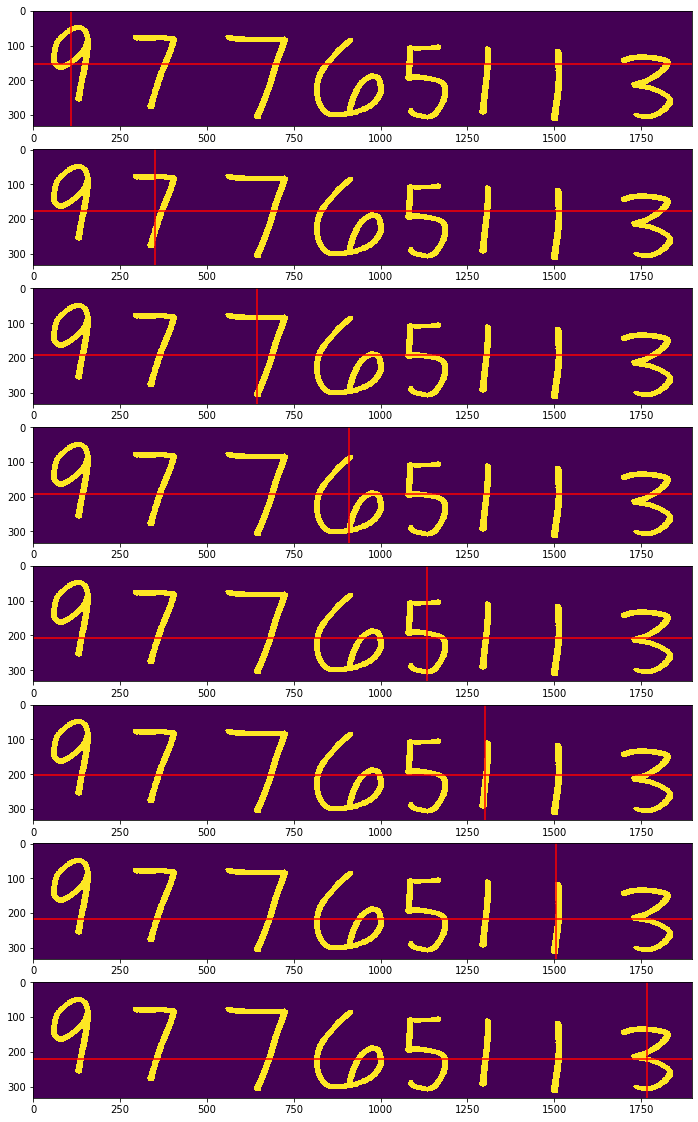

In [34]:
n=len(segments)
fig,axes = plt.subplots(n,figsize=(6*n,20))
for i,seg in enumerate(segments):
    x_center, y_center, xlen, ylen = newproc.crop_image(seg, label_arr, binary_arr,ax=axes[i])
    print(x_center, y_center, xlen, ylen)
    # plt.imshow(arr)
    # plt.axhline(x_center*x_height,color='r')
    # plt.axvline(y_center*y_height,color='r');

In [46]:
df_subset[df_subset.compare]

,filename,label,predict,compare,compare_sets,score
2,testmarker/10897649.jpg,"[1, 0, 8, 9, 7, 6, 4, 9]","[1, 0, 8, 9, 7, 6, 4, 9]",True,True,1.0
4,testmarker/17662814.jpg,"[1, 7, 6, 6, 2, 8, 1, 4]","[1, 7, 6, 6, 2, 8, 1, 4]",True,True,1.0
9,testmarker/26635409.jpg,"[2, 6, 6, 3, 5, 4, 0, 9]","[2, 6, 6, 3, 5, 4, 0, 9]",True,True,1.0
12,testmarker/39385210.jpg,"[3, 9, 3, 8, 5, 2, 1, 0]","[3, 9, 3, 8, 5, 2, 1, 0]",True,True,1.0
13,testmarker/46320745.jpg,"[4, 6, 3, 2, 0, 7, 4, 5]","[4, 6, 3, 2, 0, 7, 4, 5]",True,True,1.0
14,testmarker/50473.jpg,"[5, 0, 4, 7, 3]","[5, 0, 4, 7, 3]",True,True,1.0
19,testmarker/74036776.jpg,"[7, 4, 0, 3, 6, 7, 7, 6]","[7, 4, 0, 3, 6, 7, 7, 6]",True,True,1.0
21,testmarker/7493.jpg,"[7, 4, 9, 3]","[7, 4, 9, 3]",True,True,1.0
22,testmarker/81064327.jpg,"[8, 1, 0, 6, 4, 3, 2, 7]","[8, 1, 0, 6, 4, 3, 2, 7]",True,True,1.0
23,testmarker/84843617.jpg,"[8, 4, 8, 4, 3, 6, 1, 7]","[8, 4, 8, 4, 3, 6, 1, 7]",True,True,1.0


1 of 25
processing  testmarker/10645.jpg


TypeError: 'NoneType' object is not iterable

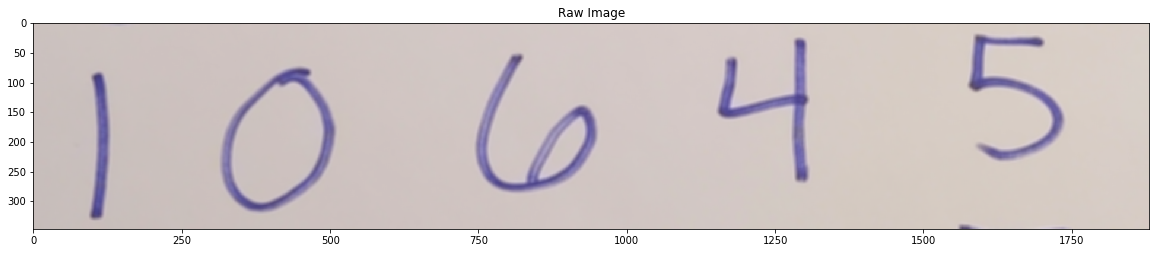

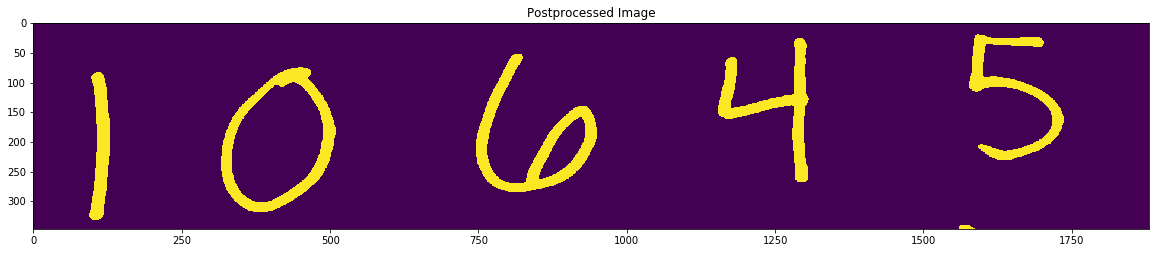

In [47]:
predictions = []
with open('test_new_model__subset.txt','w') as writeFile:
    for index,image in enumerate(df_subset['filename'].iloc[1:]):
        matname = 'tf22/HANDWRITING__'+image[-8:-4]
        print(index+1,'of',len(df_subset))
        print('processing ',image)
        binary_arr,label_arr, segments,orig = proc.label_segments(image,matname,photo=True)
        predicted = []
        for seg in segments:
            try:
                pred = proc.crop_image(seg,label_arr,orig,model=tf_model,direc=matname,svc=False,tf=True)[1]
            except:
                pred = None
            if pred!= None: predicted.append(pred)
        predictions.append(predicted)
        row = str(df_subset.iloc[index]['label'])+'; '+str(list(pred))+'\n'
        print(row)
        writeFile.write(row)
writeFile.close()


In [305]:
# df_subset.to_csv('test_pred_tf3.csv',index=False)
predictions

[[], [], [], [], [], [], [], []]

Text(0.5, 1.0, 'Preprocessed Binary Image')

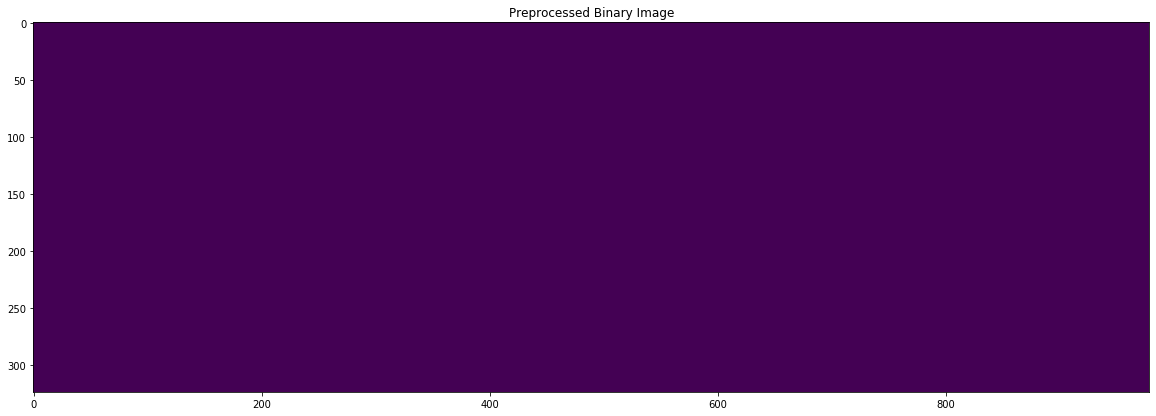

In [44]:
image = io.imread(imgs[0])
alpha=1.2
beta=0
marker = False
image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
if marker==False:
    image = cv2.blur(image, (8, 8))
arrraaayyy = np.array(image)
fig,axes = plt.subplots(1,figsize=(20,10))
label_arr, num_seg = ndi.label(color.rgb2gray(arrraaayyy))
axes.imshow(label_arr)
axes.set_title('Preprocessed Binary Image') 


In [31]:
def plot_numbered_image(label_arr,savename='',no_rotate=False):
    IMAGE = savename+'_segmented.jpg'
    pixarray=np.rot90(label_arr,3)
    imax,jmax = pixarray.shape
    fig,ax=plt.subplots(ncols=1, nrows=1, figsize=(20,int(20*jmax/imax)))
    plt.xticks(np.arange(0,imax))
    plt.yticks(np.arange(0,jmax))
    for i in range(0,imax,2):
        for j in range(0,jmax,2):
            val = pixarray[i][j]
            if val != 0:
                ax.scatter(i,j,s=300,color='k')
#                 ax.text(i,j,8,fontsize=20)
#     ax.patch.set_facecolor('black')
    ax.set_axis_off()
    plt.xticks([])
    plt.yticks([])            
    plt.show()
    fig.savefig(IMAGE)
    
#     ORIG = cv2.imread(IMAGE)    
#     kernel = np.ones((10,10),np.float32)/25
#     GAUSS = cv2.blur(ORIG, (25, 25))    
# #     GAUSS = cv2.filter2D(ORIG,-1,kernel)
# #     GAUSS=cv2.medianblur(IMAGE,(5,5))
#     io.imsave(IMAGE,GAUSS)    
    
#     BLACK = plt.imread(IMAGE)
#     INVERT = cv2.bitwise_not(BLACK)
#     io.imsave(savename+'_segmented.jpg',INVERT)
#     return INVERT

my_app/data/predictions__img_original_from_photo.png
[1, 4, 1, 1, 5, 5, 2, 7, 7, 4, 1, 4, 2, 1, 8, 1]


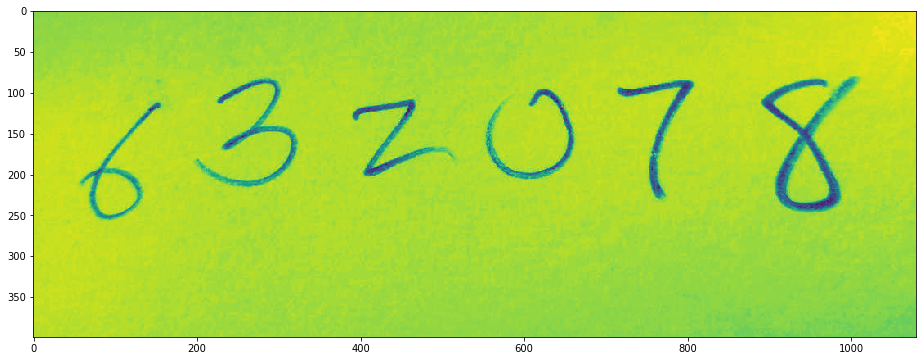

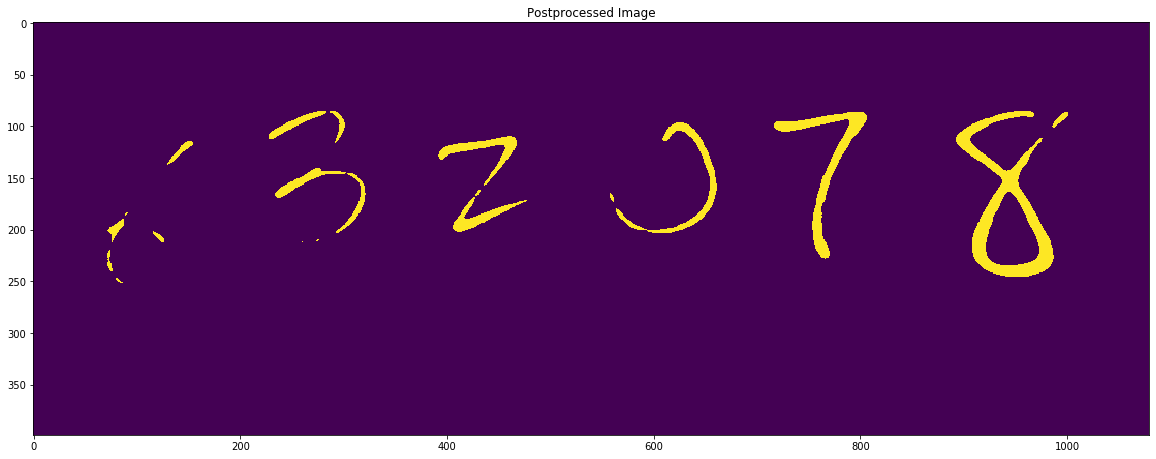

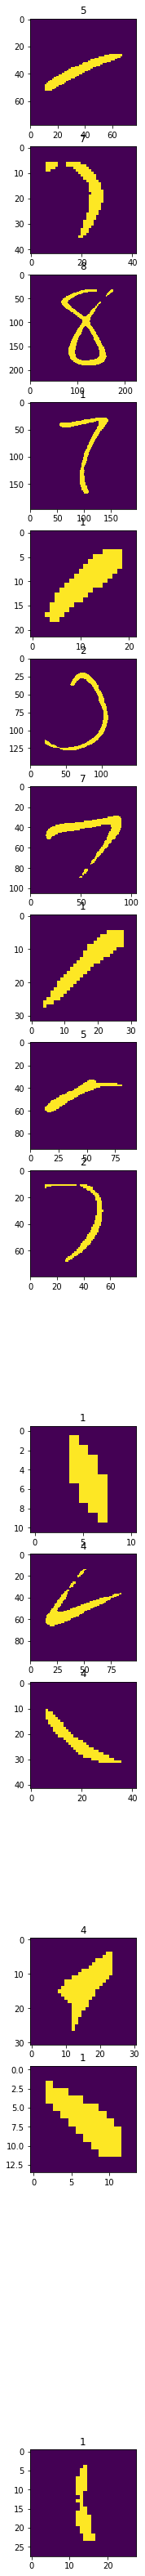

In [23]:
from math import ceil 
import cv2
from PIL import Image
IMAGE = 'my_app/data/predictions__img_original_from_photo.png'          ###imgs[0]
plt.imshow(io.imread(IMAGE))
binary_arr,label_arr, segments,orig = proc.label_segments(IMAGE,'',photo=True)
plt.imshow(np.array(binary_arr, dtype = np.uint8 ))

predictions = []
fig,axes = plt.subplots(len(segments),figsize=(10,60))
for seg,ax in list(zip(segments,axes.flatten())):
    found = label_arr==seg
    x,y = np.where(found)
    xmin,xmax,ymin,ymax = np.min(x),np.max(x),np.min(y),np.max(y)
    xlen,ylen = found[xmin:xmax,ymin:ymax].shape
    diff = np.abs(ylen-xlen)
    change = ceil(diff/2)
    if diff!=0:
        if ylen>xlen:
            xmin-=change
            xmax+=change

        else:
            ymin-=change
            ymax+=change

        xlen,ylen = xmax-xmin,ymax-ymin
        diff=np.abs(ylen-xlen)
        if xlen>ylen: ymax+=diff
        elif ylen>xlen: xmax+=diff
    digit = binary_arr[xmin:xmax,ymin:ymax]
    digit = np.pad(digit,int(len(digit)*.2),mode= 'constant', constant_values=(0,0))        
    

    if digit.shape[0]<10:
        ax.set_visible(False)       
        pass
    else:
        ax.imshow(digit)
        im = Image.fromarray(np.array(digit)*255.0).convert("RGB")
        im.save('000.png')
        img = cv2.resize(cv2.imread('000.png',cv2.IMREAD_GRAYSCALE),(28,28),interpolation=cv2.INTER_CUBIC)
        p = np.argmax(tf_model.predict(img.astype(float).flatten().reshape((1, 28, 28, 1))))
        ax.set_title(p)
        predictions.append([ymin,p])

predictions.sort()    
predictions = [pr[1] for pr in predictions]
print(IMAGE)
print(predictions)

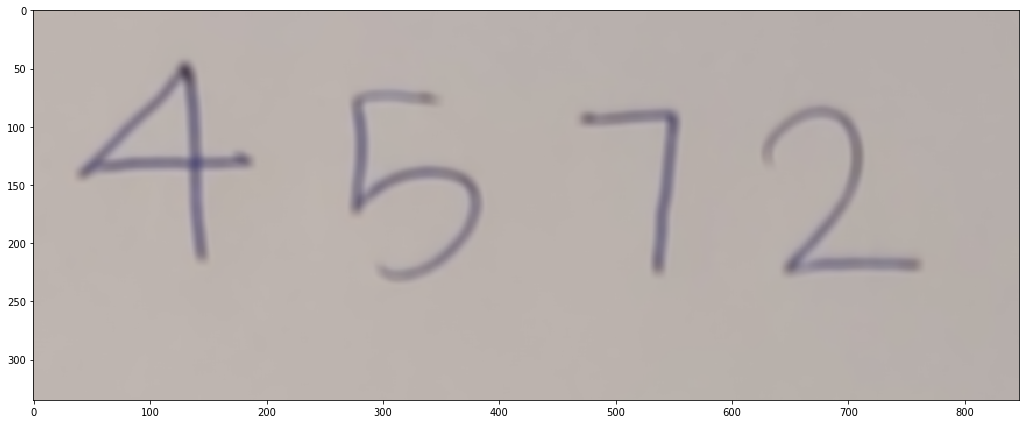

In [214]:
ORIG = io.imread(IMAGE)
GAUSS = cv2.blur(ORIG, (10, 10)) 
io.imshow(GAUSS)

In [98]:
results

array([1, 1, 1, 1], dtype=object)

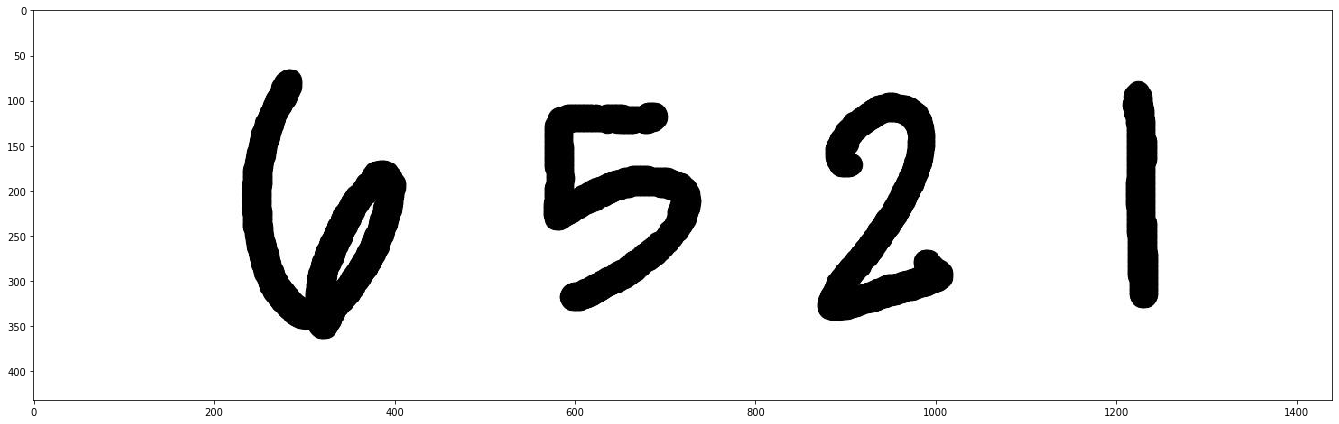

In [135]:
from skimage import io, filters, color
import cv2
BLACK = io.imread('_segmented.jpg')
INVERT = cv2.bitwise_not(BLACK)
io.imshow(INVERT)

In [ ]:
for img in 

In [21]:
import tensorflow as tf